In [1]:
import numpy 
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# perceptron 

In [2]:
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y= (iris.target == 0).astype(int) # Iris Setosa?

In [3]:
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [5]:
y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[0]


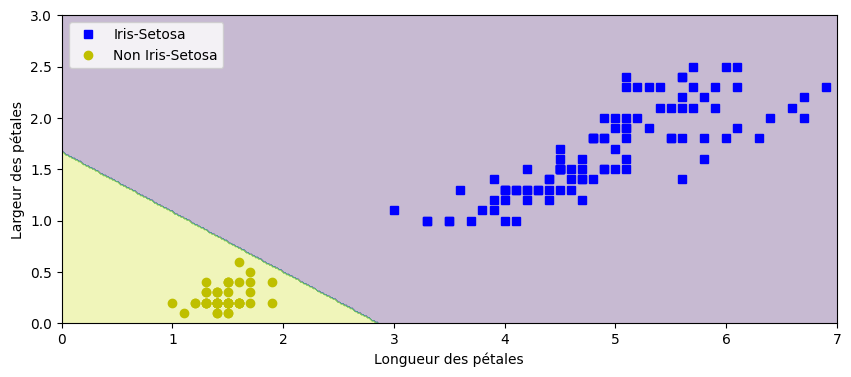

In [6]:
import matplotlib.pyplot as plt
x0, x1 = numpy.meshgrid(
    numpy.linspace(0, 7, 500),
    numpy.linspace(0, 3, 200)
)
X_new = numpy.c_[x0.ravel(), x1.ravel()]
y_pred = per_clf.predict(X_new)
zz = y_pred.reshape(x0.shape)

# Tracer le graphe
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Non Iris-Setosa")

plt.contourf(x0, x1, zz, alpha=0.3)
plt.xlabel("Longueur des pétales")
plt.ylabel("Largeur des pétales")
plt.legend()
plt.show()

# MPC de régression 

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)



In [34]:
from tensorflow import keras

model = keras.models.Sequential([keras.layers.Dense(30 , activation="relu", input_shape=X_train.shape[1:]), keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
Y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8376 - val_loss: 0.5328
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5997 - val_loss: 0.7244
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 1.1742 - val_loss: 0.4823
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4678 - val_loss: 0.4491
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4601 - val_loss: 0.4396
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4394 - val_loss: 0.4265
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4306 - val_loss: 0.4247
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4345 - val_loss: 0.4878
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4984 - val_loss: 0.4193
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4202 - val_loss: 0.4158

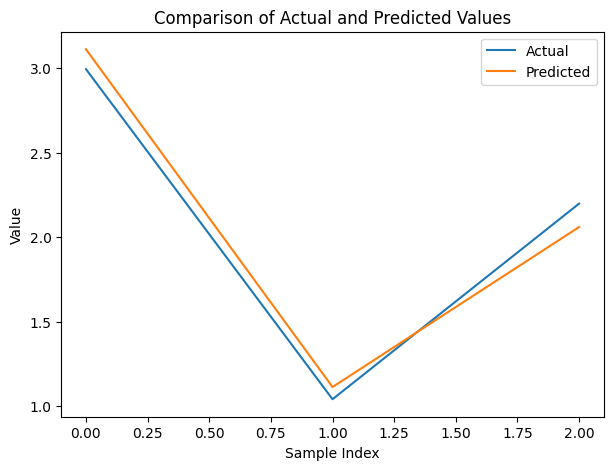

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.plot(y_test[:len(Y_pred)], label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [41]:
input_ = keras.layers.Input(shape=X_train.shape[1:])  #wide and deep
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3880 - val_loss: 0.5178
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5419 - val_loss: 0.4933
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4915 - val_loss: 0.4718
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6885 - val_loss: 0.4606
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4655 - val_loss: 0.4436
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4603 - val_loss: 0.4294
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4401 - val_loss: 0.4323
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4691 - val_loss: 0.4113
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4165 - val_loss: 0.4018
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4027 - val_loss: 0.3938

1/1 [==============================] - 0s 49ms/step


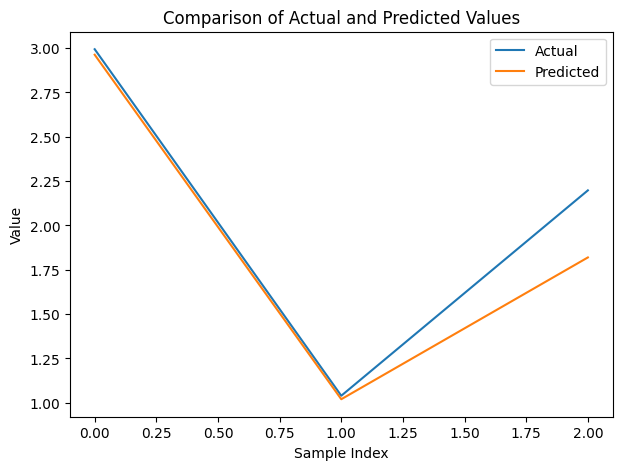

In [42]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
Y_pred = model.predict(X_new)

plt.figure(figsize=(7, 5))
plt.plot(y_test[:len(Y_pred)], label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [38]:
input_A = keras.layers.Input(shape=[5], name="wide_input")  # entrées multiples
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [39]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 5s 11ms/step - loss: 0.7924 - val_loss: 0.5657
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5634 - val_loss: 0.4929
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5018 - val_loss: 0.4632
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4705 - val_loss: 0.4534
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4593 - val_loss: 0.4450
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4496 - val_loss: 0.4294
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4449 - val_loss: 0.4178
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4470 - val_loss: 0.4297
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4258 - val_loss: 0.4031
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4092 - val_loss: 0.413

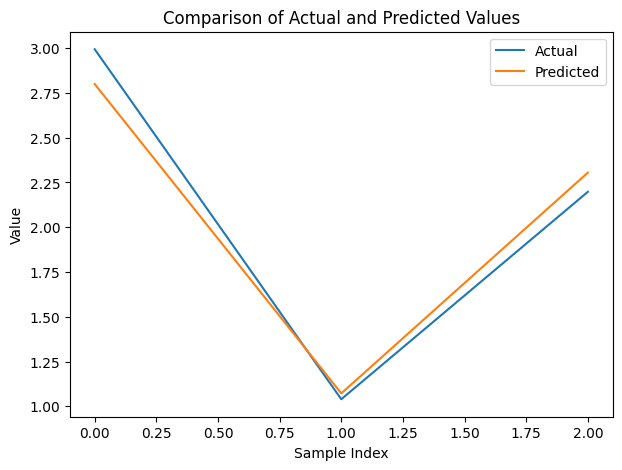

In [40]:
plt.figure(figsize=(7, 5))
plt.plot(y_test[:len(Y_pred)], label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [9]:
# class WideAndDeepModel(keras.Model):
#     def __init__(self, units=30, activation='relu', **kwargs):
#         super().__init__(**kwargs)
#         self.hidden1 = keras.layers.Dense(units, activation=activation)
#         self.hidden2 = keras.layers.Dense(units, activation=activation)
#         self.main_output = keras.layers.Dense(1)
#         self.aux_output = keras.layers.Dense(1)

#     def call(self, inputs):
#         input_A, input_B = inputs
#         hidden1 = self.hidden1(input_B)
#         hidden2 = self.hidden2(hidden1)
#         concat = keras.layers.concatenate([input_A, hidden2])
#         main_output = self.main_output(concat)
#         aux_output = self.aux_output(hidden2)
#         return main_output, aux_output
    
# model = WideAndDeepModel(30, activation='relu')

# HYPERPARAMETRES

In [43]:
import numpy as np
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from tensorflow import keras
from scikeras.wrappers import KerasRegressor

# Define the model-building function
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, **kwargs):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=X_train.shape[1:]))
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    return model

# Wrap the model using KerasRegressor
keras_reg = KerasRegressor(model=build_model, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

# Define the hyperparameter distribution
param_distribs = {
    "model__n_hidden": [0, 1, 2, 3],
    "model__n_neurons": np.arange(1, 100),
    "model__learning_rate": reciprocal(3e-4, 3e-2)
}

# Perform the randomized search
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train)

model = rnd_search_cv.best_estimator_.model

Epoch 1/100
232/242 [===========================>..] - ETA: 0s - loss: 2.6943WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 884us/step - loss: 2.6380
Epoch 2/100
234/242 [============================>.] - ETA: 0s - loss: 0.9976WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.9911
Epoch 3/100
231/242 [===========================>..] - ETA: 0s - loss: 0.7327WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 907us/step - loss: 0.7297
Epoch 4/100
214/242 [=========================>....] - ETA: 0s - loss: 0.6805WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 925us/step - loss: 0.6712
Epoch 5/100
209/242 [========================>.....] - ETA: 0s - loss: 0.6530WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6453
Epoch 6/100
215/242 [=========================>....] - ETA: 0s - loss: 0.6341WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.6275
Epoch 7/100
200/242 [=======================>......] - ETA: 0s - loss: 0.6075WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 997us/step - loss: 0.6125
Epoch 8/100
214/242 [=========================>....] - ETA: 0s - loss: 0.6118WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6000
Epoch 9/100
221/242 [==========================>...] - ETA: 0s - loss: 0.5893WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 911us/step - loss: 0.5887
Epoch 10/100
215/242 [=========================>....] - ETA: 0s - loss: 0.5832WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5787
Epoch 11/100
184/242 [=====================>........] - ETA: 0s - loss: 0.5787WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 812us/step - loss: 0.5697
Epoch 12/100
191/242 [======================>.......] - ETA: 0s - loss: 0.5560WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 800us/step - loss: 0.5616
Epoch 13/100
185/242 [=====================>........] - ETA: 0s - loss: 0.5467WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 810us/step - loss: 0.5539
Epoch 14/100
227/242 [===========================>..] - ETA: 0s - loss: 0.5505WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5471
Epoch 15/100
184/242 [=====================>........] - ETA: 0s - loss: 0.5376WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 814us/step - loss: 0.5407
Epoch 16/100
240/242 [============================>.] - ETA: 0s - loss: 0.5350WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5347
Epoch 17/100
234/242 [============================>.] - ETA: 0s - loss: 0.5312WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5292
Epoch 18/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5270WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5241
Epoch 19/100
218/242 [==========================>...] - ETA: 0s - loss: 0.5093WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 935us/step - loss: 0.5193
Epoch 20/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5126WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 996us/step - loss: 0.5147
Epoch 21/100
197/242 [=======================>......] - ETA: 0s - loss: 0.5111WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5107
Epoch 22/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5091WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5066
Epoch 23/100
221/242 [==========================>...] - ETA: 0s - loss: 0.5091WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 915us/step - loss: 0.5030
Epoch 24/100
239/242 [============================>.] - ETA: 0s - loss: 0.4993WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4996
Epoch 25/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4879WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 946us/step - loss: 0.4964
Epoch 26/100
192/242 [======================>.......] - ETA: 0s - loss: 0.4842WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4933
Epoch 27/100
220/242 [==========================>...] - ETA: 0s - loss: 0.4950WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 939us/step - loss: 0.4906
Epoch 28/100
196/242 [=======================>......] - ETA: 0s - loss: 0.4927WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4877
Epoch 29/100
203/242 [========================>.....] - ETA: 0s - loss: 0.4766WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4853
Epoch 30/100
235/242 [============================>.] - ETA: 0s - loss: 0.4843WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4831
Epoch 31/100
208/242 [========================>.....] - ETA: 0s - loss: 0.4829WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4808
Epoch 32/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4819WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 891us/step - loss: 0.4788
Epoch 33/100
235/242 [============================>.] - ETA: 0s - loss: 0.4761WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 923us/step - loss: 0.4768
Epoch 34/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4738WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 946us/step - loss: 0.4748
Epoch 35/100
194/242 [=======================>......] - ETA: 0s - loss: 0.4715WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 802us/step - loss: 0.4731
Epoch 36/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4745WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 924us/step - loss: 0.4714
Epoch 37/100
200/242 [=======================>......] - ETA: 0s - loss: 0.4745WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4698
Epoch 38/100
202/242 [========================>.....] - ETA: 0s - loss: 0.4728WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4682
Epoch 39/100
240/242 [============================>.] - ETA: 0s - loss: 0.4675WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4667
Epoch 40/100
204/242 [========================>.....] - ETA: 0s - loss: 0.4683WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 975us/step - loss: 0.4653
Epoch 41/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4641WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4640
Epoch 42/100
177/242 [====================>.........] - ETA: 0s - loss: 0.4594WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 838us/step - loss: 0.4624
Epoch 43/100
186/242 [======================>.......] - ETA: 0s - loss: 0.4650WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 811us/step - loss: 0.4614
Epoch 44/100
184/242 [=====================>........] - ETA: 0s - loss: 0.4552WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 828us/step - loss: 0.4601
Epoch 45/100
211/242 [=========================>....] - ETA: 0s - loss: 0.4512WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4589
Epoch 46/100
181/242 [=====================>........] - ETA: 0s - loss: 0.4709WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 824us/step - loss: 0.4578
Epoch 47/100
237/242 [============================>.] - ETA: 0s - loss: 0.4583WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 862us/step - loss: 0.4568
Epoch 48/100
188/242 [======================>.......] - ETA: 0s - loss: 0.4624WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 794us/step - loss: 0.4556
Epoch 49/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4550WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4547
Epoch 50/100
198/242 [=======================>......] - ETA: 0s - loss: 0.4510WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 769us/step - loss: 0.4536
Epoch 51/100
185/242 [=====================>........] - ETA: 0s - loss: 0.4470WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 806us/step - loss: 0.4528
Epoch 52/100
190/242 [======================>.......] - ETA: 0s - loss: 0.4547WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 807us/step - loss: 0.4517
Epoch 53/100
176/242 [====================>.........] - ETA: 0s - loss: 0.4546WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4509
Epoch 54/100
201/242 [=======================>......] - ETA: 0s - loss: 0.4513WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 765us/step - loss: 0.4500
Epoch 55/100
198/242 [=======================>......] - ETA: 0s - loss: 0.4556WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 776us/step - loss: 0.4492
Epoch 56/100
194/242 [=======================>......] - ETA: 0s - loss: 0.4440WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 772us/step - loss: 0.4483
Epoch 57/100
181/242 [=====================>........] - ETA: 0s - loss: 0.4515WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4474
Epoch 58/100
191/242 [======================>.......] - ETA: 0s - loss: 0.4395WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 790us/step - loss: 0.4468
Epoch 59/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4492WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 921us/step - loss: 0.4460
Epoch 60/100
225/242 [==========================>...] - ETA: 0s - loss: 0.4482WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 902us/step - loss: 0.4452
Epoch 61/100
235/242 [============================>.] - ETA: 0s - loss: 0.4456WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4445
Epoch 62/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4470WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 885us/step - loss: 0.4437
Epoch 63/100
189/242 [======================>.......] - ETA: 0s - loss: 0.4433WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 815us/step - loss: 0.4430
Epoch 64/100
221/242 [==========================>...] - ETA: 0s - loss: 0.4439WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4424
Epoch 65/100
198/242 [=======================>......] - ETA: 0s - loss: 0.4386WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4417
Epoch 66/100
192/242 [======================>.......] - ETA: 0s - loss: 0.4360WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 789us/step - loss: 0.4411
Epoch 67/100
190/242 [======================>.......] - ETA: 0s - loss: 0.4322WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4404
Epoch 68/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4414WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 881us/step - loss: 0.4397
Epoch 69/100
241/242 [============================>.] - ETA: 0s - loss: 0.4386WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4391
Epoch 70/100
193/242 [======================>.......] - ETA: 0s - loss: 0.4277WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 791us/step - loss: 0.4385
Epoch 71/100
186/242 [======================>.......] - ETA: 0s - loss: 0.4383WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 813us/step - loss: 0.4379
Epoch 72/100
192/242 [======================>.......] - ETA: 0s - loss: 0.4310WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 800us/step - loss: 0.4373
Epoch 73/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4416WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4365
Epoch 74/100
193/242 [======================>.......] - ETA: 0s - loss: 0.4351WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 790us/step - loss: 0.4361
Epoch 75/100
190/242 [======================>.......] - ETA: 0s - loss: 0.4324WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 806us/step - loss: 0.4355
Epoch 76/100
201/242 [=======================>......] - ETA: 0s - loss: 0.4320WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 763us/step - loss: 0.4350
Epoch 77/100
179/242 [=====================>........] - ETA: 0s - loss: 0.4344WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4345
Epoch 78/100
191/242 [======================>.......] - ETA: 0s - loss: 0.4274WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 787us/step - loss: 0.4339
Epoch 79/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4365WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 889us/step - loss: 0.4334
Epoch 80/100
236/242 [============================>.] - ETA: 0s - loss: 0.4313WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4329
Epoch 81/100
184/242 [=====================>........] - ETA: 0s - loss: 0.4213WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 805us/step - loss: 0.4323
Epoch 82/100
196/242 [=======================>......] - ETA: 0s - loss: 0.4325WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 771us/step - loss: 0.4319
Epoch 83/100
242/242 [==============================] - ETA: 0s - loss: 0.4314WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 846us/step - loss: 0.4314
Epoch 84/100
227/242 [===========================>..] - ETA: 0s - loss: 0.4334WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4308
Epoch 85/100
191/242 [======================>.......] - ETA: 0s - loss: 0.4396WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 798us/step - loss: 0.4305
Epoch 86/100
242/242 [==============================] - ETA: 0s - loss: 0.4299WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4299
Epoch 87/100
226/242 [===========================>..] - ETA: 0s - loss: 0.4346WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4294
Epoch 88/100
188/242 [======================>.......] - ETA: 0s - loss: 0.4311WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 793us/step - loss: 0.4290
Epoch 89/100
194/242 [=======================>......] - ETA: 0s - loss: 0.4227WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 773us/step - loss: 0.4286
Epoch 90/100
197/242 [=======================>......] - ETA: 0s - loss: 0.4277WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 797us/step - loss: 0.4280
Epoch 91/100
235/242 [============================>.] - ETA: 0s - loss: 0.4299WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4276
Epoch 92/100
180/242 [=====================>........] - ETA: 0s - loss: 0.4232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 822us/step - loss: 0.4272
Epoch 93/100
183/242 [=====================>........] - ETA: 0s - loss: 0.4205WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 808us/step - loss: 0.4268
Epoch 94/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4252WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 867us/step - loss: 0.4262
Epoch 95/100
213/242 [=========================>....] - ETA: 0s - loss: 0.4263WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4259
Epoch 96/100
180/242 [=====================>........] - ETA: 0s - loss: 0.4164WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4255
Epoch 97/100
242/242 [==============================] - ETA: 0s - loss: 0.4251WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 849us/step - loss: 0.4251
Epoch 98/100
176/242 [====================>.........] - ETA: 0s - loss: 0.4230WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 844us/step - loss: 0.4247
Epoch 99/100
234/242 [============================>.] - ETA: 0s - loss: 0.4227WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4243
Epoch 100/100
225/242 [==========================>...] - ETA: 0s - loss: 0.4263WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4238


121/121 [==============================] - 0s 1ms/step
Epoch 1/100
200/242 [=======================>......] - ETA: 0s - loss: 3.6410WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 962us/step - loss: 3.3549
Epoch 2/100
228/242 [===========================>..] - ETA: 0s - loss: 1.3788WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 1.3534
Epoch 3/100
198/242 [=======================>......] - ETA: 0s - loss: 0.9325WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 997us/step - loss: 0.9192
Epoch 4/100
197/242 [=======================>......] - ETA: 0s - loss: 0.7999WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.7946
Epoch 5/100
214/242 [=========================>....] - ETA: 0s - loss: 0.7461WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.7459
Epoch 6/100
205/242 [========================>.....] - ETA: 0s - loss: 0.7267WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 972us/step - loss: 0.7191
Epoch 7/100
222/242 [==========================>...] - ETA: 0s - loss: 0.7000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 917us/step - loss: 0.6998
Epoch 8/100
239/242 [============================>.] - ETA: 0s - loss: 0.6841WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 856us/step - loss: 0.6834
Epoch 9/100
217/242 [=========================>....] - ETA: 0s - loss: 0.6662WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6692
Epoch 10/100
177/242 [====================>.........] - ETA: 0s - loss: 0.6559WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 834us/step - loss: 0.6561
Epoch 11/100
179/242 [=====================>........] - ETA: 0s - loss: 0.6349WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 839us/step - loss: 0.6440
Epoch 12/100
236/242 [============================>.] - ETA: 0s - loss: 0.6363WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 861us/step - loss: 0.6328
Epoch 13/100
217/242 [=========================>....] - ETA: 0s - loss: 0.6188WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6224
Epoch 14/100
213/242 [=========================>....] - ETA: 0s - loss: 0.6114WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 948us/step - loss: 0.6127
Epoch 15/100
180/242 [=====================>........] - ETA: 0s - loss: 0.6211WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 839us/step - loss: 0.6036
Epoch 16/100
177/242 [====================>.........] - ETA: 0s - loss: 0.5937WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 837us/step - loss: 0.5950
Epoch 17/100
208/242 [========================>.....] - ETA: 0s - loss: 0.5827WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5870
Epoch 18/100
227/242 [===========================>..] - ETA: 0s - loss: 0.5821WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 933us/step - loss: 0.5794
Epoch 19/100
232/242 [===========================>..] - ETA: 0s - loss: 0.5749WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 876us/step - loss: 0.5721
Epoch 20/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5601WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5655
Epoch 21/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5643WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 886us/step - loss: 0.5589
Epoch 22/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5592WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 880us/step - loss: 0.5531
Epoch 23/100
238/242 [============================>.] - ETA: 0s - loss: 0.5458WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 860us/step - loss: 0.5473
Epoch 24/100
217/242 [=========================>....] - ETA: 0s - loss: 0.5353WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5419
Epoch 25/100
180/242 [=====================>........] - ETA: 0s - loss: 0.5326WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 826us/step - loss: 0.5369
Epoch 26/100
181/242 [=====================>........] - ETA: 0s - loss: 0.5274WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 830us/step - loss: 0.5321
Epoch 27/100
239/242 [============================>.] - ETA: 0s - loss: 0.5265WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 863us/step - loss: 0.5277
Epoch 28/100
213/242 [=========================>....] - ETA: 0s - loss: 0.5263WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5235
Epoch 29/100
234/242 [============================>.] - ETA: 0s - loss: 0.5220WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 875us/step - loss: 0.5195
Epoch 30/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5182WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 919us/step - loss: 0.5158
Epoch 31/100
185/242 [=====================>........] - ETA: 0s - loss: 0.5148WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5124
Epoch 32/100
237/242 [============================>.] - ETA: 0s - loss: 0.5069WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5091
Epoch 33/100
235/242 [============================>.] - ETA: 0s - loss: 0.5054WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5061
Epoch 34/100
239/242 [============================>.] - ETA: 0s - loss: 0.5039WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5032
Epoch 35/100
220/242 [==========================>...] - ETA: 0s - loss: 0.4969WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5005
Epoch 36/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4930WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4978
Epoch 37/100
199/242 [=======================>......] - ETA: 0s - loss: 0.4971WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4955
Epoch 38/100
236/242 [============================>.] - ETA: 0s - loss: 0.4927WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 869us/step - loss: 0.4931
Epoch 39/100
194/242 [=======================>......] - ETA: 0s - loss: 0.4949WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4908
Epoch 40/100
230/242 [===========================>..] - ETA: 0s - loss: 0.4916WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4887
Epoch 41/100
228/242 [===========================>..] - ETA: 0s - loss: 0.4894WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 890us/step - loss: 0.4868
Epoch 42/100
220/242 [==========================>...] - ETA: 0s - loss: 0.4869WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 955us/step - loss: 0.4848
Epoch 43/100
239/242 [============================>.] - ETA: 0s - loss: 0.4832WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4830
Epoch 44/100
235/242 [============================>.] - ETA: 0s - loss: 0.4801WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 873us/step - loss: 0.4812
Epoch 45/100
204/242 [========================>.....] - ETA: 0s - loss: 0.4751WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4795
Epoch 46/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4757WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4779
Epoch 47/100
178/242 [=====================>........] - ETA: 0s - loss: 0.4660WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4763
Epoch 48/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4787WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 921us/step - loss: 0.4748
Epoch 49/100
215/242 [=========================>....] - ETA: 0s - loss: 0.4661WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4733
Epoch 50/100
234/242 [============================>.] - ETA: 0s - loss: 0.4758WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4719
Epoch 51/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4682WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4705
Epoch 52/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4682WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.4691
Epoch 53/100
216/242 [=========================>....] - ETA: 0s - loss: 0.4672WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4679
Epoch 54/100
237/242 [============================>.] - ETA: 0s - loss: 0.4668WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4666
Epoch 55/100
224/242 [==========================>...] - ETA: 0s - loss: 0.4683WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4655
Epoch 56/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4603WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4643
Epoch 57/100
212/242 [=========================>....] - ETA: 0s - loss: 0.4731WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4632
Epoch 58/100
234/242 [============================>.] - ETA: 0s - loss: 0.4601WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4621
Epoch 59/100
210/242 [=========================>....] - ETA: 0s - loss: 0.4613WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4610
Epoch 60/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4561WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4600
Epoch 61/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4606WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4590
Epoch 62/100
209/242 [========================>.....] - ETA: 0s - loss: 0.4559WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4580
Epoch 63/100
212/242 [=========================>....] - ETA: 0s - loss: 0.4601WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4572
Epoch 64/100
211/242 [=========================>....] - ETA: 0s - loss: 0.4568WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4563
Epoch 65/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4543WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4554
Epoch 66/100
236/242 [============================>.] - ETA: 0s - loss: 0.4536WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4545
Epoch 67/100
224/242 [==========================>...] - ETA: 0s - loss: 0.4517WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4537
Epoch 68/100
240/242 [============================>.] - ETA: 0s - loss: 0.4530WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4528
Epoch 69/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4487WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4521
Epoch 70/100
209/242 [========================>.....] - ETA: 0s - loss: 0.4489WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4513
Epoch 71/100
241/242 [============================>.] - ETA: 0s - loss: 0.4501WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4506
Epoch 72/100
239/242 [============================>.] - ETA: 0s - loss: 0.4492WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4498
Epoch 73/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4518WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.4491
Epoch 74/100
208/242 [========================>.....] - ETA: 0s - loss: 0.4536WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4483
Epoch 75/100
240/242 [============================>.] - ETA: 0s - loss: 0.4489WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4477
Epoch 76/100
235/242 [============================>.] - ETA: 0s - loss: 0.4460WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.4470
Epoch 77/100
239/242 [============================>.] - ETA: 0s - loss: 0.4471WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4463
Epoch 78/100
206/242 [========================>.....] - ETA: 0s - loss: 0.4515WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4457
Epoch 79/100
227/242 [===========================>..] - ETA: 0s - loss: 0.4395WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4450
Epoch 80/100
202/242 [========================>.....] - ETA: 0s - loss: 0.4517WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4444
Epoch 81/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4484WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4438
Epoch 82/100
203/242 [========================>.....] - ETA: 0s - loss: 0.4415WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4431
Epoch 83/100
207/242 [========================>.....] - ETA: 0s - loss: 0.4489WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4426
Epoch 84/100
221/242 [==========================>...] - ETA: 0s - loss: 0.4407WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4420
Epoch 85/100
230/242 [===========================>..] - ETA: 0s - loss: 0.4452WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4414
Epoch 86/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4412WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4408
Epoch 87/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4404WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4402
Epoch 88/100
212/242 [=========================>....] - ETA: 0s - loss: 0.4386WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4397
Epoch 89/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4371WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4391
Epoch 90/100
216/242 [=========================>....] - ETA: 0s - loss: 0.4405WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4386
Epoch 91/100
215/242 [=========================>....] - ETA: 0s - loss: 0.4386WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4381
Epoch 92/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4345WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4375
Epoch 93/100
239/242 [============================>.] - ETA: 0s - loss: 0.4371WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4371
Epoch 94/100
234/242 [============================>.] - ETA: 0s - loss: 0.4336WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4366
Epoch 95/100
195/242 [=======================>......] - ETA: 0s - loss: 0.4430WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4360
Epoch 96/100
211/242 [=========================>....] - ETA: 0s - loss: 0.4301WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4356
Epoch 97/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4358WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4351
Epoch 98/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4365WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.4347
Epoch 99/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4338WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.4341
Epoch 100/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4334WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 1ms/step
Epoch 1/100
232/242 [===========================>..] - ETA: 0s - loss: 3.4004WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 1ms/step - loss: 3.3367
Epoch 2/100
215/242 [=========================>....] - ETA: 0s - loss: 1.3543WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 1.3272
Epoch 3/100
226/242 [===========================>..] - ETA: 0s - loss: 0.9466WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.9379
Epoch 4/100
228/242 [===========================>..] - ETA: 0s - loss: 0.8293WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.8257
Epoch 5/100
221/242 [==========================>...] - ETA: 0s - loss: 0.7779WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.7758
Epoch 6/100
228/242 [===========================>..] - ETA: 0s - loss: 0.7497WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.7460
Epoch 7/100
236/242 [============================>.] - ETA: 0s - loss: 0.7246WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.7233
Epoch 8/100
203/242 [========================>.....] - ETA: 0s - loss: 0.7060WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.7043
Epoch 9/100
212/242 [=========================>....] - ETA: 0s - loss: 0.6793WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.6871
Epoch 10/100
236/242 [============================>.] - ETA: 0s - loss: 0.6711WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.6725
Epoch 11/100
210/242 [=========================>....] - ETA: 0s - loss: 0.6499WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6585
Epoch 12/100
211/242 [=========================>....] - ETA: 0s - loss: 0.6517WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.6458
Epoch 13/100
241/242 [============================>.] - ETA: 0s - loss: 0.6331WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.6341
Epoch 14/100
230/242 [===========================>..] - ETA: 0s - loss: 0.6290WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.6234
Epoch 15/100
233/242 [===========================>..] - ETA: 0s - loss: 0.6132WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.6132
Epoch 16/100
209/242 [========================>.....] - ETA: 0s - loss: 0.6094WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6038
Epoch 17/100
223/242 [==========================>...] - ETA: 0s - loss: 0.6020WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5949
Epoch 18/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5892WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5869
Epoch 19/100
199/242 [=======================>......] - ETA: 0s - loss: 0.5939WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5791
Epoch 20/100
235/242 [============================>.] - ETA: 0s - loss: 0.5726WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5719
Epoch 21/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5678WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5653
Epoch 22/100
217/242 [=========================>....] - ETA: 0s - loss: 0.5526WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5591
Epoch 23/100
220/242 [==========================>...] - ETA: 0s - loss: 0.5562WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5535
Epoch 24/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5527WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5479
Epoch 25/100
222/242 [==========================>...] - ETA: 0s - loss: 0.5413WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5430
Epoch 26/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5380WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5379
Epoch 27/100
239/242 [============================>.] - ETA: 0s - loss: 0.5332WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5340
Epoch 28/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5328WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5297
Epoch 29/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5326WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5259
Epoch 30/100
208/242 [========================>.....] - ETA: 0s - loss: 0.5218WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5223
Epoch 31/100
217/242 [=========================>....] - ETA: 0s - loss: 0.5242WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5188
Epoch 32/100
212/242 [=========================>....] - ETA: 0s - loss: 0.5191WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5156
Epoch 33/100
234/242 [============================>.] - ETA: 0s - loss: 0.5148WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5128
Epoch 34/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5045WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.5101
Epoch 35/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4965WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5074
Epoch 36/100
217/242 [=========================>....] - ETA: 0s - loss: 0.5036WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.5049
Epoch 37/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4934WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5027
Epoch 38/100
242/242 [==============================] - ETA: 0s - loss: 0.5004WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5004
Epoch 39/100
234/242 [============================>.] - ETA: 0s - loss: 0.4991WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.4985
Epoch 40/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4954WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4964
Epoch 41/100
212/242 [=========================>....] - ETA: 0s - loss: 0.4919WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4947
Epoch 42/100
228/242 [===========================>..] - ETA: 0s - loss: 0.4922WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4928
Epoch 43/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4830WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4911
Epoch 44/100
204/242 [========================>.....] - ETA: 0s - loss: 0.4987WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4896
Epoch 45/100
216/242 [=========================>....] - ETA: 0s - loss: 0.4828WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4880
Epoch 46/100
239/242 [============================>.] - ETA: 0s - loss: 0.4821WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4863
Epoch 47/100
220/242 [==========================>...] - ETA: 0s - loss: 0.4852WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4850
Epoch 48/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4821WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4835
Epoch 49/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4887WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4821
Epoch 50/100
220/242 [==========================>...] - ETA: 0s - loss: 0.4855WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4809
Epoch 51/100
193/242 [======================>.......] - ETA: 0s - loss: 0.4804WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4797
Epoch 52/100
235/242 [============================>.] - ETA: 0s - loss: 0.4796WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4783
Epoch 53/100
201/242 [=======================>......] - ETA: 0s - loss: 0.4711WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4770
Epoch 54/100
235/242 [============================>.] - ETA: 0s - loss: 0.4769WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4761
Epoch 55/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4833WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4750
Epoch 56/100
227/242 [===========================>..] - ETA: 0s - loss: 0.4727WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4738
Epoch 57/100
209/242 [========================>.....] - ETA: 0s - loss: 0.4848WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4729
Epoch 58/100
220/242 [==========================>...] - ETA: 0s - loss: 0.4696WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4718
Epoch 59/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4688WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4707
Epoch 60/100
207/242 [========================>.....] - ETA: 0s - loss: 0.4648WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4699
Epoch 61/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4696WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4688
Epoch 62/100
221/242 [==========================>...] - ETA: 0s - loss: 0.4732WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4679
Epoch 63/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4625WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 946us/step - loss: 0.4670
Epoch 64/100
202/242 [========================>.....] - ETA: 0s - loss: 0.4766WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 993us/step - loss: 0.4661
Epoch 65/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4697WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4652
Epoch 66/100
238/242 [============================>.] - ETA: 0s - loss: 0.4641WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4644
Epoch 67/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4526WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4634
Epoch 68/100
220/242 [==========================>...] - ETA: 0s - loss: 0.4616WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4626
Epoch 69/100
201/242 [=======================>......] - ETA: 0s - loss: 0.4555WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4619
Epoch 70/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4556WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4610
Epoch 71/100
216/242 [=========================>....] - ETA: 0s - loss: 0.4568WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 932us/step - loss: 0.4603
Epoch 72/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4564WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 919us/step - loss: 0.4593
Epoch 73/100
209/242 [========================>.....] - ETA: 0s - loss: 0.4606WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4588
Epoch 74/100
205/242 [========================>.....] - ETA: 0s - loss: 0.4581WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4578
Epoch 75/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4585WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 900us/step - loss: 0.4571
Epoch 76/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4572WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4564
Epoch 77/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4547WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4557
Epoch 78/100
234/242 [============================>.] - ETA: 0s - loss: 0.4514WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 872us/step - loss: 0.4549
Epoch 79/100
224/242 [==========================>...] - ETA: 0s - loss: 0.4523WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4542
Epoch 80/100
205/242 [========================>.....] - ETA: 0s - loss: 0.4507WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4535
Epoch 81/100
239/242 [============================>.] - ETA: 0s - loss: 0.4550WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4529
Epoch 82/100
206/242 [========================>.....] - ETA: 0s - loss: 0.4446WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 995us/step - loss: 0.4522
Epoch 83/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4481WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 952us/step - loss: 0.4515
Epoch 84/100
241/242 [============================>.] - ETA: 0s - loss: 0.4507WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 862us/step - loss: 0.4509
Epoch 85/100
181/242 [=====================>........] - ETA: 0s - loss: 0.4447WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 833us/step - loss: 0.4502
Epoch 86/100
204/242 [========================>.....] - ETA: 0s - loss: 0.4543WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4497
Epoch 87/100
206/242 [========================>.....] - ETA: 0s - loss: 0.4490WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4489
Epoch 88/100
209/242 [========================>.....] - ETA: 0s - loss: 0.4412WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4484
Epoch 89/100
234/242 [============================>.] - ETA: 0s - loss: 0.4429WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 882us/step - loss: 0.4478
Epoch 90/100
204/242 [========================>.....] - ETA: 0s - loss: 0.4517WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 993us/step - loss: 0.4472
Epoch 91/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4492WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 964us/step - loss: 0.4467
Epoch 92/100
213/242 [=========================>....] - ETA: 0s - loss: 0.4375WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 987us/step - loss: 0.4460
Epoch 93/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4462WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4456
Epoch 94/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4497WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4450
Epoch 95/100
208/242 [========================>.....] - ETA: 0s - loss: 0.4451WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4444
Epoch 96/100
213/242 [=========================>....] - ETA: 0s - loss: 0.4370WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4438
Epoch 97/100
220/242 [==========================>...] - ETA: 0s - loss: 0.4492WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4434
Epoch 98/100
203/242 [========================>.....] - ETA: 0s - loss: 0.4515WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 984us/step - loss: 0.4428
Epoch 99/100
226/242 [===========================>..] - ETA: 0s - loss: 0.4401WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 915us/step - loss: 0.4423
Epoch 100/100
207/242 [========================>.....] - ETA: 0s - loss: 0.4502WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 943us/step
Epoch 1/100
217/242 [=========================>....] - ETA: 0s - loss: 1.4875WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 1ms/step - loss: 1.3923
Epoch 2/100
224/242 [==========================>...] - ETA: 0s - loss: 0.5691WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5688
Epoch 3/100
230/242 [===========================>..] - ETA: 0s - loss: 0.5535WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 902us/step - loss: 0.5490
Epoch 4/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5490WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5447
Epoch 5/100
225/242 [==========================>...] - ETA: 0s - loss: 0.5322WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5338
Epoch 6/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5464WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5409
Epoch 7/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5252WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5320
Epoch 8/100
220/242 [==========================>...] - ETA: 0s - loss: 0.5343WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5291
Epoch 9/100
239/242 [============================>.] - ETA: 0s - loss: 0.5328WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5327
Epoch 10/100
211/242 [=========================>....] - ETA: 0s - loss: 0.5426WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5392
Epoch 11/100
230/242 [===========================>..] - ETA: 0s - loss: 0.5247WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5371
Epoch 12/100
241/242 [============================>.] - ETA: 0s - loss: 0.5422WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5421
Epoch 13/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5330WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5332
Epoch 14/100
240/242 [============================>.] - ETA: 0s - loss: 0.5402WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5396
Epoch 15/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5339WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5342
Epoch 16/100
216/242 [=========================>....] - ETA: 0s - loss: 0.5285WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5363
Epoch 17/100
220/242 [==========================>...] - ETA: 0s - loss: 0.5494WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5473
Epoch 18/100
227/242 [===========================>..] - ETA: 0s - loss: 0.5279WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5266
Epoch 19/100
230/242 [===========================>..] - ETA: 0s - loss: 0.5612WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5544
Epoch 20/100
221/242 [==========================>...] - ETA: 0s - loss: 0.5557WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5519
Epoch 21/100
191/242 [======================>.......] - ETA: 0s - loss: 0.5388WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5330
Epoch 22/100
212/242 [=========================>....] - ETA: 0s - loss: 0.5383WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5371
Epoch 23/100
234/242 [============================>.] - ETA: 0s - loss: 0.5353WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5347
Epoch 24/100
215/242 [=========================>....] - ETA: 0s - loss: 0.5400WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 959us/step - loss: 0.5424
Epoch 25/100
241/242 [============================>.] - ETA: 0s - loss: 0.5321WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5321
Epoch 26/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5508WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5463
Epoch 27/100
214/242 [=========================>....] - ETA: 0s - loss: 0.5410WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5376
Epoch 28/100
234/242 [============================>.] - ETA: 0s - loss: 0.5236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5253
Epoch 29/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5434WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5477
Epoch 30/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5222
Epoch 31/100
213/242 [=========================>....] - ETA: 0s - loss: 0.5380WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5371
Epoch 32/100
222/242 [==========================>...] - ETA: 0s - loss: 0.5441WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5334
Epoch 33/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5482WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 996us/step - loss: 0.5504
Epoch 34/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5453WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 902us/step - loss: 0.5382
Epoch 35/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5360WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 994us/step - loss: 0.5351
Epoch 36/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5300WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5346
Epoch 37/100
238/242 [============================>.] - ETA: 0s - loss: 0.5479WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5460
Epoch 38/100
205/242 [========================>.....] - ETA: 0s - loss: 0.5283WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5322
Epoch 39/100
213/242 [=========================>....] - ETA: 0s - loss: 0.5392WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5381
Epoch 40/100
241/242 [============================>.] - ETA: 0s - loss: 0.5337WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5333
Epoch 41/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5180WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5293
Epoch 42/100
216/242 [=========================>....] - ETA: 0s - loss: 0.5434WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 951us/step - loss: 0.5421
Epoch 43/100
191/242 [======================>.......] - ETA: 0s - loss: 0.5111WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 793us/step - loss: 0.5313
Epoch 44/100
195/242 [=======================>......] - ETA: 0s - loss: 0.5694WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5599
Epoch 45/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5474WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5445
Epoch 46/100
221/242 [==========================>...] - ETA: 0s - loss: 0.5460WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5464
Epoch 47/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5488WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5489
Epoch 48/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5392WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 989us/step - loss: 0.5432
Epoch 49/100
227/242 [===========================>..] - ETA: 0s - loss: 0.5280WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 928us/step - loss: 0.5300
Epoch 50/100
189/242 [======================>.......] - ETA: 0s - loss: 0.5460WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5408
Epoch 51/100
199/242 [=======================>......] - ETA: 0s - loss: 0.5097WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 770us/step - loss: 0.5288
Epoch 52/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5319WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5336
Epoch 53/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5382WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 997us/step - loss: 0.5341
Epoch 54/100
186/242 [======================>.......] - ETA: 0s - loss: 0.5606WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 831us/step - loss: 0.5503
Epoch 55/100
217/242 [=========================>....] - ETA: 0s - loss: 0.5376WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 944us/step - loss: 0.5352
Epoch 56/100
220/242 [==========================>...] - ETA: 0s - loss: 0.5425WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 924us/step - loss: 0.5346
Epoch 57/100
191/242 [======================>.......] - ETA: 0s - loss: 0.5273WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 801us/step - loss: 0.5411
Epoch 58/100
239/242 [============================>.] - ETA: 0s - loss: 0.5333WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 869us/step - loss: 0.5323
Epoch 59/100
240/242 [============================>.] - ETA: 0s - loss: 0.5380WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5367
Epoch 60/100
197/242 [=======================>......] - ETA: 0s - loss: 0.5472WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5413
Epoch 61/100
215/242 [=========================>....] - ETA: 0s - loss: 0.5370WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 963us/step - loss: 0.5365
Epoch 62/100
222/242 [==========================>...] - ETA: 0s - loss: 0.5460WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 919us/step - loss: 0.5368
Epoch 63/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5501WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5373
Epoch 64/100
242/242 [==============================] - ETA: 0s - loss: 0.5284WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5284
Epoch 65/100
234/242 [============================>.] - ETA: 0s - loss: 0.5447WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5404
Epoch 66/100
200/242 [=======================>......] - ETA: 0s - loss: 0.5356WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5469
Epoch 67/100
220/242 [==========================>...] - ETA: 0s - loss: 0.5419WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 931us/step - loss: 0.5427
Epoch 68/100
240/242 [============================>.] - ETA: 0s - loss: 0.5253WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5273
Epoch 69/100
232/242 [===========================>..] - ETA: 0s - loss: 0.5413WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5374
Epoch 70/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5299WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5348
Epoch 71/100
220/242 [==========================>...] - ETA: 0s - loss: 0.5468WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5408
Epoch 72/100
241/242 [============================>.] - ETA: 0s - loss: 0.5461WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5459
Epoch 73/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5360WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 907us/step - loss: 0.5369
Epoch 74/100
194/242 [=======================>......] - ETA: 0s - loss: 0.5408WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5290
Epoch 75/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5449WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 927us/step - loss: 0.5336
Epoch 76/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5272WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 964us/step - loss: 0.5316
Epoch 77/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5358WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 925us/step - loss: 0.5279
Epoch 78/100
241/242 [============================>.] - ETA: 0s - loss: 0.5368WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5369
Epoch 79/100
230/242 [===========================>..] - ETA: 0s - loss: 0.5353WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5389
Epoch 80/100
241/242 [============================>.] - ETA: 0s - loss: 0.5209WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 855us/step - loss: 0.5210
Epoch 81/100
233/242 [===========================>..] - ETA: 0s - loss: 0.5359WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 878us/step - loss: 0.5393
Epoch 82/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5383WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 963us/step - loss: 0.5390
Epoch 83/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5180WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5413
Epoch 84/100
224/242 [==========================>...] - ETA: 0s - loss: 0.5287WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5281
Epoch 85/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5304WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5305
Epoch 86/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5318WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5274
Epoch 87/100
239/242 [============================>.] - ETA: 0s - loss: 0.5332WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5333
Epoch 88/100
232/242 [===========================>..] - ETA: 0s - loss: 0.5430WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5377
Epoch 89/100
211/242 [=========================>....] - ETA: 0s - loss: 0.5262WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5270
Epoch 90/100
241/242 [============================>.] - ETA: 0s - loss: 0.5460WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5456
Epoch 91/100
236/242 [============================>.] - ETA: 0s - loss: 0.5480WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5494
Epoch 92/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5370WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5323
Epoch 93/100
199/242 [=======================>......] - ETA: 0s - loss: 0.5369WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5372
Epoch 94/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5521WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5445
Epoch 95/100
242/242 [==============================] - ETA: 0s - loss: 0.5292WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 855us/step - loss: 0.5292
Epoch 96/100
199/242 [=======================>......] - ETA: 0s - loss: 0.5452WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5391
Epoch 97/100
195/242 [=======================>......] - ETA: 0s - loss: 0.5366WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5315
Epoch 98/100
227/242 [===========================>..] - ETA: 0s - loss: 0.5400WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5429
Epoch 99/100
211/242 [=========================>....] - ETA: 0s - loss: 0.5454WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 976us/step - loss: 0.5473
Epoch 100/100
198/242 [=======================>......] - ETA: 0s - loss: 0.5406WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 897us/step
Epoch 1/100
232/242 [===========================>..] - ETA: 0s - loss: 1.5549WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 1ms/step - loss: 1.5188
Epoch 2/100
214/242 [=========================>....] - ETA: 0s - loss: 0.5785WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 949us/step - loss: 0.5790
Epoch 3/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5561WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 902us/step - loss: 0.5536
Epoch 4/100
240/242 [============================>.] - ETA: 0s - loss: 0.5425WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5429
Epoch 5/100
227/242 [===========================>..] - ETA: 0s - loss: 0.5258WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5345
Epoch 6/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5323WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5313
Epoch 7/100
217/242 [=========================>....] - ETA: 0s - loss: 0.5333WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5295
Epoch 8/100
242/242 [==============================] - ETA: 0s - loss: 0.6040WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6040
Epoch 9/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5348WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5247
Epoch 10/100
230/242 [===========================>..] - ETA: 0s - loss: 0.5286WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5261
Epoch 11/100
236/242 [============================>.] - ETA: 0s - loss: 0.5258WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5250
Epoch 12/100
233/242 [===========================>..] - ETA: 0s - loss: 0.5223WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5234
Epoch 13/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5222WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5275
Epoch 14/100
193/242 [======================>.......] - ETA: 0s - loss: 0.5291WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 789us/step - loss: 0.5249
Epoch 15/100
233/242 [===========================>..] - ETA: 0s - loss: 0.5257WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 891us/step - loss: 0.5245
Epoch 16/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5227WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5224
Epoch 17/100
222/242 [==========================>...] - ETA: 0s - loss: 0.5240WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5287
Epoch 18/100
239/242 [============================>.] - ETA: 0s - loss: 0.5248WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5251
Epoch 19/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5216WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5264
Epoch 20/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5343WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5272
Epoch 21/100
198/242 [=======================>......] - ETA: 0s - loss: 0.5216WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5248
Epoch 22/100
208/242 [========================>.....] - ETA: 0s - loss: 0.5292WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5266
Epoch 23/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5254WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5234
Epoch 24/100
213/242 [=========================>....] - ETA: 0s - loss: 0.5220WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5239
Epoch 25/100
236/242 [============================>.] - ETA: 0s - loss: 0.5296WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5283
Epoch 26/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5244
Epoch 27/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5307WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5277
Epoch 28/100
215/242 [=========================>....] - ETA: 0s - loss: 0.5274WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5244
Epoch 29/100
231/242 [===========================>..] - ETA: 0s - loss: 0.5259WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5243
Epoch 30/100
237/242 [============================>.] - ETA: 0s - loss: 0.5281WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.5262
Epoch 31/100
212/242 [=========================>....] - ETA: 0s - loss: 0.5205WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5261
Epoch 32/100
199/242 [=======================>......] - ETA: 0s - loss: 0.5370WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5270
Epoch 33/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5255WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 985us/step - loss: 0.5263
Epoch 34/100
195/242 [=======================>......] - ETA: 0s - loss: 0.5217WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5242
Epoch 35/100
201/242 [=======================>......] - ETA: 0s - loss: 0.5275WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5237
Epoch 36/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5284WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 978us/step - loss: 0.5264
Epoch 37/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5227WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 964us/step - loss: 0.5240
Epoch 38/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5190WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5258
Epoch 39/100
241/242 [============================>.] - ETA: 0s - loss: 0.5246WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5258
Epoch 40/100
221/242 [==========================>...] - ETA: 0s - loss: 0.5229WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5252
Epoch 41/100
232/242 [===========================>..] - ETA: 0s - loss: 0.5209WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5244
Epoch 42/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5252WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5248
Epoch 43/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5190WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5257
Epoch 44/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5272WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 910us/step - loss: 0.5244
Epoch 45/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5288WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 884us/step - loss: 0.5288
Epoch 46/100
191/242 [======================>.......] - ETA: 0s - loss: 0.5291WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 808us/step - loss: 0.5289
Epoch 47/100
194/242 [=======================>......] - ETA: 0s - loss: 0.5295WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5339
Epoch 48/100
238/242 [============================>.] - ETA: 0s - loss: 0.5242WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 874us/step - loss: 0.5258
Epoch 49/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5195WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 908us/step - loss: 0.5257
Epoch 50/100
205/242 [========================>.....] - ETA: 0s - loss: 0.5210WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5241
Epoch 51/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5324WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5305
Epoch 52/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5278WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5283
Epoch 53/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5303WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5277
Epoch 54/100
217/242 [=========================>....] - ETA: 0s - loss: 0.5201WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5271
Epoch 55/100
232/242 [===========================>..] - ETA: 0s - loss: 0.5268WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5290
Epoch 56/100
241/242 [============================>.] - ETA: 0s - loss: 0.5272WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5269
Epoch 57/100
218/242 [==========================>...] - ETA: 0s - loss: 0.5271WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 958us/step - loss: 0.5250
Epoch 58/100
227/242 [===========================>..] - ETA: 0s - loss: 0.5188WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5229
Epoch 59/100
240/242 [============================>.] - ETA: 0s - loss: 0.5270WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5259
Epoch 60/100
222/242 [==========================>...] - ETA: 0s - loss: 0.5267WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5266
Epoch 61/100
238/242 [============================>.] - ETA: 0s - loss: 0.5252WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5259
Epoch 62/100
234/242 [============================>.] - ETA: 0s - loss: 0.5230WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5257
Epoch 63/100
212/242 [=========================>....] - ETA: 0s - loss: 0.5271WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5281
Epoch 64/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5245WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 976us/step - loss: 0.5248
Epoch 65/100
214/242 [=========================>....] - ETA: 0s - loss: 0.5324WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5295
Epoch 66/100
199/242 [=======================>......] - ETA: 0s - loss: 0.5218WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5259
Epoch 67/100
235/242 [============================>.] - ETA: 0s - loss: 0.5265WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5246
Epoch 68/100
241/242 [============================>.] - ETA: 0s - loss: 0.5342WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5333
Epoch 69/100
197/242 [=======================>......] - ETA: 0s - loss: 0.5250WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5253
Epoch 70/100
212/242 [=========================>....] - ETA: 0s - loss: 0.5133WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 979us/step - loss: 0.5257
Epoch 71/100
232/242 [===========================>..] - ETA: 0s - loss: 0.5206WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5235
Epoch 72/100
241/242 [============================>.] - ETA: 0s - loss: 0.5257WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5265
Epoch 73/100
195/242 [=======================>......] - ETA: 0s - loss: 0.5307WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5238
Epoch 74/100
239/242 [============================>.] - ETA: 0s - loss: 0.5555WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5564
Epoch 75/100
192/242 [======================>.......] - ETA: 0s - loss: 0.5295WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5240
Epoch 76/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5245WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 992us/step - loss: 0.5252
Epoch 77/100
236/242 [============================>.] - ETA: 0s - loss: 0.5236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5226
Epoch 78/100
201/242 [=======================>......] - ETA: 0s - loss: 0.5251WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5291
Epoch 79/100
201/242 [=======================>......] - ETA: 0s - loss: 0.5253WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5239
Epoch 80/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5241
Epoch 81/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5449WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5307
Epoch 82/100
197/242 [=======================>......] - ETA: 0s - loss: 0.5178WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5239
Epoch 83/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5284WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5273
Epoch 84/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5240WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 978us/step - loss: 0.5275
Epoch 85/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5243WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5253
Epoch 86/100
241/242 [============================>.] - ETA: 0s - loss: 0.5300WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5294
Epoch 87/100
242/242 [==============================] - ETA: 0s - loss: 0.5245WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5245
Epoch 88/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5139WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5230
Epoch 89/100
239/242 [============================>.] - ETA: 0s - loss: 0.5231WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5255
Epoch 90/100
218/242 [==========================>...] - ETA: 0s - loss: 0.5206WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5242
Epoch 91/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5417WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 980us/step - loss: 0.5393
Epoch 92/100
215/242 [=========================>....] - ETA: 0s - loss: 0.5301WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 970us/step - loss: 0.5252
Epoch 93/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5317WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5279
Epoch 94/100
218/242 [==========================>...] - ETA: 0s - loss: 0.5243WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 957us/step - loss: 0.5273
Epoch 95/100
201/242 [=======================>......] - ETA: 0s - loss: 0.5287WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5271
Epoch 96/100
216/242 [=========================>....] - ETA: 0s - loss: 0.5240WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5253
Epoch 97/100
237/242 [============================>.] - ETA: 0s - loss: 0.5303WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5301
Epoch 98/100
208/242 [========================>.....] - ETA: 0s - loss: 0.5256WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5259
Epoch 99/100
231/242 [===========================>..] - ETA: 0s - loss: 0.5318WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 887us/step - loss: 0.5309
Epoch 100/100
239/242 [============================>.] - ETA: 0s - loss: 0.5400WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 738us/step
Epoch 1/100
240/242 [============================>.] - ETA: 0s - loss: 1.6238WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 926us/step - loss: 1.6136
Epoch 2/100
214/242 [=========================>....] - ETA: 0s - loss: 1.3305WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 1.2698
Epoch 3/100
225/242 [==========================>...] - ETA: 0s - loss: 6.4987WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 916us/step - loss: 6.1025
Epoch 4/100
198/242 [=======================>......] - ETA: 0s - loss: 0.8328WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 48.4644
Epoch 5/100
181/242 [=====================>........] - ETA: 0s - loss: 622.2635WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 818us/step - loss: 495.6455
Epoch 6/100
191/242 [======================>.......] - ETA: 0s - loss: 5862.0464WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 800us/step - loss: 4665.2373
Epoch 7/100
241/242 [============================>.] - ETA: 0s - loss: 44550.4766WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 44394.6211
Epoch 8/100
222/242 [==========================>...] - ETA: 0s - loss: 453807.7812WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 417732.5938
Epoch 9/100
207/242 [========================>.....] - ETA: 0s - loss: 4152170.2500WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 3582716.5000
Epoch 10/100
233/242 [===========================>..] - ETA: 0s - loss: 35139092.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 880us/step - loss: 33913216.0000
Epoch 11/100
206/242 [========================>.....] - ETA: 0s - loss: 1248915.1250WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 997us/step - loss: 335029664.0000
Epoch 12/100
213/242 [=========================>....] - ETA: 0s - loss: 3742536704.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 971us/step - loss: 3308333312.0000
Epoch 13/100
206/242 [========================>.....] - ETA: 0s - loss: 36100833280.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 992us/step - loss: 30907207680.0000
Epoch 14/100
239/242 [============================>.] - ETA: 0s - loss: 265169371136.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 262169001984.0000
Epoch 15/100
230/242 [===========================>..] - ETA: 0s - loss: 20604178432.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 2399754780672.0000
Epoch 16/100
197/242 [=======================>......] - ETA: 0s - loss: 27854045708288.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 23083435950080.0000
Epoch 17/100
217/242 [=========================>....] - ETA: 0s - loss: 270717425811456.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 947us/step - loss: 243780313677824.0000
Epoch 18/100
200/242 [=======================>......] - ETA: 0s - loss: 2748464999956480.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 2287740636889088.0000
Epoch 19/100
203/242 [========================>.....] - ETA: 0s - loss: 22732364249563136.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 990us/step - loss: 19255236036132864.0000
Epoch 20/100
226/242 [===========================>..] - ETA: 0s - loss: 215323976317009920.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 201764884822622208.0000
Epoch 21/100
208/242 [========================>.....] - ETA: 0s - loss: 14470845405593600.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 982us/step - loss: 1661353823232327680.0000
Epoch 22/100
213/242 [=========================>....] - ETA: 0s - loss: 18765008709485592576.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 975us/step - loss: 17334489106167627776.0000
Epoch 23/100
218/242 [==========================>...] - ETA: 0s - loss: 186928745894383714304.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 932us/step - loss: 168927910960341975040.0000
Epoch 24/100
238/242 [============================>.] - ETA: 0s - loss: 1615244857541541232640.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 1590074661436632596480.0000
Epoch 25/100
233/242 [===========================>..] - ETA: 0s - loss: 13936924975253656961024.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 878us/step - loss: 13440886127396095262720.0000
Epoch 26/100
222/242 [==========================>...] - ETA: 0s - loss: 143545455701395740033024.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 137328155351017477636096.0000
Epoch 27/100
194/242 [=======================>......] - ETA: 0s - loss: 1566595793297682856935424.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 818us/step - loss: 1314576663993039114469376.0000
Epoch 28/100
211/242 [=========================>....] - ETA: 0s - loss: 12426611098844787420168192.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 963us/step - loss: 10928609811615569682628608.0000
Epoch 29/100
212/242 [=========================>....] - ETA: 0s - loss: 944650342082480231677952.0000 WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 952us/step - loss: 101698763199512202723721216.0000
Epoch 30/100
233/242 [===========================>..] - ETA: 0s - loss: 1138000818769338857756295168.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 885us/step - loss: 1097105936684426973425958912.0000
Epoch 31/100
215/242 [=========================>....] - ETA: 0s - loss: 10832776965457544527642361856.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 957us/step - loss: 9655940806685635309574553600.0000
Epoch 32/100
212/242 [=========================>....] - ETA: 0s - loss: 102971937848143941549294616576.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 90543727075323198147374612480.0000
Epoch 33/100
223/242 [==========================>...] - ETA: 0s - loss: 958108015314725186057476767744.0000 WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 926us/step - loss: 885225277754026859258995277824.0000
Epoch 34/100
242/242 [==============================] - ETA: 0s - loss: 7661425333023907675772362424320.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 7661425333023907675772362424320.0000
Epoch 35/100
223/242 [==========================>...] - ETA: 0s - loss: 79342270604526123212086116876288.0000 WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 911us/step - loss: 73354707640842066294118067208192.0000
Epoch 36/100
222/242 [==========================>...] - ETA: 0s - loss: 813663480243685374716031539347456.0000 WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 748276802679923329312401878155264.0000
Epoch 37/100
207/242 [========================>.....] - ETA: 0s - loss: 8093975079198069721542222847934464.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 6964912485337858284510614048997376.0000
Epoch 38/100
193/242 [======================>.......] - ETA: 0s - loss: inf                             WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: inf
Epoch 39/100
241/242 [============================>.] - ETA: 0s - loss: inf                           WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: inf
Epoch 40/100
241/242 [============================>.] - ETA: 0s - loss: inf                         WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: inf
Epoch 41/100
229/242 [===========================>..] - ETA: 0s - loss: inf                        WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: inf
Epoch 42/100
234/242 [============================>.] - ETA: 0s - loss: inf                 WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: inf
Epoch 43/100
240/242 [============================>.] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 4ms/step - loss: inf
Epoch 44/100
239/242 [============================>.] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: inf
Epoch 45/100
222/242 [==========================>...] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: inf
Epoch 46/100
242/242 [==============================] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: inf
Epoch 47/100
228/242 [===========================>..] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: inf
Epoch 48/100
242/242 [==============================] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: inf
Epoch 49/100
234/242 [============================>.] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: inf
Epoch 50/100
232/242 [===========================>..] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: inf
Epoch 51/100
237/242 [============================>.] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: inf
Epoch 52/100
228/242 [===========================>..] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: inf
Epoch 53/100
240/242 [============================>.] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: inf
Epoch 54/100
231/242 [===========================>..] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: inf
Epoch 55/100
239/242 [============================>.] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 866us/step - loss: inf
Epoch 56/100
188/242 [======================>.......] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 819us/step - loss: inf
Epoch 57/100
236/242 [============================>.] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 874us/step - loss: inf
Epoch 58/100
180/242 [=====================>........] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 831us/step - loss: inf
Epoch 59/100
188/242 [======================>.......] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 822us/step - loss: inf
Epoch 60/100
184/242 [=====================>........] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 838us/step - loss: inf
Epoch 61/100
205/242 [========================>.....] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: inf
Epoch 62/100
191/242 [======================>.......] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 803us/step - loss: inf
Epoch 63/100
183/242 [=====================>........] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 826us/step - loss: inf
Epoch 64/100
200/242 [=======================>......] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 765us/step - loss: inf
Epoch 65/100
193/242 [======================>.......] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 783us/step - loss: inf
Epoch 66/100
192/242 [======================>.......] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 771us/step - loss: inf
Epoch 67/100
211/242 [=========================>....] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 730us/step - loss: inf
Epoch 68/100
234/242 [============================>.] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: inf
Epoch 69/100
198/242 [=======================>......] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 768us/step - loss: inf
Epoch 70/100
206/242 [========================>.....] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 739us/step - loss: inf
Epoch 71/100
240/242 [============================>.] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 854us/step - loss: inf
Epoch 72/100
182/242 [=====================>........] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 835us/step - loss: inf
Epoch 73/100
234/242 [============================>.] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 877us/step - loss: inf
Epoch 74/100
189/242 [======================>.......] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 808us/step - loss: inf
Epoch 75/100
222/242 [==========================>...] - ETA: 0s - loss: infWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: inf
Epoch 76/100
196/242 [=======================>......] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 785us/step - loss: nan
Epoch 77/100
186/242 [======================>.......] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 829us/step - loss: nan
Epoch 78/100
189/242 [======================>.......] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 822us/step - loss: nan
Epoch 79/100
236/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 880us/step - loss: nan
Epoch 80/100
181/242 [=====================>........] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 826us/step - loss: nan
Epoch 81/100
205/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 743us/step - loss: nan
Epoch 82/100
217/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 83/100
216/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 705us/step - loss: nan
Epoch 84/100
206/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 725us/step - loss: nan
Epoch 85/100
196/242 [=======================>......] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 773us/step - loss: nan
Epoch 86/100
237/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 655us/step - loss: nan
Epoch 87/100
220/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 700us/step - loss: nan
Epoch 88/100
179/242 [=====================>........] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 89/100
208/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 748us/step - loss: nan
Epoch 90/100
212/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 715us/step - loss: nan
Epoch 91/100
234/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 660us/step - loss: nan
Epoch 92/100
175/242 [====================>.........] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 828us/step - loss: nan
Epoch 93/100
209/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 733us/step - loss: nan
Epoch 94/100
224/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 689us/step - loss: nan
Epoch 95/100
195/242 [=======================>......] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 96/100
187/242 [======================>.......] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 799us/step - loss: nan
Epoch 97/100
211/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 729us/step - loss: nan
Epoch 98/100
214/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 708us/step - loss: nan
Epoch 99/100
183/242 [=====================>........] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 814us/step - loss: nan
Epoch 100/100
235/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 632us/step


C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\scikeras\wrappers.py", line 1117, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\scikeras\wrappers.py", line 1714, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)

Epoch 1/100
231/242 [===========================>..] - ETA: 0s - loss: 0.8378WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 890us/step - loss: 0.8247
Epoch 2/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4734WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 973us/step - loss: 0.4710
Epoch 3/100
204/242 [========================>.....] - ETA: 0s - loss: 0.4334WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 971us/step - loss: 0.4269
Epoch 4/100
184/242 [=====================>........] - ETA: 0s - loss: 0.4195WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 836us/step - loss: 0.4205
Epoch 5/100
238/242 [============================>.] - ETA: 0s - loss: 0.4016WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 873us/step - loss: 0.3991
Epoch 6/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3821WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3889
Epoch 7/100
200/242 [=======================>......] - ETA: 0s - loss: 0.3799WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3800
Epoch 8/100
238/242 [============================>.] - ETA: 0s - loss: 0.3733WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3747
Epoch 9/100
234/242 [============================>.] - ETA: 0s - loss: 0.3885WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3864
Epoch 10/100
213/242 [=========================>....] - ETA: 0s - loss: 0.3733WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3706
Epoch 11/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3609WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3591
Epoch 12/100
223/242 [==========================>...] - ETA: 0s - loss: 0.3612WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 929us/step - loss: 0.3606
Epoch 13/100
223/242 [==========================>...] - ETA: 0s - loss: 0.3536WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 942us/step - loss: 0.3520
Epoch 14/100
193/242 [======================>.......] - ETA: 0s - loss: 0.3445WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3478
Epoch 15/100
197/242 [=======================>......] - ETA: 0s - loss: 0.3338WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3416
Epoch 16/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3402WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 940us/step - loss: 0.3381
Epoch 17/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3388WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3369
Epoch 18/100
242/242 [==============================] - ETA: 0s - loss: 0.3353WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3353
Epoch 19/100
203/242 [========================>.....] - ETA: 0s - loss: 0.3356WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 981us/step - loss: 0.3310
Epoch 20/100
234/242 [============================>.] - ETA: 0s - loss: 0.3253WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 883us/step - loss: 0.3279
Epoch 21/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3338WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 897us/step - loss: 0.3320
Epoch 22/100
199/242 [=======================>......] - ETA: 0s - loss: 0.3273WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3237
Epoch 23/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3200WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3230
Epoch 24/100
218/242 [==========================>...] - ETA: 0s - loss: 0.3218WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3201
Epoch 25/100
239/242 [============================>.] - ETA: 0s - loss: 0.3284WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3278
Epoch 26/100
195/242 [=======================>......] - ETA: 0s - loss: 0.3217WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3199
Epoch 27/100
194/242 [=======================>......] - ETA: 0s - loss: 0.3086WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3140
Epoch 28/100
242/242 [==============================] - ETA: 0s - loss: 0.3181WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3181
Epoch 29/100
242/242 [==============================] - ETA: 0s - loss: 0.3095WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3095
Epoch 30/100
239/242 [============================>.] - ETA: 0s - loss: 0.3127WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3109
Epoch 31/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3094WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3079
Epoch 32/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3074WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 983us/step - loss: 0.3057
Epoch 33/100
239/242 [============================>.] - ETA: 0s - loss: 0.3078WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3085
Epoch 34/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3079WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 964us/step - loss: 0.3037
Epoch 35/100
239/242 [============================>.] - ETA: 0s - loss: 0.3067WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3065
Epoch 36/100
200/242 [=======================>......] - ETA: 0s - loss: 0.2969WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3037
Epoch 37/100
189/242 [======================>.......] - ETA: 0s - loss: 0.3117WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3016
Epoch 38/100
233/242 [===========================>..] - ETA: 0s - loss: 0.2985WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 886us/step - loss: 0.2990
Epoch 39/100
236/242 [============================>.] - ETA: 0s - loss: 0.3031WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 871us/step - loss: 0.3038
Epoch 40/100
228/242 [===========================>..] - ETA: 0s - loss: 0.2935WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 903us/step - loss: 0.2979
Epoch 41/100
230/242 [===========================>..] - ETA: 0s - loss: 0.2977WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2986
Epoch 42/100
202/242 [========================>.....] - ETA: 0s - loss: 0.2969WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 998us/step - loss: 0.3004
Epoch 43/100
221/242 [==========================>...] - ETA: 0s - loss: 0.2950WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2958
Epoch 44/100
195/242 [=======================>......] - ETA: 0s - loss: 0.2971WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2979
Epoch 45/100
198/242 [=======================>......] - ETA: 0s - loss: 0.2882WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2953
Epoch 46/100
205/242 [========================>.....] - ETA: 0s - loss: 0.2918WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2959
Epoch 47/100
206/242 [========================>.....] - ETA: 0s - loss: 0.2998WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2938
Epoch 48/100
241/242 [============================>.] - ETA: 0s - loss: 0.2935WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2939
Epoch 49/100
198/242 [=======================>......] - ETA: 0s - loss: 0.2858WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2922
Epoch 50/100
204/242 [========================>.....] - ETA: 0s - loss: 0.2933WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 977us/step - loss: 0.2899
Epoch 51/100
221/242 [==========================>...] - ETA: 0s - loss: 0.2895WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 929us/step - loss: 0.2918
Epoch 52/100
238/242 [============================>.] - ETA: 0s - loss: 0.2916WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 869us/step - loss: 0.2906
Epoch 53/100
204/242 [========================>.....] - ETA: 0s - loss: 0.2827WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2881
Epoch 54/100
224/242 [==========================>...] - ETA: 0s - loss: 0.2920WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 915us/step - loss: 0.2900
Epoch 55/100
225/242 [==========================>...] - ETA: 0s - loss: 0.2866WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 906us/step - loss: 0.2865
Epoch 56/100
224/242 [==========================>...] - ETA: 0s - loss: 0.2867WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 903us/step - loss: 0.2840
Epoch 57/100
241/242 [============================>.] - ETA: 0s - loss: 0.2873WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 850us/step - loss: 0.2868
Epoch 58/100
179/242 [=====================>........] - ETA: 0s - loss: 0.2880WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 832us/step - loss: 0.2852
Epoch 59/100
186/242 [======================>.......] - ETA: 0s - loss: 0.2834WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2833
Epoch 60/100
184/242 [=====================>........] - ETA: 0s - loss: 0.2863WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 834us/step - loss: 0.2833
Epoch 61/100
232/242 [===========================>..] - ETA: 0s - loss: 0.2838WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 881us/step - loss: 0.2816
Epoch 62/100
211/242 [=========================>....] - ETA: 0s - loss: 0.2828WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 957us/step - loss: 0.2821
Epoch 63/100
237/242 [============================>.] - ETA: 0s - loss: 0.2796WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 871us/step - loss: 0.2807
Epoch 64/100
238/242 [============================>.] - ETA: 0s - loss: 0.2781WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 856us/step - loss: 0.2781
Epoch 65/100
204/242 [========================>.....] - ETA: 0s - loss: 0.2817WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2790
Epoch 66/100
235/242 [============================>.] - ETA: 0s - loss: 0.2830WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 875us/step - loss: 0.2842
Epoch 67/100
232/242 [===========================>..] - ETA: 0s - loss: 0.2814WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 888us/step - loss: 0.2818
Epoch 68/100
234/242 [============================>.] - ETA: 0s - loss: 0.2812WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 877us/step - loss: 0.2797
Epoch 69/100
236/242 [============================>.] - ETA: 0s - loss: 0.2788WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 874us/step - loss: 0.2779
Epoch 70/100
176/242 [====================>.........] - ETA: 0s - loss: 0.2850WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 837us/step - loss: 0.2800
Epoch 71/100
222/242 [==========================>...] - ETA: 0s - loss: 0.2822WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2783
Epoch 72/100
219/242 [==========================>...] - ETA: 0s - loss: 0.2779WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 927us/step - loss: 0.2759
Epoch 73/100
198/242 [=======================>......] - ETA: 0s - loss: 0.2755WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2768
Epoch 74/100
227/242 [===========================>..] - ETA: 0s - loss: 0.2720WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 899us/step - loss: 0.2731
Epoch 75/100
213/242 [=========================>....] - ETA: 0s - loss: 0.2749WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 952us/step - loss: 0.2746
Epoch 76/100
217/242 [=========================>....] - ETA: 0s - loss: 0.2780WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2745
Epoch 77/100
241/242 [============================>.] - ETA: 0s - loss: 0.2768WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 856us/step - loss: 0.2767
Epoch 78/100
222/242 [==========================>...] - ETA: 0s - loss: 0.2731WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 913us/step - loss: 0.2760
Epoch 79/100
184/242 [=====================>........] - ETA: 0s - loss: 0.2692WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 830us/step - loss: 0.2700
Epoch 80/100
237/242 [============================>.] - ETA: 0s - loss: 0.2713WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 863us/step - loss: 0.2728
Epoch 81/100
213/242 [=========================>....] - ETA: 0s - loss: 0.2708WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 951us/step - loss: 0.2715
Epoch 82/100
217/242 [=========================>....] - ETA: 0s - loss: 0.2683WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2711
Epoch 83/100
242/242 [==============================] - ETA: 0s - loss: 0.2707WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 847us/step - loss: 0.2707
Epoch 84/100
234/242 [============================>.] - ETA: 0s - loss: 0.2649WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 891us/step - loss: 0.2686
Epoch 85/100
235/242 [============================>.] - ETA: 0s - loss: 0.2714WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 884us/step - loss: 0.2712
Epoch 86/100
222/242 [==========================>...] - ETA: 0s - loss: 0.2739WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 921us/step - loss: 0.2712
Epoch 87/100
234/242 [============================>.] - ETA: 0s - loss: 0.2701WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 876us/step - loss: 0.2696
Epoch 88/100
199/242 [=======================>......] - ETA: 0s - loss: 0.2681WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2686
Epoch 89/100
236/242 [============================>.] - ETA: 0s - loss: 0.2658WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2662
Epoch 90/100
226/242 [===========================>..] - ETA: 0s - loss: 0.2691WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 906us/step - loss: 0.2678
Epoch 91/100
232/242 [===========================>..] - ETA: 0s - loss: 0.2667WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 883us/step - loss: 0.2648
Epoch 92/100
223/242 [==========================>...] - ETA: 0s - loss: 0.2569WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 916us/step - loss: 0.2630
Epoch 93/100
223/242 [==========================>...] - ETA: 0s - loss: 0.2702WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2670
Epoch 94/100
230/242 [===========================>..] - ETA: 0s - loss: 0.2660WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 882us/step - loss: 0.2647
Epoch 95/100
237/242 [============================>.] - ETA: 0s - loss: 0.2674WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 871us/step - loss: 0.2661
Epoch 96/100
184/242 [=====================>........] - ETA: 0s - loss: 0.2675WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 827us/step - loss: 0.2653
Epoch 97/100
239/242 [============================>.] - ETA: 0s - loss: 0.2646WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 862us/step - loss: 0.2651
Epoch 98/100
242/242 [==============================] - ETA: 0s - loss: 0.2614WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 846us/step - loss: 0.2614
Epoch 99/100
213/242 [=========================>....] - ETA: 0s - loss: 0.2640WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2634
Epoch 100/100
225/242 [==========================>...] - ETA: 0s - loss: 0.2606WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 682us/step
Epoch 1/100
201/242 [=======================>......] - ETA: 0s - loss: 2.1542WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 763us/step - loss: 1.8770
Epoch 2/100
191/242 [======================>.......] - ETA: 0s - loss: 0.5124WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 797us/step - loss: 0.4965
Epoch 3/100
196/242 [=======================>......] - ETA: 0s - loss: 0.4229WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 779us/step - loss: 0.4408
Epoch 4/100
235/242 [============================>.] - ETA: 0s - loss: 0.5699WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5645
Epoch 5/100
211/242 [=========================>....] - ETA: 0s - loss: 0.4008WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3994
Epoch 6/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3908WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 903us/step - loss: 0.3888
Epoch 7/100
237/242 [============================>.] - ETA: 0s - loss: 0.3876WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 879us/step - loss: 0.3861
Epoch 8/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3689WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 895us/step - loss: 0.3705
Epoch 9/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3654WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 953us/step - loss: 0.3709
Epoch 10/100
239/242 [============================>.] - ETA: 0s - loss: 0.3560WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 861us/step - loss: 0.3569
Epoch 11/100
201/242 [=======================>......] - ETA: 0s - loss: 0.3510WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3592
Epoch 12/100
205/242 [========================>.....] - ETA: 0s - loss: 0.4201WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 984us/step - loss: 0.4056
Epoch 13/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3570WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 889us/step - loss: 0.3581
Epoch 14/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3479WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 933us/step - loss: 0.3490
Epoch 15/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3491WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 872us/step - loss: 0.3464
Epoch 16/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3383WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 911us/step - loss: 0.3385
Epoch 17/100
239/242 [============================>.] - ETA: 0s - loss: 0.3332WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3339
Epoch 18/100
219/242 [==========================>...] - ETA: 0s - loss: 0.3307WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 930us/step - loss: 0.3304
Epoch 19/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3241WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 926us/step - loss: 0.3269
Epoch 20/100
236/242 [============================>.] - ETA: 0s - loss: 0.3255WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 869us/step - loss: 0.3252
Epoch 21/100
241/242 [============================>.] - ETA: 0s - loss: 0.3207WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 858us/step - loss: 0.3204
Epoch 22/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3163WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 911us/step - loss: 0.3164
Epoch 23/100
210/242 [=========================>....] - ETA: 0s - loss: 0.3109WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3153
Epoch 24/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3150WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 906us/step - loss: 0.3122
Epoch 25/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3090WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 932us/step - loss: 0.3137
Epoch 26/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3080WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 921us/step - loss: 0.3066
Epoch 27/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3077WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 922us/step - loss: 0.3087
Epoch 28/100
236/242 [============================>.] - ETA: 0s - loss: 0.3058WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3057
Epoch 29/100
218/242 [==========================>...] - ETA: 0s - loss: 0.3055WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3053
Epoch 30/100
240/242 [============================>.] - ETA: 0s - loss: 0.3014WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3007
Epoch 31/100
190/242 [======================>.......] - ETA: 0s - loss: 0.2990WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3010
Epoch 32/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3048WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 999us/step - loss: 0.3017
Epoch 33/100
227/242 [===========================>..] - ETA: 0s - loss: 0.2905WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.2971
Epoch 34/100
234/242 [============================>.] - ETA: 0s - loss: 0.2925WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.2956
Epoch 35/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3010WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2959
Epoch 36/100
203/242 [========================>.....] - ETA: 0s - loss: 0.2950WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2942
Epoch 37/100
232/242 [===========================>..] - ETA: 0s - loss: 0.2892WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2909
Epoch 38/100
197/242 [=======================>......] - ETA: 0s - loss: 0.2875WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2920
Epoch 39/100
235/242 [============================>.] - ETA: 0s - loss: 0.2920WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2907
Epoch 40/100
236/242 [============================>.] - ETA: 0s - loss: 0.2907WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2904
Epoch 41/100
224/242 [==========================>...] - ETA: 0s - loss: 0.2865WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2889
Epoch 42/100
217/242 [=========================>....] - ETA: 0s - loss: 0.2880WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2898
Epoch 43/100
226/242 [===========================>..] - ETA: 0s - loss: 0.2825WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2825
Epoch 44/100
225/242 [==========================>...] - ETA: 0s - loss: 0.2879WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.2849
Epoch 45/100
221/242 [==========================>...] - ETA: 0s - loss: 0.2897WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.2852
Epoch 46/100
232/242 [===========================>..] - ETA: 0s - loss: 0.2860WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.2836
Epoch 47/100
206/242 [========================>.....] - ETA: 0s - loss: 0.2782WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.2782
Epoch 48/100
240/242 [============================>.] - ETA: 0s - loss: 0.2792WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2782
Epoch 49/100
225/242 [==========================>...] - ETA: 0s - loss: 0.2821WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.2822
Epoch 50/100
222/242 [==========================>...] - ETA: 0s - loss: 0.2786WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2785
Epoch 51/100
203/242 [========================>.....] - ETA: 0s - loss: 0.2825WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 995us/step - loss: 0.2824
Epoch 52/100
227/242 [===========================>..] - ETA: 0s - loss: 0.2779WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 906us/step - loss: 0.2816
Epoch 53/100
211/242 [=========================>....] - ETA: 0s - loss: 0.2806WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 956us/step - loss: 0.2789
Epoch 54/100
204/242 [========================>.....] - ETA: 0s - loss: 0.2799WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2769
Epoch 55/100
226/242 [===========================>..] - ETA: 0s - loss: 0.2794WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2770
Epoch 56/100
223/242 [==========================>...] - ETA: 0s - loss: 0.2742WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 929us/step - loss: 0.2772
Epoch 57/100
216/242 [=========================>....] - ETA: 0s - loss: 0.2781WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 969us/step - loss: 0.2769
Epoch 58/100
216/242 [=========================>....] - ETA: 0s - loss: 0.2760WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 959us/step - loss: 0.2766
Epoch 59/100
240/242 [============================>.] - ETA: 0s - loss: 0.2716WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2709
Epoch 60/100
219/242 [==========================>...] - ETA: 0s - loss: 0.2710WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2712
Epoch 61/100
225/242 [==========================>...] - ETA: 0s - loss: 0.2773WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 911us/step - loss: 0.2743
Epoch 62/100
216/242 [=========================>....] - ETA: 0s - loss: 0.2719WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 943us/step - loss: 0.2706
Epoch 63/100
203/242 [========================>.....] - ETA: 0s - loss: 0.2732WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 992us/step - loss: 0.2712
Epoch 64/100
220/242 [==========================>...] - ETA: 0s - loss: 0.2678WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 924us/step - loss: 0.2702
Epoch 65/100
217/242 [=========================>....] - ETA: 0s - loss: 0.2734WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 993us/step - loss: 0.2707
Epoch 66/100
226/242 [===========================>..] - ETA: 0s - loss: 0.2664WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2682
Epoch 67/100
211/242 [=========================>....] - ETA: 0s - loss: 0.2718WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 961us/step - loss: 0.2693
Epoch 68/100
223/242 [==========================>...] - ETA: 0s - loss: 0.2695WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 911us/step - loss: 0.2681
Epoch 69/100
236/242 [============================>.] - ETA: 0s - loss: 0.2655WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 868us/step - loss: 0.2675
Epoch 70/100
203/242 [========================>.....] - ETA: 0s - loss: 0.2684WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2663
Epoch 71/100
222/242 [==========================>...] - ETA: 0s - loss: 0.2646WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2648
Epoch 72/100
204/242 [========================>.....] - ETA: 0s - loss: 0.2639WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2638
Epoch 73/100
218/242 [==========================>...] - ETA: 0s - loss: 0.2632WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 939us/step - loss: 0.2636
Epoch 74/100
220/242 [==========================>...] - ETA: 0s - loss: 0.2669WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 925us/step - loss: 0.2632
Epoch 75/100
236/242 [============================>.] - ETA: 0s - loss: 0.2619WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 881us/step - loss: 0.2627
Epoch 76/100
206/242 [========================>.....] - ETA: 0s - loss: 0.2646WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2613
Epoch 77/100
222/242 [==========================>...] - ETA: 0s - loss: 0.2578WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2604
Epoch 78/100
218/242 [==========================>...] - ETA: 0s - loss: 0.2619WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2621
Epoch 79/100
232/242 [===========================>..] - ETA: 0s - loss: 0.2582WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2596
Epoch 80/100
241/242 [============================>.] - ETA: 0s - loss: 0.2631WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2626
Epoch 81/100
224/242 [==========================>...] - ETA: 0s - loss: 0.2581WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 927us/step - loss: 0.2594
Epoch 82/100
193/242 [======================>.......] - ETA: 0s - loss: 0.2604WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2605
Epoch 83/100
227/242 [===========================>..] - ETA: 0s - loss: 0.2602WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 906us/step - loss: 0.2594
Epoch 84/100
235/242 [============================>.] - ETA: 0s - loss: 0.2573WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 879us/step - loss: 0.2579
Epoch 85/100
220/242 [==========================>...] - ETA: 0s - loss: 0.2565WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2596
Epoch 86/100
192/242 [======================>.......] - ETA: 0s - loss: 0.2602WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2603
Epoch 87/100
201/242 [=======================>......] - ETA: 0s - loss: 0.2575WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2590
Epoch 88/100
227/242 [===========================>..] - ETA: 0s - loss: 0.2521WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 914us/step - loss: 0.2545
Epoch 89/100
208/242 [========================>.....] - ETA: 0s - loss: 0.2528WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 971us/step - loss: 0.2554
Epoch 90/100
220/242 [==========================>...] - ETA: 0s - loss: 0.2550WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 923us/step - loss: 0.2557
Epoch 91/100
232/242 [===========================>..] - ETA: 0s - loss: 0.2569WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 884us/step - loss: 0.2555
Epoch 92/100
224/242 [==========================>...] - ETA: 0s - loss: 0.2570WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2557
Epoch 93/100
199/242 [=======================>......] - ETA: 0s - loss: 0.2527WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2552
Epoch 94/100
242/242 [==============================] - ETA: 0s - loss: 0.2548WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2548
Epoch 95/100
194/242 [=======================>......] - ETA: 0s - loss: 0.2505WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2537
Epoch 96/100
216/242 [=========================>....] - ETA: 0s - loss: 0.2500WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2535
Epoch 97/100
198/242 [=======================>......] - ETA: 0s - loss: 0.2527WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.2545
Epoch 98/100
229/242 [===========================>..] - ETA: 0s - loss: 0.2531WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 892us/step - loss: 0.2542
Epoch 99/100
228/242 [===========================>..] - ETA: 0s - loss: 0.2494WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 901us/step - loss: 0.2514
Epoch 100/100
222/242 [==========================>...] - ETA: 0s - loss: 0.2500WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 651us/step
Epoch 1/100
235/242 [============================>.] - ETA: 0s - loss: 0.7522WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 880us/step - loss: 0.7457
Epoch 2/100
190/242 [======================>.......] - ETA: 0s - loss: nan                WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 3/100
199/242 [=======================>......] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 4/100
203/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 996us/step - loss: nan
Epoch 5/100
210/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 972us/step - loss: nan
Epoch 6/100
222/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 7/100
240/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 8/100
216/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 9/100
203/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 10/100
209/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 11/100
218/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: nan
Epoch 12/100
236/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 13/100
220/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 14/100
222/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 15/100
230/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 893us/step - loss: nan
Epoch 16/100
241/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: nan
Epoch 17/100
206/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 996us/step - loss: nan
Epoch 18/100
237/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 19/100
200/242 [=======================>......] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 20/100
199/242 [=======================>......] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 21/100
218/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 22/100
226/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 23/100
223/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 912us/step - loss: nan
Epoch 24/100
227/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 25/100
195/242 [=======================>......] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 26/100
218/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 27/100
226/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 28/100
239/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: nan
Epoch 29/100
210/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 30/100
218/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: nan
Epoch 31/100
230/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 32/100
231/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 33/100
233/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 34/100
219/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: nan
Epoch 35/100
236/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 36/100
226/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 37/100
192/242 [======================>.......] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 38/100
209/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: nan
Epoch 39/100
203/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 986us/step - loss: nan
Epoch 40/100
216/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 945us/step - loss: nan
Epoch 41/100
219/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 42/100
213/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: nan
Epoch 43/100
218/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 44/100
195/242 [=======================>......] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 45/100
239/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 46/100
219/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 47/100
240/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 48/100
202/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: nan
Epoch 49/100
238/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 50/100
204/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 51/100
209/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 970us/step - loss: nan
Epoch 52/100
233/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 881us/step - loss: nan
Epoch 53/100
213/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: nan
Epoch 54/100
234/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 886us/step - loss: nan
Epoch 55/100
198/242 [=======================>......] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 56/100
202/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 57/100
209/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 980us/step - loss: nan
Epoch 58/100
195/242 [=======================>......] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 59/100
218/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 60/100
212/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 959us/step - loss: nan
Epoch 61/100
220/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 948us/step - loss: nan
Epoch 62/100
225/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 63/100
217/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 64/100
216/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 65/100
209/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 965us/step - loss: nan
Epoch 66/100
229/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 893us/step - loss: nan
Epoch 67/100
234/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 884us/step - loss: nan
Epoch 68/100
234/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 890us/step - loss: nan
Epoch 69/100
234/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 70/100
228/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 893us/step - loss: nan
Epoch 71/100
221/242 [==========================>...] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 923us/step - loss: nan
Epoch 72/100
229/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 895us/step - loss: nan
Epoch 73/100
226/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 910us/step - loss: nan
Epoch 74/100
202/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 75/100
232/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 883us/step - loss: nan
Epoch 76/100
229/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 898us/step - loss: nan
Epoch 77/100
242/242 [==============================] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 851us/step - loss: nan
Epoch 78/100
231/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 897us/step - loss: nan
Epoch 79/100
233/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 80/100
193/242 [======================>.......] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 81/100
226/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 918us/step - loss: nan
Epoch 82/100
205/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 984us/step - loss: nan
Epoch 83/100
207/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 965us/step - loss: nan
Epoch 84/100
236/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 865us/step - loss: nan
Epoch 85/100
202/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 86/100
242/242 [==============================] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 852us/step - loss: nan
Epoch 87/100
208/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 979us/step - loss: nan
Epoch 88/100
233/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 874us/step - loss: nan
Epoch 89/100
228/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 890us/step - loss: nan
Epoch 90/100
180/242 [=====================>........] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 823us/step - loss: nan
Epoch 91/100
214/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 92/100
211/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 961us/step - loss: nan
Epoch 93/100
204/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 94/100
201/242 [=======================>......] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 95/100
233/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 96/100
233/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: nan
Epoch 97/100
216/242 [=========================>....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 98/100
204/242 [========================>.....] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: nan
Epoch 99/100
236/242 [============================>.] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 872us/step - loss: nan
Epoch 100/100
231/242 [===========================>..] - ETA: 0s - loss: nanWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 1ms/step
Epoch 1/100


C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\scikeras\wrappers.py", line 1117, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\scikeras\wrappers.py", line 1714, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)

204/242 [========================>.....] - ETA: 0s - loss: 2.5689WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 771us/step - loss: 2.2791
Epoch 2/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5862WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 979us/step - loss: 0.5874
Epoch 3/100
227/242 [===========================>..] - ETA: 0s - loss: 0.5357WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5431
Epoch 4/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5432WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 978us/step - loss: 0.5382
Epoch 5/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5360WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5376
Epoch 6/100
201/242 [=======================>......] - ETA: 0s - loss: 0.5348WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 784us/step - loss: 0.5348
Epoch 7/100
191/242 [======================>.......] - ETA: 0s - loss: 0.5291WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 778us/step - loss: 0.5321
Epoch 8/100
209/242 [========================>.....] - ETA: 0s - loss: 0.5325WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 725us/step - loss: 0.5342
Epoch 9/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5288WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 675us/step - loss: 0.5309
Epoch 10/100
173/242 [====================>.........] - ETA: 0s - loss: 0.5390WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5317
Epoch 11/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5272WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 749us/step - loss: 0.5300
Epoch 12/100
214/242 [=========================>....] - ETA: 0s - loss: 0.5246WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 712us/step - loss: 0.5306
Epoch 13/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5363WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 747us/step - loss: 0.5315
Epoch 14/100
183/242 [=====================>........] - ETA: 0s - loss: 0.5326WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 802us/step - loss: 0.5302
Epoch 15/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5350WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 749us/step - loss: 0.5261
Epoch 16/100
193/242 [======================>.......] - ETA: 0s - loss: 0.5349WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5298
Epoch 17/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5088WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 742us/step - loss: 0.5258
Epoch 18/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5281WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 881us/step - loss: 0.5282
Epoch 19/100
200/242 [=======================>......] - ETA: 0s - loss: 0.5266WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 786us/step - loss: 0.5316
Epoch 20/100
209/242 [========================>.....] - ETA: 0s - loss: 0.5351WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 727us/step - loss: 0.5263
Epoch 21/100
209/242 [========================>.....] - ETA: 0s - loss: 0.5290WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 719us/step - loss: 0.5302
Epoch 22/100
179/242 [=====================>........] - ETA: 0s - loss: 0.5296WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5258
Epoch 23/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5372WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 746us/step - loss: 0.5316
Epoch 24/100
214/242 [=========================>....] - ETA: 0s - loss: 0.5358WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 944us/step - loss: 0.5285
Epoch 25/100
183/242 [=====================>........] - ETA: 0s - loss: 0.5392WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 827us/step - loss: 0.5320
Epoch 26/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5290WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 757us/step - loss: 0.5288
Epoch 27/100
211/242 [=========================>....] - ETA: 0s - loss: 0.5181WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 721us/step - loss: 0.5253
Epoch 28/100
236/242 [============================>.] - ETA: 0s - loss: 0.5310WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5293
Epoch 29/100
189/242 [======================>.......] - ETA: 0s - loss: 0.5136WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 797us/step - loss: 0.5251
Epoch 30/100
215/242 [=========================>....] - ETA: 0s - loss: 0.5315WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 933us/step - loss: 0.5288
Epoch 31/100
184/242 [=====================>........] - ETA: 0s - loss: 0.5268WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 797us/step - loss: 0.5289
Epoch 32/100
232/242 [===========================>..] - ETA: 0s - loss: 0.5299WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 665us/step - loss: 0.5283
Epoch 33/100
200/242 [=======================>......] - ETA: 0s - loss: 0.5310WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 758us/step - loss: 0.5285
Epoch 34/100
187/242 [======================>.......] - ETA: 0s - loss: 0.5223WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5282
Epoch 35/100
199/242 [=======================>......] - ETA: 0s - loss: 0.5310WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 766us/step - loss: 0.5279
Epoch 36/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5136WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 760us/step - loss: 0.5255
Epoch 37/100
198/242 [=======================>......] - ETA: 0s - loss: 0.5475WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 795us/step - loss: 0.5322
Epoch 38/100
214/242 [=========================>....] - ETA: 0s - loss: 0.5276WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 955us/step - loss: 0.5269
Epoch 39/100
176/242 [====================>.........] - ETA: 0s - loss: 0.5340WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 833us/step - loss: 0.5296
Epoch 40/100
190/242 [======================>.......] - ETA: 0s - loss: 0.5375WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5307
Epoch 41/100
216/242 [=========================>....] - ETA: 0s - loss: 0.5301WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 707us/step - loss: 0.5294
Epoch 42/100
231/242 [===========================>..] - ETA: 0s - loss: 0.5322WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 892us/step - loss: 0.5281
Epoch 43/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5333WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 967us/step - loss: 0.5294
Epoch 44/100
237/242 [============================>.] - ETA: 0s - loss: 0.5287WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 869us/step - loss: 0.5291
Epoch 45/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5295WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5293
Epoch 46/100
195/242 [=======================>......] - ETA: 0s - loss: 0.5274WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 771us/step - loss: 0.5275
Epoch 47/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 732us/step - loss: 0.5270
Epoch 48/100
194/242 [=======================>......] - ETA: 0s - loss: 0.5251WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 778us/step - loss: 0.5310
Epoch 49/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5361WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 751us/step - loss: 0.5281
Epoch 50/100
205/242 [========================>.....] - ETA: 0s - loss: 0.5319WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 738us/step - loss: 0.5266
Epoch 51/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5183WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5270
Epoch 52/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5296WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 720us/step - loss: 0.5291
Epoch 53/100
220/242 [==========================>...] - ETA: 0s - loss: 0.5325WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 690us/step - loss: 0.5292
Epoch 54/100
216/242 [=========================>....] - ETA: 0s - loss: 0.5212WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 710us/step - loss: 0.5297
Epoch 55/100
213/242 [=========================>....] - ETA: 0s - loss: 0.5289WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 715us/step - loss: 0.5296
Epoch 56/100
195/242 [=======================>......] - ETA: 0s - loss: 0.5297WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 772us/step - loss: 0.5300
Epoch 57/100
176/242 [====================>.........] - ETA: 0s - loss: 0.5248WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5292
Epoch 58/100
201/242 [=======================>......] - ETA: 0s - loss: 0.5400WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 760us/step - loss: 0.5237
Epoch 59/100
194/242 [=======================>......] - ETA: 0s - loss: 0.5188WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 769us/step - loss: 0.5281
Epoch 60/100
215/242 [=========================>....] - ETA: 0s - loss: 0.5337WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 704us/step - loss: 0.5292
Epoch 61/100
214/242 [=========================>....] - ETA: 0s - loss: 0.5288WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 726us/step - loss: 0.5299
Epoch 62/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5335WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 724us/step - loss: 0.5269
Epoch 63/100
217/242 [=========================>....] - ETA: 0s - loss: 0.5355WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 708us/step - loss: 0.5288
Epoch 64/100
241/242 [============================>.] - ETA: 0s - loss: 0.5191WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5275
Epoch 65/100
175/242 [====================>.........] - ETA: 0s - loss: 0.5273WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 840us/step - loss: 0.5289
Epoch 66/100
233/242 [===========================>..] - ETA: 0s - loss: 0.5195WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 874us/step - loss: 0.5252
Epoch 67/100
208/242 [========================>.....] - ETA: 0s - loss: 0.5171WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 737us/step - loss: 0.5273
Epoch 68/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5268WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 749us/step - loss: 0.5283
Epoch 69/100
217/242 [=========================>....] - ETA: 0s - loss: 0.5272WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 699us/step - loss: 0.5273
Epoch 70/100
241/242 [============================>.] - ETA: 0s - loss: 0.5313WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5309
Epoch 71/100
230/242 [===========================>..] - ETA: 0s - loss: 0.5248WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 908us/step - loss: 0.5221
Epoch 72/100
190/242 [======================>.......] - ETA: 0s - loss: 0.5245WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 804us/step - loss: 0.5292
Epoch 73/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5293WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 989us/step - loss: 0.5271
Epoch 74/100
212/242 [=========================>....] - ETA: 0s - loss: 0.5302WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 955us/step - loss: 0.5294
Epoch 75/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5244WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5220
Epoch 76/100
230/242 [===========================>..] - ETA: 0s - loss: 0.5248WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5289
Epoch 77/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5240WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5281
Epoch 78/100
218/242 [==========================>...] - ETA: 0s - loss: 0.5227WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5283
Epoch 79/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5173WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5292
Epoch 80/100
221/242 [==========================>...] - ETA: 0s - loss: 0.5275WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5289
Epoch 81/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5200WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5210
Epoch 82/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5393WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5350
Epoch 83/100
239/242 [============================>.] - ETA: 0s - loss: 0.5296WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5297
Epoch 84/100
232/242 [===========================>..] - ETA: 0s - loss: 0.5282WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5304
Epoch 85/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5239WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 988us/step - loss: 0.5279
Epoch 86/100
225/242 [==========================>...] - ETA: 0s - loss: 0.5280WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5308
Epoch 87/100
209/242 [========================>.....] - ETA: 0s - loss: 0.5183WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 965us/step - loss: 0.5233
Epoch 88/100
224/242 [==========================>...] - ETA: 0s - loss: 0.5363WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5307
Epoch 89/100
216/242 [=========================>....] - ETA: 0s - loss: 0.5264WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 934us/step - loss: 0.5303
Epoch 90/100
224/242 [==========================>...] - ETA: 0s - loss: 0.5317WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5296
Epoch 91/100
242/242 [==============================] - ETA: 0s - loss: 0.5294WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5294
Epoch 92/100
214/242 [=========================>....] - ETA: 0s - loss: 0.5309WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5285
Epoch 93/100
191/242 [======================>.......] - ETA: 0s - loss: 0.5131WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5260
Epoch 94/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5250WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5268
Epoch 95/100
216/242 [=========================>....] - ETA: 0s - loss: 0.5286WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 96/100
241/242 [============================>.] - ETA: 0s - loss: 0.5275WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 863us/step - loss: 0.5282
Epoch 97/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5283WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5267
Epoch 98/100
218/242 [==========================>...] - ETA: 0s - loss: 0.5299WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 955us/step - loss: 0.5298
Epoch 99/100
212/242 [=========================>....] - ETA: 0s - loss: 0.5167WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5226
Epoch 100/100
231/242 [===========================>..] - ETA: 0s - loss: 0.5323WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 628us/step
Epoch 1/100
186/242 [======================>.......] - ETA: 0s - loss: 2.2546WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 823us/step - loss: 1.9374
Epoch 2/100
184/242 [=====================>........] - ETA: 0s - loss: 0.6253WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 825us/step - loss: 0.6110
Epoch 3/100
218/242 [==========================>...] - ETA: 0s - loss: 0.5497WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5504
Epoch 4/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5416WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 760us/step - loss: 0.5432
Epoch 5/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5428WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 772us/step - loss: 0.5401
Epoch 6/100
237/242 [============================>.] - ETA: 0s - loss: 0.5367WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 2s 8ms/step - loss: 0.5364
Epoch 7/100
222/242 [==========================>...] - ETA: 0s - loss: 0.5372WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 914us/step - loss: 0.5338
Epoch 8/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5403WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 958us/step - loss: 0.5327
Epoch 9/100
187/242 [======================>.......] - ETA: 0s - loss: 0.5230WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 804us/step - loss: 0.5307
Epoch 10/100
197/242 [=======================>......] - ETA: 0s - loss: 0.5273WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 777us/step - loss: 0.5293
Epoch 11/100
240/242 [============================>.] - ETA: 0s - loss: 0.5278WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5278
Epoch 12/100
205/242 [========================>.....] - ETA: 0s - loss: 0.5303WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 759us/step - loss: 0.5278
Epoch 13/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5223WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 977us/step - loss: 0.5261
Epoch 14/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5259WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 966us/step - loss: 0.5263
Epoch 15/100
187/242 [======================>.......] - ETA: 0s - loss: 0.5323WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 819us/step - loss: 0.5257
Epoch 16/100
242/242 [==============================] - ETA: 0s - loss: 0.5243WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5243
Epoch 17/100
215/242 [=========================>....] - ETA: 0s - loss: 0.5244WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 987us/step - loss: 0.5244
Epoch 18/100
183/242 [=====================>........] - ETA: 0s - loss: 0.5229WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 805us/step - loss: 0.5247
Epoch 19/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5151WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 739us/step - loss: 0.5242
Epoch 20/100
201/242 [=======================>......] - ETA: 0s - loss: 0.5240WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 753us/step - loss: 0.5234
Epoch 21/100
193/242 [======================>.......] - ETA: 0s - loss: 0.5295WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 769us/step - loss: 0.5251
Epoch 22/100
227/242 [===========================>..] - ETA: 0s - loss: 0.5274WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5238
Epoch 23/100
198/242 [=======================>......] - ETA: 0s - loss: 0.5181WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 755us/step - loss: 0.5238
Epoch 24/100
217/242 [=========================>....] - ETA: 0s - loss: 0.5260WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 707us/step - loss: 0.5242
Epoch 25/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5137WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 736us/step - loss: 0.5230
Epoch 26/100
220/242 [==========================>...] - ETA: 0s - loss: 0.5260WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 690us/step - loss: 0.5238
Epoch 27/100
218/242 [==========================>...] - ETA: 0s - loss: 0.5265WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5235
Epoch 28/100
185/242 [=====================>........] - ETA: 0s - loss: 0.5250WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 817us/step - loss: 0.5231
Epoch 29/100
195/242 [=======================>......] - ETA: 0s - loss: 0.5258WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 769us/step - loss: 0.5230
Epoch 30/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5239WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 736us/step - loss: 0.5236
Epoch 31/100
224/242 [==========================>...] - ETA: 0s - loss: 0.5171WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 917us/step - loss: 0.5232
Epoch 32/100
217/242 [=========================>....] - ETA: 0s - loss: 0.5197WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 940us/step - loss: 0.5229
Epoch 33/100
231/242 [===========================>..] - ETA: 0s - loss: 0.5238WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5226
Epoch 34/100
234/242 [============================>.] - ETA: 0s - loss: 0.5254WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 878us/step - loss: 0.5221
Epoch 35/100
242/242 [==============================] - ETA: 0s - loss: 0.5234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 849us/step - loss: 0.5234
Epoch 36/100
231/242 [===========================>..] - ETA: 0s - loss: 0.5259WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 885us/step - loss: 0.5230
Epoch 37/100
176/242 [====================>.........] - ETA: 0s - loss: 0.5322WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 834us/step - loss: 0.5233
Epoch 38/100
242/242 [==============================] - ETA: 0s - loss: 0.5230WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5230
Epoch 39/100
182/242 [=====================>........] - ETA: 0s - loss: 0.5184WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 811us/step - loss: 0.5229
Epoch 40/100
208/242 [========================>.....] - ETA: 0s - loss: 0.5240WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 735us/step - loss: 0.5231
Epoch 41/100
200/242 [=======================>......] - ETA: 0s - loss: 0.5097WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 751us/step - loss: 0.5239
Epoch 42/100
197/242 [=======================>......] - ETA: 0s - loss: 0.5203WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 776us/step - loss: 0.5232
Epoch 43/100
232/242 [===========================>..] - ETA: 0s - loss: 0.5223WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5230
Epoch 44/100
232/242 [===========================>..] - ETA: 0s - loss: 0.5224WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 885us/step - loss: 0.5234
Epoch 45/100
240/242 [============================>.] - ETA: 0s - loss: 0.5229WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 856us/step - loss: 0.5226
Epoch 46/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5258WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 947us/step - loss: 0.5247
Epoch 47/100
187/242 [======================>.......] - ETA: 0s - loss: 0.5239WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 800us/step - loss: 0.5223
Epoch 48/100
231/242 [===========================>..] - ETA: 0s - loss: 0.5218WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 960us/step - loss: 0.5235
Epoch 49/100
209/242 [========================>.....] - ETA: 0s - loss: 0.5278WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 956us/step - loss: 0.5227
Epoch 50/100
192/242 [======================>.......] - ETA: 0s - loss: 0.5278WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 765us/step - loss: 0.5235
Epoch 51/100
221/242 [==========================>...] - ETA: 0s - loss: 0.5189WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 692us/step - loss: 0.5228
Epoch 52/100
214/242 [=========================>....] - ETA: 0s - loss: 0.5279WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 710us/step - loss: 0.5233
Epoch 53/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5183WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 743us/step - loss: 0.5232
Epoch 54/100
226/242 [===========================>..] - ETA: 0s - loss: 0.5237WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5231
Epoch 55/100
180/242 [=====================>........] - ETA: 0s - loss: 0.5210WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 823us/step - loss: 0.5222
Epoch 56/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5152WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 755us/step - loss: 0.5242
Epoch 57/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5202WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 923us/step - loss: 0.5227
Epoch 58/100
240/242 [============================>.] - ETA: 0s - loss: 0.5235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 857us/step - loss: 0.5228
Epoch 59/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5348WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5231
Epoch 60/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5244WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 757us/step - loss: 0.5223
Epoch 61/100
187/242 [======================>.......] - ETA: 0s - loss: 0.5192WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 786us/step - loss: 0.5231
Epoch 62/100
208/242 [========================>.....] - ETA: 0s - loss: 0.5179WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 746us/step - loss: 0.5236
Epoch 63/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5188WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 728us/step - loss: 0.5224
Epoch 64/100
211/242 [=========================>....] - ETA: 0s - loss: 0.5213WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5245
Epoch 65/100
238/242 [============================>.] - ETA: 0s - loss: 0.5263WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 863us/step - loss: 0.5239
Epoch 66/100
182/242 [=====================>........] - ETA: 0s - loss: 0.5260WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 838us/step - loss: 0.5228
Epoch 67/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5169WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 753us/step - loss: 0.5236
Epoch 68/100
215/242 [=========================>....] - ETA: 0s - loss: 0.5181WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 712us/step - loss: 0.5227
Epoch 69/100
222/242 [==========================>...] - ETA: 0s - loss: 0.5236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5228
Epoch 70/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5134WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 735us/step - loss: 0.5228
Epoch 71/100
186/242 [======================>.......] - ETA: 0s - loss: 0.5191WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 800us/step - loss: 0.5231
Epoch 72/100
208/242 [========================>.....] - ETA: 0s - loss: 0.5267WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 744us/step - loss: 0.5235
Epoch 73/100
200/242 [=======================>......] - ETA: 0s - loss: 0.5256WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 750us/step - loss: 0.5233
Epoch 74/100
239/242 [============================>.] - ETA: 0s - loss: 0.5236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 876us/step - loss: 0.5229
Epoch 75/100
214/242 [=========================>....] - ETA: 0s - loss: 0.5271WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 929us/step - loss: 0.5229
Epoch 76/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5247WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 751us/step - loss: 0.5229
Epoch 77/100
200/242 [=======================>......] - ETA: 0s - loss: 0.5225WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 756us/step - loss: 0.5227
Epoch 78/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5173WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 742us/step - loss: 0.5232
Epoch 79/100
214/242 [=========================>....] - ETA: 0s - loss: 0.5150WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 709us/step - loss: 0.5233
Epoch 80/100
209/242 [========================>.....] - ETA: 0s - loss: 0.5111WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 731us/step - loss: 0.5228
Epoch 81/100
214/242 [=========================>....] - ETA: 0s - loss: 0.5242WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5226
Epoch 82/100
184/242 [=====================>........] - ETA: 0s - loss: 0.5130WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 815us/step - loss: 0.5234
Epoch 83/100
205/242 [========================>.....] - ETA: 0s - loss: 0.5312WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 748us/step - loss: 0.5230
Epoch 84/100
208/242 [========================>.....] - ETA: 0s - loss: 0.5292WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 734us/step - loss: 0.5228
Epoch 85/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5238WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 747us/step - loss: 0.5235
Epoch 86/100
211/242 [=========================>....] - ETA: 0s - loss: 0.5236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 721us/step - loss: 0.5231
Epoch 87/100
187/242 [======================>.......] - ETA: 0s - loss: 0.5262WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5229
Epoch 88/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5255WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 746us/step - loss: 0.5228
Epoch 89/100
201/242 [=======================>......] - ETA: 0s - loss: 0.5318WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 751us/step - loss: 0.5228
Epoch 90/100
213/242 [=========================>....] - ETA: 0s - loss: 0.5175WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 720us/step - loss: 0.5233
Epoch 91/100
176/242 [====================>.........] - ETA: 0s - loss: 0.5317WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 843us/step - loss: 0.5228
Epoch 92/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5272WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5231
Epoch 93/100
183/242 [=====================>........] - ETA: 0s - loss: 0.5372WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 835us/step - loss: 0.5230
Epoch 94/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5089WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 777us/step - loss: 0.5230
Epoch 95/100
191/242 [======================>.......] - ETA: 0s - loss: 0.5255WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 806us/step - loss: 0.5227
Epoch 96/100
230/242 [===========================>..] - ETA: 0s - loss: 0.5138WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 889us/step - loss: 0.5227
Epoch 97/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5211WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 974us/step - loss: 0.5225
Epoch 98/100
179/242 [=====================>........] - ETA: 0s - loss: 0.5266WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5238
Epoch 99/100
237/242 [============================>.] - ETA: 0s - loss: 0.5268WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 876us/step - loss: 0.5235
Epoch 100/100
197/242 [=======================>......] - ETA: 0s - loss: 0.5156WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 673us/step
Epoch 1/100
204/242 [========================>.....] - ETA: 0s - loss: 2.2022WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 761us/step - loss: 1.9984
Epoch 2/100
205/242 [========================>.....] - ETA: 0s - loss: 0.7320WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 743us/step - loss: 0.7337
Epoch 3/100
204/242 [========================>.....] - ETA: 0s - loss: 0.6807WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 749us/step - loss: 0.6715
Epoch 4/100
189/242 [======================>.......] - ETA: 0s - loss: 0.6505WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6443
Epoch 5/100
186/242 [======================>.......] - ETA: 0s - loss: 0.6369WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 793us/step - loss: 0.6243
Epoch 6/100
201/242 [=======================>......] - ETA: 0s - loss: 0.6102WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 761us/step - loss: 0.6066
Epoch 7/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5865WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 753us/step - loss: 0.5946
Epoch 8/100
199/242 [=======================>......] - ETA: 0s - loss: 0.6054WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 756us/step - loss: 0.5940
Epoch 9/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5650WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 756us/step - loss: 0.5757
Epoch 10/100
235/242 [============================>.] - ETA: 0s - loss: 0.5734WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5727
Epoch 11/100
205/242 [========================>.....] - ETA: 0s - loss: 0.5817WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 747us/step - loss: 0.5760
Epoch 12/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5609WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 741us/step - loss: 0.5707
Epoch 13/100
195/242 [=======================>......] - ETA: 0s - loss: 0.6010WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 770us/step - loss: 0.5847
Epoch 14/100
208/242 [========================>.....] - ETA: 0s - loss: 0.5557WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 744us/step - loss: 0.5684
Epoch 15/100
184/242 [=====================>........] - ETA: 0s - loss: 0.5690WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5726
Epoch 16/100
212/242 [=========================>....] - ETA: 0s - loss: 0.5567WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 719us/step - loss: 0.5612
Epoch 17/100
180/242 [=====================>........] - ETA: 0s - loss: 0.5511WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 814us/step - loss: 0.5581
Epoch 18/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5506WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 765us/step - loss: 0.5517
Epoch 19/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5419WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 752us/step - loss: 0.5580
Epoch 20/100
211/242 [=========================>....] - ETA: 0s - loss: 0.5405WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5572
Epoch 21/100
200/242 [=======================>......] - ETA: 0s - loss: 0.5622WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 756us/step - loss: 0.5638
Epoch 22/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5428WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 762us/step - loss: 0.5423
Epoch 23/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5526WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 743us/step - loss: 0.5632
Epoch 24/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5388WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 744us/step - loss: 0.5496
Epoch 25/100
236/242 [============================>.] - ETA: 0s - loss: 0.5616WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5607
Epoch 26/100
200/242 [=======================>......] - ETA: 0s - loss: 0.5616WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 765us/step - loss: 0.5522
Epoch 27/100
184/242 [=====================>........] - ETA: 0s - loss: 0.5436WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 836us/step - loss: 0.5544
Epoch 28/100
234/242 [============================>.] - ETA: 0s - loss: 0.5631WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 884us/step - loss: 0.5637
Epoch 29/100
225/242 [==========================>...] - ETA: 0s - loss: 0.5634WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 906us/step - loss: 0.5630
Epoch 30/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5445WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5461
Epoch 31/100
195/242 [=======================>......] - ETA: 0s - loss: 0.5787WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5685
Epoch 32/100
232/242 [===========================>..] - ETA: 0s - loss: 0.5680WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 880us/step - loss: 0.5680
Epoch 33/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5755WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 797us/step - loss: 0.5674
Epoch 34/100
181/242 [=====================>........] - ETA: 0s - loss: 0.5634WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 806us/step - loss: 0.5653
Epoch 35/100
225/242 [==========================>...] - ETA: 0s - loss: 0.5738WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5740
Epoch 36/100
178/242 [=====================>........] - ETA: 0s - loss: 0.5678WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 820us/step - loss: 0.5701
Epoch 37/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5790WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 738us/step - loss: 0.5719
Epoch 38/100
242/242 [==============================] - ETA: 0s - loss: 0.5578WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 848us/step - loss: 0.5578
Epoch 39/100
189/242 [======================>.......] - ETA: 0s - loss: 0.5616WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 791us/step - loss: 0.5599
Epoch 40/100
176/242 [====================>.........] - ETA: 0s - loss: 0.5998WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5711
Epoch 41/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5624WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 896us/step - loss: 0.5608
Epoch 42/100
199/242 [=======================>......] - ETA: 0s - loss: 0.5698WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 755us/step - loss: 0.5599
Epoch 43/100
200/242 [=======================>......] - ETA: 0s - loss: 0.5898WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 756us/step - loss: 0.5744
Epoch 44/100
190/242 [======================>.......] - ETA: 0s - loss: 0.5685WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 787us/step - loss: 0.5601
Epoch 45/100
170/242 [====================>.........] - ETA: 0s - loss: 0.5648WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5841
Epoch 46/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5809WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 740us/step - loss: 0.5736
Epoch 47/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5662WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5799
Epoch 48/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5709WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 983us/step - loss: 0.5822
Epoch 49/100
184/242 [=====================>........] - ETA: 0s - loss: 0.5761WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 853us/step - loss: 0.5635
Epoch 50/100
178/242 [=====================>........] - ETA: 0s - loss: 0.5542WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5615
Epoch 51/100
200/242 [=======================>......] - ETA: 0s - loss: 0.5764WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 761us/step - loss: 0.5627
Epoch 52/100
182/242 [=====================>........] - ETA: 0s - loss: 0.5868WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 839us/step - loss: 0.5711
Epoch 53/100
180/242 [=====================>........] - ETA: 0s - loss: 0.5546WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 816us/step - loss: 0.5608
Epoch 54/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5705WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 755us/step - loss: 0.5664
Epoch 55/100
216/242 [=========================>....] - ETA: 0s - loss: 0.5825WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5784
Epoch 56/100
198/242 [=======================>......] - ETA: 0s - loss: 0.5579WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 766us/step - loss: 0.5605
Epoch 57/100
187/242 [======================>.......] - ETA: 0s - loss: 0.5720WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 797us/step - loss: 0.5721
Epoch 58/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5601WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 753us/step - loss: 0.5746
Epoch 59/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5710WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 753us/step - loss: 0.5699
Epoch 60/100
192/242 [======================>.......] - ETA: 0s - loss: 0.5488WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 781us/step - loss: 0.5603
Epoch 61/100
241/242 [============================>.] - ETA: 0s - loss: 0.5799WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5793
Epoch 62/100
197/242 [=======================>......] - ETA: 0s - loss: 0.5572WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 770us/step - loss: 0.5662
Epoch 63/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5832WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 754us/step - loss: 0.5682
Epoch 64/100
200/242 [=======================>......] - ETA: 0s - loss: 0.5587WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 966us/step - loss: 0.5549
Epoch 65/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5594WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 751us/step - loss: 0.5625
Epoch 66/100
185/242 [=====================>........] - ETA: 0s - loss: 0.5487WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5522
Epoch 67/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5770WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 741us/step - loss: 0.5744
Epoch 68/100
195/242 [=======================>......] - ETA: 0s - loss: 0.5609WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 773us/step - loss: 0.5491
Epoch 69/100
198/242 [=======================>......] - ETA: 0s - loss: 0.5656WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 769us/step - loss: 0.5600
Epoch 70/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5654WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 738us/step - loss: 0.5594
Epoch 71/100
227/242 [===========================>..] - ETA: 0s - loss: 0.5659WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 914us/step - loss: 0.5711
Epoch 72/100
226/242 [===========================>..] - ETA: 0s - loss: 0.5565WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 896us/step - loss: 0.5581
Epoch 73/100
177/242 [====================>.........] - ETA: 0s - loss: 0.5478WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 832us/step - loss: 0.5604
Epoch 74/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5372WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 744us/step - loss: 0.5529
Epoch 75/100
180/242 [=====================>........] - ETA: 0s - loss: 0.5674WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 833us/step - loss: 0.5599
Epoch 76/100
227/242 [===========================>..] - ETA: 0s - loss: 0.5576WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5566
Epoch 77/100
224/242 [==========================>...] - ETA: 0s - loss: 0.5485WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 899us/step - loss: 0.5528
Epoch 78/100
237/242 [============================>.] - ETA: 0s - loss: 0.5469WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 868us/step - loss: 0.5567
Epoch 79/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5455WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 734us/step - loss: 0.5583
Epoch 80/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5395WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5425
Epoch 81/100
238/242 [============================>.] - ETA: 0s - loss: 0.5481WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 856us/step - loss: 0.5504
Epoch 82/100
193/242 [======================>.......] - ETA: 0s - loss: 0.5599WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 784us/step - loss: 0.5538
Epoch 83/100
200/242 [=======================>......] - ETA: 0s - loss: 0.5466WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 769us/step - loss: 0.5493
Epoch 84/100
234/242 [============================>.] - ETA: 0s - loss: 0.5351WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5420
Epoch 85/100
185/242 [=====================>........] - ETA: 0s - loss: 0.5655WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 799us/step - loss: 0.5632
Epoch 86/100
176/242 [====================>.........] - ETA: 0s - loss: 0.5563WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 825us/step - loss: 0.5536
Epoch 87/100
197/242 [=======================>......] - ETA: 0s - loss: 0.5607WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 780us/step - loss: 0.5596
Epoch 88/100
222/242 [==========================>...] - ETA: 0s - loss: 0.5553WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 685us/step - loss: 0.5553
Epoch 89/100
209/242 [========================>.....] - ETA: 0s - loss: 0.5472WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5494
Epoch 90/100
194/242 [=======================>......] - ETA: 0s - loss: 0.5640WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 777us/step - loss: 0.5606
Epoch 91/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5454WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 759us/step - loss: 0.5603
Epoch 92/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5618WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 737us/step - loss: 0.5627
Epoch 93/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5410WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 735us/step - loss: 0.5575
Epoch 94/100
194/242 [=======================>......] - ETA: 0s - loss: 0.5511WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5578
Epoch 95/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5593WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 765us/step - loss: 0.5562
Epoch 96/100
199/242 [=======================>......] - ETA: 0s - loss: 0.5650WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 766us/step - loss: 0.5595
Epoch 97/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5546WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 742us/step - loss: 0.5579
Epoch 98/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5627WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 744us/step - loss: 0.5547
Epoch 99/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5406WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 764us/step - loss: 0.5542
Epoch 100/100
239/242 [============================>.] - ETA: 0s - loss: 0.5528WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 727us/step
Epoch 1/100
200/242 [=======================>......] - ETA: 0s - loss: 1.6050WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 766us/step - loss: 1.4747
Epoch 2/100
202/242 [========================>.....] - ETA: 0s - loss: 0.7269WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.7142
Epoch 3/100
224/242 [==========================>...] - ETA: 0s - loss: 0.6468WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 910us/step - loss: 0.6450
Epoch 4/100
198/242 [=======================>......] - ETA: 0s - loss: 0.6097WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6017
Epoch 5/100
220/242 [==========================>...] - ETA: 0s - loss: 0.5742WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 932us/step - loss: 0.5663
Epoch 6/100
235/242 [============================>.] - ETA: 0s - loss: 0.5391WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 871us/step - loss: 0.5381
Epoch 7/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5211WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 889us/step - loss: 0.5156
Epoch 8/100
231/242 [===========================>..] - ETA: 0s - loss: 0.5000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4992
Epoch 9/100
227/242 [===========================>..] - ETA: 0s - loss: 0.4895WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4840
Epoch 10/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4727WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 950us/step - loss: 0.4745
Epoch 11/100
224/242 [==========================>...] - ETA: 0s - loss: 0.4631WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4646
Epoch 12/100
190/242 [======================>.......] - ETA: 0s - loss: 0.4534WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4571
Epoch 13/100
240/242 [============================>.] - ETA: 0s - loss: 0.4480WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4500
Epoch 14/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4445WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 906us/step - loss: 0.4438
Epoch 15/100
236/242 [============================>.] - ETA: 0s - loss: 0.4377WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4388
Epoch 16/100
206/242 [========================>.....] - ETA: 0s - loss: 0.4341WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 979us/step - loss: 0.4340
Epoch 17/100
241/242 [============================>.] - ETA: 0s - loss: 0.4295WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4302
Epoch 18/100
220/242 [==========================>...] - ETA: 0s - loss: 0.4276WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4261
Epoch 19/100
235/242 [============================>.] - ETA: 0s - loss: 0.4237WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4219
Epoch 20/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4178WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 902us/step - loss: 0.4191
Epoch 21/100
203/242 [========================>.....] - ETA: 0s - loss: 0.4281WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 964us/step - loss: 0.4161
Epoch 22/100
215/242 [=========================>....] - ETA: 0s - loss: 0.4168WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4126
Epoch 23/100
228/242 [===========================>..] - ETA: 0s - loss: 0.4093WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4095
Epoch 24/100
213/242 [=========================>....] - ETA: 0s - loss: 0.4054WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 974us/step - loss: 0.4069
Epoch 25/100
204/242 [========================>.....] - ETA: 0s - loss: 0.4020WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4044
Epoch 26/100
196/242 [=======================>......] - ETA: 0s - loss: 0.4031WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4021
Epoch 27/100
242/242 [==============================] - ETA: 0s - loss: 0.3988WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3988
Epoch 28/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3983WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 895us/step - loss: 0.3966
Epoch 29/100
241/242 [============================>.] - ETA: 0s - loss: 0.3935WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 854us/step - loss: 0.3944
Epoch 30/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3904WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 901us/step - loss: 0.3924
Epoch 31/100
236/242 [============================>.] - ETA: 0s - loss: 0.3893WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 872us/step - loss: 0.3900
Epoch 32/100
195/242 [=======================>......] - ETA: 0s - loss: 0.3900WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3870
Epoch 33/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3861WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 935us/step - loss: 0.3859
Epoch 34/100
204/242 [========================>.....] - ETA: 0s - loss: 0.3811WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 992us/step - loss: 0.3833
Epoch 35/100
234/242 [============================>.] - ETA: 0s - loss: 0.3842WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 879us/step - loss: 0.3816
Epoch 36/100
219/242 [==========================>...] - ETA: 0s - loss: 0.3825WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3796
Epoch 37/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3780WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 905us/step - loss: 0.3781
Epoch 38/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3763WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 884us/step - loss: 0.3762
Epoch 39/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3757WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3747
Epoch 40/100
190/242 [======================>.......] - ETA: 0s - loss: 0.3782WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3729
Epoch 41/100
190/242 [======================>.......] - ETA: 0s - loss: 0.3743WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3705
Epoch 42/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3694WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3698
Epoch 43/100
205/242 [========================>.....] - ETA: 0s - loss: 0.3630WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 998us/step - loss: 0.3680
Epoch 44/100
236/242 [============================>.] - ETA: 0s - loss: 0.3660WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3659
Epoch 45/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3642WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3658
Epoch 46/100
207/242 [========================>.....] - ETA: 0s - loss: 0.3648WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 975us/step - loss: 0.3637
Epoch 47/100
240/242 [============================>.] - ETA: 0s - loss: 0.3632WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3624
Epoch 48/100
235/242 [============================>.] - ETA: 0s - loss: 0.3627WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3616
Epoch 49/100
239/242 [============================>.] - ETA: 0s - loss: 0.3590WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3595
Epoch 50/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3551WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3589
Epoch 51/100
211/242 [=========================>....] - ETA: 0s - loss: 0.3562WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 954us/step - loss: 0.3575
Epoch 52/100
213/242 [=========================>....] - ETA: 0s - loss: 0.3597WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 962us/step - loss: 0.3565
Epoch 53/100
238/242 [============================>.] - ETA: 0s - loss: 0.3565WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3554
Epoch 54/100
194/242 [=======================>......] - ETA: 0s - loss: 0.3588WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3538
Epoch 55/100
237/242 [============================>.] - ETA: 0s - loss: 0.3528WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3526
Epoch 56/100
205/242 [========================>.....] - ETA: 0s - loss: 0.3487WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3517
Epoch 57/100
196/242 [=======================>......] - ETA: 0s - loss: 0.3430WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3524
Epoch 58/100
198/242 [=======================>......] - ETA: 0s - loss: 0.3493WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3499
Epoch 59/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3472WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3499
Epoch 60/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3435WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3478
Epoch 61/100
197/242 [=======================>......] - ETA: 0s - loss: 0.3423WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3486
Epoch 62/100
241/242 [============================>.] - ETA: 0s - loss: 0.3483WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 866us/step - loss: 0.3490
Epoch 63/100
205/242 [========================>.....] - ETA: 0s - loss: 0.3473WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 979us/step - loss: 0.3454
Epoch 64/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3459WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 894us/step - loss: 0.3450
Epoch 65/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3414WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3428
Epoch 66/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3404WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 900us/step - loss: 0.3422
Epoch 67/100
200/242 [=======================>......] - ETA: 0s - loss: 0.3342WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3419
Epoch 68/100
210/242 [=========================>....] - ETA: 0s - loss: 0.3440WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 953us/step - loss: 0.3414
Epoch 69/100
180/242 [=====================>........] - ETA: 0s - loss: 0.3390WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 839us/step - loss: 0.3406
Epoch 70/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3414WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3396
Epoch 71/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3355WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 931us/step - loss: 0.3389
Epoch 72/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3385WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 881us/step - loss: 0.3382
Epoch 73/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3375WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 943us/step - loss: 0.3369
Epoch 74/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3361WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 889us/step - loss: 0.3363
Epoch 75/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3340WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3355
Epoch 76/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3329WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 908us/step - loss: 0.3355
Epoch 77/100
196/242 [=======================>......] - ETA: 0s - loss: 0.3400WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3345
Epoch 78/100
197/242 [=======================>......] - ETA: 0s - loss: 0.3297WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3323
Epoch 79/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3294WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 940us/step - loss: 0.3326
Epoch 80/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3311WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3324
Epoch 81/100
206/242 [========================>.....] - ETA: 0s - loss: 0.3212WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 971us/step - loss: 0.3313
Epoch 82/100
223/242 [==========================>...] - ETA: 0s - loss: 0.3289WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 914us/step - loss: 0.3306
Epoch 83/100
182/242 [=====================>........] - ETA: 0s - loss: 0.3325WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 842us/step - loss: 0.3293
Epoch 84/100
239/242 [============================>.] - ETA: 0s - loss: 0.3294WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 860us/step - loss: 0.3289
Epoch 85/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3250WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3283
Epoch 86/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3257WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 892us/step - loss: 0.3281
Epoch 87/100
211/242 [=========================>....] - ETA: 0s - loss: 0.3271WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 948us/step - loss: 0.3276
Epoch 88/100
234/242 [============================>.] - ETA: 0s - loss: 0.3263WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 881us/step - loss: 0.3265
Epoch 89/100
200/242 [=======================>......] - ETA: 0s - loss: 0.3309WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3258
Epoch 90/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3239WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 910us/step - loss: 0.3254
Epoch 91/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3273WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 945us/step - loss: 0.3255
Epoch 92/100
200/242 [=======================>......] - ETA: 0s - loss: 0.3249WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 996us/step - loss: 0.3235
Epoch 93/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3177WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 926us/step - loss: 0.3235
Epoch 94/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3233
Epoch 95/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3223WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3227
Epoch 96/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3211WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3218
Epoch 97/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3222WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3221
Epoch 98/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3209WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3202
Epoch 99/100
218/242 [==========================>...] - ETA: 0s - loss: 0.3188WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3210
Epoch 100/100
237/242 [============================>.] - ETA: 0s - loss: 0.3205WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 1ms/step
Epoch 1/100
215/242 [=========================>....] - ETA: 0s - loss: 1.3661WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 950us/step - loss: 1.3027
Epoch 2/100
210/242 [=========================>....] - ETA: 0s - loss: 0.6258WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.6393
Epoch 3/100
230/242 [===========================>..] - ETA: 0s - loss: 0.5695WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5685
Epoch 4/100
205/242 [========================>.....] - ETA: 0s - loss: 0.5373WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5304
Epoch 5/100
242/242 [==============================] - ETA: 0s - loss: 0.5055WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5055
Epoch 6/100
207/242 [========================>.....] - ETA: 0s - loss: 0.4918WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4893
Epoch 7/100
234/242 [============================>.] - ETA: 0s - loss: 0.4752WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4764
Epoch 8/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4715WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4667
Epoch 9/100
192/242 [======================>.......] - ETA: 0s - loss: 0.4450WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4586
Epoch 10/100
224/242 [==========================>...] - ETA: 0s - loss: 0.4541WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4515
Epoch 11/100
241/242 [============================>.] - ETA: 0s - loss: 0.4439WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4457
Epoch 12/100
205/242 [========================>.....] - ETA: 0s - loss: 0.4347WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 999us/step - loss: 0.4387
Epoch 13/100
191/242 [======================>.......] - ETA: 0s - loss: 0.4394WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4361
Epoch 14/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4254WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 954us/step - loss: 0.4307
Epoch 15/100
216/242 [=========================>....] - ETA: 0s - loss: 0.4344WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4275
Epoch 16/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4220WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4240
Epoch 17/100
213/242 [=========================>....] - ETA: 0s - loss: 0.4203WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 966us/step - loss: 0.4198
Epoch 18/100
224/242 [==========================>...] - ETA: 0s - loss: 0.4187WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 920us/step - loss: 0.4167
Epoch 19/100
235/242 [============================>.] - ETA: 0s - loss: 0.4157WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4141
Epoch 20/100
199/242 [=======================>......] - ETA: 0s - loss: 0.4155WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 988us/step - loss: 0.4111
Epoch 21/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4129WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4082
Epoch 22/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4081WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 889us/step - loss: 0.4056
Epoch 23/100
211/242 [=========================>....] - ETA: 0s - loss: 0.4041WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4037
Epoch 24/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3986WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 885us/step - loss: 0.4011
Epoch 25/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4031WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 922us/step - loss: 0.3981
Epoch 26/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3961WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3965
Epoch 27/100
209/242 [========================>.....] - ETA: 0s - loss: 0.4111WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3945
Epoch 28/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3878WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3923
Epoch 29/100
194/242 [=======================>......] - ETA: 0s - loss: 0.3850WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3902
Epoch 30/100
202/242 [========================>.....] - ETA: 0s - loss: 0.3892WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1000us/step - loss: 0.3880
Epoch 31/100
240/242 [============================>.] - ETA: 0s - loss: 0.3870WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3858
Epoch 32/100
191/242 [======================>.......] - ETA: 0s - loss: 0.3875WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3851
Epoch 33/100
242/242 [==============================] - ETA: 0s - loss: 0.3833WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3833
Epoch 34/100
196/242 [=======================>......] - ETA: 0s - loss: 0.3883WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3818
Epoch 35/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3808WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3806
Epoch 36/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3770WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3781
Epoch 37/100
241/242 [============================>.] - ETA: 0s - loss: 0.3765WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3771
Epoch 38/100
211/242 [=========================>....] - ETA: 0s - loss: 0.3753WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3758
Epoch 39/100
218/242 [==========================>...] - ETA: 0s - loss: 0.3692WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3739
Epoch 40/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3727WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3727
Epoch 41/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3703WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3714
Epoch 42/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3741WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3713
Epoch 43/100
206/242 [========================>.....] - ETA: 0s - loss: 0.3682WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3684
Epoch 44/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3657WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3678
Epoch 45/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3693WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3660
Epoch 46/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3688WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3649
Epoch 47/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3667WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3637
Epoch 48/100
218/242 [==========================>...] - ETA: 0s - loss: 0.3635WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3619
Epoch 49/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3616WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3619
Epoch 50/100
195/242 [=======================>......] - ETA: 0s - loss: 0.3687WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3605
Epoch 51/100
234/242 [============================>.] - ETA: 0s - loss: 0.3597WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 883us/step - loss: 0.3595
Epoch 52/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3615WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3581
Epoch 53/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3576WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3571
Epoch 54/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3516WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3556
Epoch 55/100
198/242 [=======================>......] - ETA: 0s - loss: 0.3533WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3544
Epoch 56/100
201/242 [=======================>......] - ETA: 0s - loss: 0.3524WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3541
Epoch 57/100
199/242 [=======================>......] - ETA: 0s - loss: 0.3581WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3531
Epoch 58/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3551WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3521
Epoch 59/100
196/242 [=======================>......] - ETA: 0s - loss: 0.3533WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 996us/step - loss: 0.3515
Epoch 60/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3519WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3503
Epoch 61/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3506WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3494
Epoch 62/100
198/242 [=======================>......] - ETA: 0s - loss: 0.3430WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3485
Epoch 63/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3501WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 920us/step - loss: 0.3475
Epoch 64/100
214/242 [=========================>....] - ETA: 0s - loss: 0.3471WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 950us/step - loss: 0.3471
Epoch 65/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3453WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3469
Epoch 66/100
239/242 [============================>.] - ETA: 0s - loss: 0.3447WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3453
Epoch 67/100
242/242 [==============================] - ETA: 0s - loss: 0.3444WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3444
Epoch 68/100
223/242 [==========================>...] - ETA: 0s - loss: 0.3418WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 936us/step - loss: 0.3435
Epoch 69/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3435WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 915us/step - loss: 0.3433
Epoch 70/100
241/242 [============================>.] - ETA: 0s - loss: 0.3428WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3424
Epoch 71/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3389WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 956us/step - loss: 0.3417
Epoch 72/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3468WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 892us/step - loss: 0.3420
Epoch 73/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3444WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 957us/step - loss: 0.3398
Epoch 74/100
242/242 [==============================] - ETA: 0s - loss: 0.3390WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3390
Epoch 75/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3341WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3382
Epoch 76/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3399WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 929us/step - loss: 0.3376
Epoch 77/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3342WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 943us/step - loss: 0.3368
Epoch 78/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3380WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 911us/step - loss: 0.3361
Epoch 79/100
236/242 [============================>.] - ETA: 0s - loss: 0.3360WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 864us/step - loss: 0.3347
Epoch 80/100
213/242 [=========================>....] - ETA: 0s - loss: 0.3343WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3385
Epoch 81/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3348WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 900us/step - loss: 0.3341
Epoch 82/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3366WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 900us/step - loss: 0.3334
Epoch 83/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3300WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3324
Epoch 84/100
205/242 [========================>.....] - ETA: 0s - loss: 0.3334WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3308
Epoch 85/100
210/242 [=========================>....] - ETA: 0s - loss: 0.3282WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3299
Epoch 86/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3247WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 943us/step - loss: 0.3295
Epoch 87/100
237/242 [============================>.] - ETA: 0s - loss: 0.3271WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 871us/step - loss: 0.3284
Epoch 88/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3263WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 921us/step - loss: 0.3282
Epoch 89/100
238/242 [============================>.] - ETA: 0s - loss: 0.3283WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3282
Epoch 90/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3280WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 899us/step - loss: 0.3267
Epoch 91/100
201/242 [=======================>......] - ETA: 0s - loss: 0.3260WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3258
Epoch 92/100
210/242 [=========================>....] - ETA: 0s - loss: 0.3206WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 965us/step - loss: 0.3244
Epoch 93/100
219/242 [==========================>...] - ETA: 0s - loss: 0.3216WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 942us/step - loss: 0.3249
Epoch 94/100
211/242 [=========================>....] - ETA: 0s - loss: 0.3255WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3243
Epoch 95/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3178WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 922us/step - loss: 0.3232
Epoch 96/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3194WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 892us/step - loss: 0.3228
Epoch 97/100
234/242 [============================>.] - ETA: 0s - loss: 0.3186WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3216
Epoch 98/100
201/242 [=======================>......] - ETA: 0s - loss: 0.3201WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3211
Epoch 99/100
198/242 [=======================>......] - ETA: 0s - loss: 0.3158WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3202
Epoch 100/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3139WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 668us/step
Epoch 1/100
212/242 [=========================>....] - ETA: 0s - loss: 1.5596WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 725us/step - loss: 1.4695
Epoch 2/100
182/242 [=====================>........] - ETA: 0s - loss: 0.7154WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 831us/step - loss: 0.7058
Epoch 3/100
204/242 [========================>.....] - ETA: 0s - loss: 0.6403WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6280
Epoch 4/100
242/242 [==============================] - ETA: 0s - loss: 0.5819WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5819
Epoch 5/100
238/242 [============================>.] - ETA: 0s - loss: 0.5479WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5470
Epoch 6/100
215/242 [=========================>....] - ETA: 0s - loss: 0.5273WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 943us/step - loss: 0.5269
Epoch 7/100
211/242 [=========================>....] - ETA: 0s - loss: 0.5145WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5073
Epoch 8/100
197/242 [=======================>......] - ETA: 0s - loss: 0.5012WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5022
Epoch 9/100
226/242 [===========================>..] - ETA: 0s - loss: 0.4789WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 907us/step - loss: 0.4822
Epoch 10/100
200/242 [=======================>......] - ETA: 0s - loss: 0.4595WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4704
Epoch 11/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4654WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4635
Epoch 12/100
213/242 [=========================>....] - ETA: 0s - loss: 0.4569WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 967us/step - loss: 0.4582
Epoch 13/100
213/242 [=========================>....] - ETA: 0s - loss: 0.4548WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4481
Epoch 14/100
221/242 [==========================>...] - ETA: 0s - loss: 0.4523WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4481
Epoch 15/100
224/242 [==========================>...] - ETA: 0s - loss: 0.4415WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4421
Epoch 16/100
216/242 [=========================>....] - ETA: 0s - loss: 0.4369WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4364
Epoch 17/100
225/242 [==========================>...] - ETA: 0s - loss: 0.4322WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4354
Epoch 18/100
240/242 [============================>.] - ETA: 0s - loss: 0.4315WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4321
Epoch 19/100
239/242 [============================>.] - ETA: 0s - loss: 0.4262WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4257
Epoch 20/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4212WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4216
Epoch 21/100
210/242 [=========================>....] - ETA: 0s - loss: 0.4174WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4187
Epoch 22/100
212/242 [=========================>....] - ETA: 0s - loss: 0.4154WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4161
Epoch 23/100
209/242 [========================>.....] - ETA: 0s - loss: 0.4158WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.4141
Epoch 24/100
202/242 [========================>.....] - ETA: 0s - loss: 0.4141WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4101
Epoch 25/100
235/242 [============================>.] - ETA: 0s - loss: 0.4036WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4085
Epoch 26/100
202/242 [========================>.....] - ETA: 0s - loss: 0.4101WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 997us/step - loss: 0.4061
Epoch 27/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4054WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4039
Epoch 28/100
227/242 [===========================>..] - ETA: 0s - loss: 0.4043WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 901us/step - loss: 0.4015
Epoch 29/100
242/242 [==============================] - ETA: 0s - loss: 0.3995WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3995
Epoch 30/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3998WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 971us/step - loss: 0.3972
Epoch 31/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3946WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3953
Epoch 32/100
235/242 [============================>.] - ETA: 0s - loss: 0.3939WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3937
Epoch 33/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3913WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3919
Epoch 34/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3842WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3904
Epoch 35/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3903WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3882
Epoch 36/100
238/242 [============================>.] - ETA: 0s - loss: 0.3847WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3865
Epoch 37/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3834WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3849
Epoch 38/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3826WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3834
Epoch 39/100
223/242 [==========================>...] - ETA: 0s - loss: 0.3818WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3824
Epoch 40/100
200/242 [=======================>......] - ETA: 0s - loss: 0.3780WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 995us/step - loss: 0.3808
Epoch 41/100
195/242 [=======================>......] - ETA: 0s - loss: 0.3795WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3781
Epoch 42/100
195/242 [=======================>......] - ETA: 0s - loss: 0.3812WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3775
Epoch 43/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3708WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3758
Epoch 44/100
211/242 [=========================>....] - ETA: 0s - loss: 0.3748WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3734
Epoch 45/100
223/242 [==========================>...] - ETA: 0s - loss: 0.3778WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3735
Epoch 46/100
238/242 [============================>.] - ETA: 0s - loss: 0.3722WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3714
Epoch 47/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3714WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 901us/step - loss: 0.3706
Epoch 48/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3725WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3696
Epoch 49/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3668WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3674
Epoch 50/100
238/242 [============================>.] - ETA: 0s - loss: 0.3658WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3662
Epoch 51/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3610WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3651
Epoch 52/100
239/242 [============================>.] - ETA: 0s - loss: 0.3636WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3635
Epoch 53/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3630WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3636
Epoch 54/100
194/242 [=======================>......] - ETA: 0s - loss: 0.3626WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3612
Epoch 55/100
211/242 [=========================>....] - ETA: 0s - loss: 0.3587WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 969us/step - loss: 0.3598
Epoch 56/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3613WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 886us/step - loss: 0.3588
Epoch 57/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3553WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 944us/step - loss: 0.3577
Epoch 58/100
241/242 [============================>.] - ETA: 0s - loss: 0.3573WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3567
Epoch 59/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3544WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 920us/step - loss: 0.3553
Epoch 60/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3542WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 902us/step - loss: 0.3543
Epoch 61/100
193/242 [======================>.......] - ETA: 0s - loss: 0.3479WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3538
Epoch 62/100
238/242 [============================>.] - ETA: 0s - loss: 0.3563WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3542
Epoch 63/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3504WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 915us/step - loss: 0.3521
Epoch 64/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3473WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 928us/step - loss: 0.3509
Epoch 65/100
201/242 [=======================>......] - ETA: 0s - loss: 0.3534WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3518
Epoch 66/100
189/242 [======================>.......] - ETA: 0s - loss: 0.3486WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3526
Epoch 67/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3554WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 903us/step - loss: 0.3540
Epoch 68/100
192/242 [======================>.......] - ETA: 0s - loss: 0.3613WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3596
Epoch 69/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3554WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 892us/step - loss: 0.3604
Epoch 70/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3529WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3519
Epoch 71/100
193/242 [======================>.......] - ETA: 0s - loss: 0.3509WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3481
Epoch 72/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3429WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 902us/step - loss: 0.3460
Epoch 73/100
237/242 [============================>.] - ETA: 0s - loss: 0.3405WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3424
Epoch 74/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3377WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3418
Epoch 75/100
219/242 [==========================>...] - ETA: 0s - loss: 0.3446WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 933us/step - loss: 0.3405
Epoch 76/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3449WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3408
Epoch 77/100
204/242 [========================>.....] - ETA: 0s - loss: 0.3373WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 994us/step - loss: 0.3386
Epoch 78/100
210/242 [=========================>....] - ETA: 0s - loss: 0.3355WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 967us/step - loss: 0.3385
Epoch 79/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3405WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 908us/step - loss: 0.3377
Epoch 80/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3419WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 894us/step - loss: 0.3381
Epoch 81/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3376WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3360
Epoch 82/100
214/242 [=========================>....] - ETA: 0s - loss: 0.3342WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 953us/step - loss: 0.3357
Epoch 83/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3341WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 924us/step - loss: 0.3346
Epoch 84/100
238/242 [============================>.] - ETA: 0s - loss: 0.3341WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 862us/step - loss: 0.3334
Epoch 85/100
223/242 [==========================>...] - ETA: 0s - loss: 0.3348WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 909us/step - loss: 0.3335
Epoch 86/100
186/242 [======================>.......] - ETA: 0s - loss: 0.3295WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3316
Epoch 87/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3289WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 905us/step - loss: 0.3312
Epoch 88/100
236/242 [============================>.] - ETA: 0s - loss: 0.3284WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3308
Epoch 89/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3292WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3297
Epoch 90/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3324WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3298
Epoch 91/100
210/242 [=========================>....] - ETA: 0s - loss: 0.3402WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 986us/step - loss: 0.3414
Epoch 92/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3280WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 899us/step - loss: 0.3288
Epoch 93/100
237/242 [============================>.] - ETA: 0s - loss: 0.3299WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3288
Epoch 94/100
195/242 [=======================>......] - ETA: 0s - loss: 0.3298WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3280
Epoch 95/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3287WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 956us/step - loss: 0.3277
Epoch 96/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 915us/step - loss: 0.3262
Epoch 97/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3282WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3257
Epoch 98/100
239/242 [============================>.] - ETA: 0s - loss: 0.3242WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3248
Epoch 99/100
190/242 [======================>.......] - ETA: 0s - loss: 0.3244WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3244
Epoch 100/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3294WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 999us/step
Epoch 1/100
205/242 [========================>.....] - ETA: 0s - loss: 2.5490WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 1ms/step - loss: 2.3300
Epoch 2/100
230/242 [===========================>..] - ETA: 0s - loss: 0.8612WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.8543
Epoch 3/100
197/242 [=======================>......] - ETA: 0s - loss: 0.6927WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.6933
Epoch 4/100
233/242 [===========================>..] - ETA: 0s - loss: 0.6445WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6440
Epoch 5/100
241/242 [============================>.] - ETA: 0s - loss: 0.6106WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6117
Epoch 6/100
225/242 [==========================>...] - ETA: 0s - loss: 0.5884WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5872
Epoch 7/100
197/242 [=======================>......] - ETA: 0s - loss: 0.5679WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.5667
Epoch 8/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5568WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5488
Epoch 9/100
201/242 [=======================>......] - ETA: 0s - loss: 0.5297WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5330
Epoch 10/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5216WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5190
Epoch 11/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5033WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5064
Epoch 12/100
237/242 [============================>.] - ETA: 0s - loss: 0.4954WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4946
Epoch 13/100
193/242 [======================>.......] - ETA: 0s - loss: 0.4910WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4853
Epoch 14/100
241/242 [============================>.] - ETA: 0s - loss: 0.4765WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4760
Epoch 15/100
197/242 [=======================>......] - ETA: 0s - loss: 0.4640WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4685
Epoch 16/100
207/242 [========================>.....] - ETA: 0s - loss: 0.4645WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4610
Epoch 17/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4557WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4552
Epoch 18/100
191/242 [======================>.......] - ETA: 0s - loss: 0.4529WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4486
Epoch 19/100
196/242 [=======================>......] - ETA: 0s - loss: 0.4465WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4439
Epoch 20/100
192/242 [======================>.......] - ETA: 0s - loss: 0.4326WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4392
Epoch 21/100
203/242 [========================>.....] - ETA: 0s - loss: 0.4359WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4349
Epoch 22/100
241/242 [============================>.] - ETA: 0s - loss: 0.4319WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4312
Epoch 23/100
191/242 [======================>.......] - ETA: 0s - loss: 0.4290WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4275
Epoch 24/100
199/242 [=======================>......] - ETA: 0s - loss: 0.4192WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4243
Epoch 25/100
197/242 [=======================>......] - ETA: 0s - loss: 0.4141WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4212
Epoch 26/100
195/242 [=======================>......] - ETA: 0s - loss: 0.4150WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4182
Epoch 27/100
192/242 [======================>.......] - ETA: 0s - loss: 0.4035WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4158
Epoch 28/100
195/242 [=======================>......] - ETA: 0s - loss: 0.4181WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4131
Epoch 29/100
241/242 [============================>.] - ETA: 0s - loss: 0.4111WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4108
Epoch 30/100
190/242 [======================>.......] - ETA: 0s - loss: 0.4107WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4082
Epoch 31/100
213/242 [=========================>....] - ETA: 0s - loss: 0.4076WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4062
Epoch 32/100
195/242 [=======================>......] - ETA: 0s - loss: 0.3955WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4042
Epoch 33/100
195/242 [=======================>......] - ETA: 0s - loss: 0.4027WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4024
Epoch 34/100
199/242 [=======================>......] - ETA: 0s - loss: 0.3998WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4007
Epoch 35/100
235/242 [============================>.] - ETA: 0s - loss: 0.3970WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3990
Epoch 36/100
192/242 [======================>.......] - ETA: 0s - loss: 0.3955WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3968
Epoch 37/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3877WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3957
Epoch 38/100
210/242 [=========================>....] - ETA: 0s - loss: 0.3929WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3937
Epoch 39/100
211/242 [=========================>....] - ETA: 0s - loss: 0.3921WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3915
Epoch 40/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3905WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3906
Epoch 41/100
239/242 [============================>.] - ETA: 0s - loss: 0.3890WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3885
Epoch 42/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3866WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3876
Epoch 43/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3857WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3858
Epoch 44/100
210/242 [=========================>....] - ETA: 0s - loss: 0.3874WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3851
Epoch 45/100
241/242 [============================>.] - ETA: 0s - loss: 0.3841WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3835
Epoch 46/100
236/242 [============================>.] - ETA: 0s - loss: 0.3828WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3819
Epoch 47/100
213/242 [=========================>....] - ETA: 0s - loss: 0.3799WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3807
Epoch 48/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3809WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3797
Epoch 49/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3785WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3781
Epoch 50/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3765WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3768
Epoch 51/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3777WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3757
Epoch 52/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3726WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3744
Epoch 53/100
241/242 [============================>.] - ETA: 0s - loss: 0.3724WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3734
Epoch 54/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3730WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3721
Epoch 55/100
234/242 [============================>.] - ETA: 0s - loss: 0.3697WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3710
Epoch 56/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3664WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3698
Epoch 57/100
195/242 [=======================>......] - ETA: 0s - loss: 0.3624WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3691
Epoch 58/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3658WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3679
Epoch 59/100
239/242 [============================>.] - ETA: 0s - loss: 0.3668WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3672
Epoch 60/100
192/242 [======================>.......] - ETA: 0s - loss: 0.3650WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3658
Epoch 61/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3659WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3651
Epoch 62/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3644WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3639
Epoch 63/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3652WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3629
Epoch 64/100
234/242 [============================>.] - ETA: 0s - loss: 0.3616WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3620
Epoch 65/100
218/242 [==========================>...] - ETA: 0s - loss: 0.3615WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3607
Epoch 66/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3608WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3601
Epoch 67/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3584WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3590
Epoch 68/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3582WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3579
Epoch 69/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3560WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3572
Epoch 70/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3578WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3567
Epoch 71/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3626WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3556
Epoch 72/100
213/242 [=========================>....] - ETA: 0s - loss: 0.3526WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3545
Epoch 73/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3557WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3541
Epoch 74/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3560WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3531
Epoch 75/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3552WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3525
Epoch 76/100
242/242 [==============================] - ETA: 0s - loss: 0.3514WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3514
Epoch 77/100
240/242 [============================>.] - ETA: 0s - loss: 0.3496WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3506
Epoch 78/100
199/242 [=======================>......] - ETA: 0s - loss: 0.3493WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3501
Epoch 79/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3512WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3491
Epoch 80/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3463WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3482
Epoch 81/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3477WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3475
Epoch 82/100
235/242 [============================>.] - ETA: 0s - loss: 0.3442WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3468
Epoch 83/100
201/242 [=======================>......] - ETA: 0s - loss: 0.3552WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3456
Epoch 84/100
219/242 [==========================>...] - ETA: 0s - loss: 0.3455WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3448
Epoch 85/100
242/242 [==============================] - ETA: 0s - loss: 0.3443WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3443
Epoch 86/100
204/242 [========================>.....] - ETA: 0s - loss: 0.3436WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3438
Epoch 87/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3440WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3426
Epoch 88/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3449WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3421
Epoch 89/100
241/242 [============================>.] - ETA: 0s - loss: 0.3411WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3411
Epoch 90/100
234/242 [============================>.] - ETA: 0s - loss: 0.3433WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3406
Epoch 91/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3389WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3401
Epoch 92/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3363WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3389
Epoch 93/100
219/242 [==========================>...] - ETA: 0s - loss: 0.3392WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3385
Epoch 94/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3406WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3382
Epoch 95/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3373WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3376
Epoch 96/100
204/242 [========================>.....] - ETA: 0s - loss: 0.3311WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3366
Epoch 97/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3372WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3355
Epoch 98/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3357WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3350
Epoch 99/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3375WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.3346
Epoch 100/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3308WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 1ms/step
Epoch 1/100
226/242 [===========================>..] - ETA: 0s - loss: 1.9888WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 1ms/step - loss: 1.9160
Epoch 2/100
212/242 [=========================>....] - ETA: 0s - loss: 0.8352WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.8216
Epoch 3/100
205/242 [========================>.....] - ETA: 0s - loss: 0.7153WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.7117
Epoch 4/100
212/242 [=========================>....] - ETA: 0s - loss: 0.6620WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6567
Epoch 5/100
231/242 [===========================>..] - ETA: 0s - loss: 0.6221WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6194
Epoch 6/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5977WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5895
Epoch 7/100
192/242 [======================>.......] - ETA: 0s - loss: 0.5603WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5650
Epoch 8/100
225/242 [==========================>...] - ETA: 0s - loss: 0.5509WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5443
Epoch 9/100
194/242 [=======================>......] - ETA: 0s - loss: 0.5243WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5267
Epoch 10/100
211/242 [=========================>....] - ETA: 0s - loss: 0.5168WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5123
Epoch 11/100
240/242 [============================>.] - ETA: 0s - loss: 0.4992WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5003
Epoch 12/100
194/242 [=======================>......] - ETA: 0s - loss: 0.4894WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4898
Epoch 13/100
224/242 [==========================>...] - ETA: 0s - loss: 0.4801WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4812
Epoch 14/100
221/242 [==========================>...] - ETA: 0s - loss: 0.4722WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4739
Epoch 15/100
202/242 [========================>.....] - ETA: 0s - loss: 0.4656WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4678
Epoch 16/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4620WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4620
Epoch 17/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4582WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4572
Epoch 18/100
196/242 [=======================>......] - ETA: 0s - loss: 0.4614WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4528
Epoch 19/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4418WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4486
Epoch 20/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4427WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4452
Epoch 21/100
239/242 [============================>.] - ETA: 0s - loss: 0.4412WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4416
Epoch 22/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4375WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4385
Epoch 23/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4275WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.4350
Epoch 24/100
203/242 [========================>.....] - ETA: 0s - loss: 0.4340WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4322
Epoch 25/100
207/242 [========================>.....] - ETA: 0s - loss: 0.4367WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4292
Epoch 26/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4214WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4269
Epoch 27/100
200/242 [=======================>......] - ETA: 0s - loss: 0.4298WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4244
Epoch 28/100
237/242 [============================>.] - ETA: 0s - loss: 0.4219WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.4221
Epoch 29/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4173WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.4198
Epoch 30/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4213WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.4182
Epoch 31/100
234/242 [============================>.] - ETA: 0s - loss: 0.4160WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4159
Epoch 32/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4117WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4135
Epoch 33/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4067WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4117
Epoch 34/100
226/242 [===========================>..] - ETA: 0s - loss: 0.4113WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4099
Epoch 35/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4122WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4085
Epoch 36/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4071WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4065
Epoch 37/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4015WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4045
Epoch 38/100
238/242 [============================>.] - ETA: 0s - loss: 0.4030WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4031
Epoch 39/100
208/242 [========================>.....] - ETA: 0s - loss: 0.4020WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4015
Epoch 40/100
210/242 [=========================>....] - ETA: 0s - loss: 0.4083WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4000
Epoch 41/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4031WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3983
Epoch 42/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3978WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3967
Epoch 43/100
200/242 [=======================>......] - ETA: 0s - loss: 0.3908WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3951
Epoch 44/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3946WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3937
Epoch 45/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3878WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3924
Epoch 46/100
218/242 [==========================>...] - ETA: 0s - loss: 0.3833WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3908
Epoch 47/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3863WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3896
Epoch 48/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3848WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3885
Epoch 49/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3910WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3869
Epoch 50/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3822WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3856
Epoch 51/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3800WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3840
Epoch 52/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3820WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3827
Epoch 53/100
206/242 [========================>.....] - ETA: 0s - loss: 0.3836WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3815
Epoch 54/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3724WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3797
Epoch 55/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3813WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3788
Epoch 56/100
205/242 [========================>.....] - ETA: 0s - loss: 0.3766WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3768
Epoch 57/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3794WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3761
Epoch 58/100
238/242 [============================>.] - ETA: 0s - loss: 0.3724WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3748
Epoch 59/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3766WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3733
Epoch 60/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3722WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3722
Epoch 61/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3689WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3711
Epoch 62/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3663WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3700
Epoch 63/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3702WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3686
Epoch 64/100
237/242 [============================>.] - ETA: 0s - loss: 0.3693WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3675
Epoch 65/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3655WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3658
Epoch 66/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3669WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3654
Epoch 67/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3622WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3639
Epoch 68/100
213/242 [=========================>....] - ETA: 0s - loss: 0.3586WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3625
Epoch 69/100
206/242 [========================>.....] - ETA: 0s - loss: 0.3589WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3618
Epoch 70/100
241/242 [============================>.] - ETA: 0s - loss: 0.3607WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3600
Epoch 71/100
241/242 [============================>.] - ETA: 0s - loss: 0.3595WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3593
Epoch 72/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3572WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3584
Epoch 73/100
235/242 [============================>.] - ETA: 0s - loss: 0.3569WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3572
Epoch 74/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3600WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3563
Epoch 75/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3572WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.3550
Epoch 76/100
201/242 [=======================>......] - ETA: 0s - loss: 0.3577WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3539
Epoch 77/100
204/242 [========================>.....] - ETA: 0s - loss: 0.3609WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3530
Epoch 78/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3499WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3520
Epoch 79/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3539WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3509
Epoch 80/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3546WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3502
Epoch 81/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3490WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3490
Epoch 82/100
223/242 [==========================>...] - ETA: 0s - loss: 0.3473WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3479
Epoch 83/100
211/242 [=========================>....] - ETA: 0s - loss: 0.3498WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3474
Epoch 84/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3445WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3464
Epoch 85/100
213/242 [=========================>....] - ETA: 0s - loss: 0.3467WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3456
Epoch 86/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3484WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3447
Epoch 87/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3431WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3439
Epoch 88/100
207/242 [========================>.....] - ETA: 0s - loss: 0.3430WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3431
Epoch 89/100
237/242 [============================>.] - ETA: 0s - loss: 0.3434WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3418
Epoch 90/100
236/242 [============================>.] - ETA: 0s - loss: 0.3422WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3410
Epoch 91/100
214/242 [=========================>....] - ETA: 0s - loss: 0.3411WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3403
Epoch 92/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3363WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3394
Epoch 93/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3370WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3387
Epoch 94/100
238/242 [============================>.] - ETA: 0s - loss: 0.3380WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3377
Epoch 95/100
219/242 [==========================>...] - ETA: 0s - loss: 0.3336WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3369
Epoch 96/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3367WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3358
Epoch 97/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3343WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3354
Epoch 98/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3386WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3345
Epoch 99/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3376WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3336
Epoch 100/100
223/242 [==========================>...] - ETA: 0s - loss: 0.3317WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 821us/step
Epoch 1/100
230/242 [===========================>..] - ETA: 0s - loss: 2.3091WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 1ms/step - loss: 2.2435
Epoch 2/100
233/242 [===========================>..] - ETA: 0s - loss: 0.9455WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.9341
Epoch 3/100
238/242 [============================>.] - ETA: 0s - loss: 0.7464WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.7427
Epoch 4/100
228/242 [===========================>..] - ETA: 0s - loss: 0.6873WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.6877
Epoch 5/100
207/242 [========================>.....] - ETA: 0s - loss: 0.6552WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6532
Epoch 6/100
217/242 [=========================>....] - ETA: 0s - loss: 0.6299WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6246
Epoch 7/100
230/242 [===========================>..] - ETA: 0s - loss: 0.6051WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5999
Epoch 8/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5836WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5783
Epoch 9/100
241/242 [============================>.] - ETA: 0s - loss: 0.5590WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5595
Epoch 10/100
237/242 [============================>.] - ETA: 0s - loss: 0.5404WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5435
Epoch 11/100
234/242 [============================>.] - ETA: 0s - loss: 0.5274WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5289
Epoch 12/100
242/242 [==============================] - ETA: 0s - loss: 0.5161WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5161
Epoch 13/100
226/242 [===========================>..] - ETA: 0s - loss: 0.5030WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5046
Epoch 14/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4990WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4946
Epoch 15/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4813WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4859
Epoch 16/100
230/242 [===========================>..] - ETA: 0s - loss: 0.4765WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4780
Epoch 17/100
228/242 [===========================>..] - ETA: 0s - loss: 0.4748WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4711
Epoch 18/100
215/242 [=========================>....] - ETA: 0s - loss: 0.4580WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4649
Epoch 19/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4586WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4584
Epoch 20/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4567WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4527
Epoch 21/100
203/242 [========================>.....] - ETA: 0s - loss: 0.4486WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4483
Epoch 22/100
216/242 [=========================>....] - ETA: 0s - loss: 0.4488WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4442
Epoch 23/100
234/242 [============================>.] - ETA: 0s - loss: 0.4406WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4407
Epoch 24/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4376WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4364
Epoch 25/100
237/242 [============================>.] - ETA: 0s - loss: 0.4332WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4332
Epoch 26/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4271WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4304
Epoch 27/100
241/242 [============================>.] - ETA: 0s - loss: 0.4256WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4273
Epoch 28/100
202/242 [========================>.....] - ETA: 0s - loss: 0.4206WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4243
Epoch 29/100
202/242 [========================>.....] - ETA: 0s - loss: 0.4253WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4218
Epoch 30/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4200WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4189
Epoch 31/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4160WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4166
Epoch 32/100
236/242 [============================>.] - ETA: 0s - loss: 0.4115WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4144
Epoch 33/100
235/242 [============================>.] - ETA: 0s - loss: 0.4122WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4119
Epoch 34/100
236/242 [============================>.] - ETA: 0s - loss: 0.4107WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4103
Epoch 35/100
209/242 [========================>.....] - ETA: 0s - loss: 0.4044WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4081
Epoch 36/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4091WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4059
Epoch 37/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3995WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4041
Epoch 38/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3994WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4021
Epoch 39/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4009WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4002
Epoch 40/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3991WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3988
Epoch 41/100
207/242 [========================>.....] - ETA: 0s - loss: 0.4010WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3970
Epoch 42/100
197/242 [=======================>......] - ETA: 0s - loss: 0.4050WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3953
Epoch 43/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3945WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3938
Epoch 44/100
211/242 [=========================>....] - ETA: 0s - loss: 0.3882WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3921
Epoch 45/100
237/242 [============================>.] - ETA: 0s - loss: 0.3937WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3905
Epoch 46/100
236/242 [============================>.] - ETA: 0s - loss: 0.3892WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3889
Epoch 47/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3867WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3876
Epoch 48/100
223/242 [==========================>...] - ETA: 0s - loss: 0.3836WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3859
Epoch 49/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3875WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3844
Epoch 50/100
239/242 [============================>.] - ETA: 0s - loss: 0.3846WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3832
Epoch 51/100
235/242 [============================>.] - ETA: 0s - loss: 0.3808WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3818
Epoch 52/100
204/242 [========================>.....] - ETA: 0s - loss: 0.3753WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3805
Epoch 53/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3815WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3790
Epoch 54/100
237/242 [============================>.] - ETA: 0s - loss: 0.3803WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3780
Epoch 55/100
238/242 [============================>.] - ETA: 0s - loss: 0.3776WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3765
Epoch 56/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3720WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3751
Epoch 57/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3743WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3741
Epoch 58/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3728WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3725
Epoch 59/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3735WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3719
Epoch 60/100
237/242 [============================>.] - ETA: 0s - loss: 0.3698WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3703
Epoch 61/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3694WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3693
Epoch 62/100
213/242 [=========================>....] - ETA: 0s - loss: 0.3669WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3678
Epoch 63/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3679WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3667
Epoch 64/100
236/242 [============================>.] - ETA: 0s - loss: 0.3659WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3658
Epoch 65/100
241/242 [============================>.] - ETA: 0s - loss: 0.3635WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3644
Epoch 66/100
242/242 [==============================] - ETA: 0s - loss: 0.3635WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3635
Epoch 67/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3623WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3622
Epoch 68/100
210/242 [=========================>....] - ETA: 0s - loss: 0.3590WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3612
Epoch 69/100
236/242 [============================>.] - ETA: 0s - loss: 0.3611WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3596
Epoch 70/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3598WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3589
Epoch 71/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3566WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3581
Epoch 72/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3599WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3571
Epoch 73/100
238/242 [============================>.] - ETA: 0s - loss: 0.3552WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3557
Epoch 74/100
235/242 [============================>.] - ETA: 0s - loss: 0.3561WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3554
Epoch 75/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3555WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3542
Epoch 76/100
239/242 [============================>.] - ETA: 0s - loss: 0.3542WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3528
Epoch 77/100
234/242 [============================>.] - ETA: 0s - loss: 0.3542WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3522
Epoch 78/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3514WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3515
Epoch 79/100
237/242 [============================>.] - ETA: 0s - loss: 0.3508WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3507
Epoch 80/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3496WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3496
Epoch 81/100
218/242 [==========================>...] - ETA: 0s - loss: 0.3451WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3485
Epoch 82/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3484WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3474
Epoch 83/100
211/242 [=========================>....] - ETA: 0s - loss: 0.3438WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3469
Epoch 84/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3471WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3457
Epoch 85/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3435WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3463
Epoch 86/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3476WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3448
Epoch 87/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3458WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3436
Epoch 88/100
219/242 [==========================>...] - ETA: 0s - loss: 0.3431WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3426
Epoch 89/100
214/242 [=========================>....] - ETA: 0s - loss: 0.3420WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3421
Epoch 90/100
239/242 [============================>.] - ETA: 0s - loss: 0.3421WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3416
Epoch 91/100
236/242 [============================>.] - ETA: 0s - loss: 0.3394WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3407
Epoch 92/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3406WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3397
Epoch 93/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3366WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3398
Epoch 94/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3390WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3382
Epoch 95/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3403WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3378
Epoch 96/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3384WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3373
Epoch 97/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3366WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3363
Epoch 98/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3336WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3358
Epoch 99/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3336WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3344
Epoch 100/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3348WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 1ms/step
Epoch 1/100
222/242 [==========================>...] - ETA: 0s - loss: 1.3999WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 1ms/step - loss: 1.3518
Epoch 2/100
234/242 [============================>.] - ETA: 0s - loss: 0.6941WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6922
Epoch 3/100
192/242 [======================>.......] - ETA: 0s - loss: 0.6295WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6325
Epoch 4/100
203/242 [========================>.....] - ETA: 0s - loss: 0.6006WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 996us/step - loss: 0.5951
Epoch 5/100
234/242 [============================>.] - ETA: 0s - loss: 0.5731WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5677
Epoch 6/100
230/242 [===========================>..] - ETA: 0s - loss: 0.5430WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5448
Epoch 7/100
234/242 [============================>.] - ETA: 0s - loss: 0.5293WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5259
Epoch 8/100
222/242 [==========================>...] - ETA: 0s - loss: 0.5160WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5118
Epoch 9/100
201/242 [=======================>......] - ETA: 0s - loss: 0.5076WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5001
Epoch 10/100
228/242 [===========================>..] - ETA: 0s - loss: 0.4932WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4896
Epoch 11/100
209/242 [========================>.....] - ETA: 0s - loss: 0.4819WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4803
Epoch 12/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4708WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4730
Epoch 13/100
200/242 [=======================>......] - ETA: 0s - loss: 0.4717WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4665
Epoch 14/100
216/242 [=========================>....] - ETA: 0s - loss: 0.4645WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4630
Epoch 15/100
206/242 [========================>.....] - ETA: 0s - loss: 0.4652WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4587
Epoch 16/100
239/242 [============================>.] - ETA: 0s - loss: 0.4529WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4535
Epoch 17/100
215/242 [=========================>....] - ETA: 0s - loss: 0.4464WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4493
Epoch 18/100
215/242 [=========================>....] - ETA: 0s - loss: 0.4456WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4467
Epoch 19/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4414WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4430
Epoch 20/100
227/242 [===========================>..] - ETA: 0s - loss: 0.4406WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4400
Epoch 21/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4421WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4372
Epoch 22/100
220/242 [==========================>...] - ETA: 0s - loss: 0.4388WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4348
Epoch 23/100
216/242 [=========================>....] - ETA: 0s - loss: 0.4360WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4326
Epoch 24/100
200/242 [=======================>......] - ETA: 0s - loss: 0.4295WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4301
Epoch 25/100
225/242 [==========================>...] - ETA: 0s - loss: 0.4270WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4284
Epoch 26/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4322WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4264
Epoch 27/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4284WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4247
Epoch 28/100
202/242 [========================>.....] - ETA: 0s - loss: 0.4223WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4228
Epoch 29/100
182/242 [=====================>........] - ETA: 0s - loss: 0.4187WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4218
Epoch 30/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4223WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4193
Epoch 31/100
207/242 [========================>.....] - ETA: 0s - loss: 0.4140WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4176
Epoch 32/100
224/242 [==========================>...] - ETA: 0s - loss: 0.4181WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4164
Epoch 33/100
213/242 [=========================>....] - ETA: 0s - loss: 0.4108WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4148
Epoch 34/100
237/242 [============================>.] - ETA: 0s - loss: 0.4145WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4138
Epoch 35/100
242/242 [==============================] - ETA: 0s - loss: 0.4115WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.4115
Epoch 36/100
236/242 [============================>.] - ETA: 0s - loss: 0.4096WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.4105
Epoch 37/100
226/242 [===========================>..] - ETA: 0s - loss: 0.4090WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 4ms/step - loss: 0.4094
Epoch 38/100
230/242 [===========================>..] - ETA: 0s - loss: 0.4052WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.4078
Epoch 39/100
227/242 [===========================>..] - ETA: 0s - loss: 0.4045WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4064
Epoch 40/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4101WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4060
Epoch 41/100
240/242 [============================>.] - ETA: 0s - loss: 0.4034WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4040
Epoch 42/100
219/242 [==========================>...] - ETA: 0s - loss: 0.3986WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4031
Epoch 43/100
202/242 [========================>.....] - ETA: 0s - loss: 0.3984WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4021
Epoch 44/100
215/242 [=========================>....] - ETA: 0s - loss: 0.4034WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4007
Epoch 45/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3986WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3998
Epoch 46/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4001WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3986
Epoch 47/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3996WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3975
Epoch 48/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3969WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3966
Epoch 49/100
241/242 [============================>.] - ETA: 0s - loss: 0.3950WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3951
Epoch 50/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3904WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3940
Epoch 51/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3946WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.3932
Epoch 52/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3938WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3920
Epoch 53/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3909WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3910
Epoch 54/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3948WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3901
Epoch 55/100
239/242 [============================>.] - ETA: 0s - loss: 0.3914WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3892
Epoch 56/100
192/242 [======================>.......] - ETA: 0s - loss: 0.3916WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3882
Epoch 57/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3878WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3875
Epoch 58/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3854WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3865
Epoch 59/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3879WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3861
Epoch 60/100
198/242 [=======================>......] - ETA: 0s - loss: 0.3819WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3845
Epoch 61/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3842WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3833
Epoch 62/100
206/242 [========================>.....] - ETA: 0s - loss: 0.3877WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3824
Epoch 63/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3832WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3826
Epoch 64/100
213/242 [=========================>....] - ETA: 0s - loss: 0.3901WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3807
Epoch 65/100
219/242 [==========================>...] - ETA: 0s - loss: 0.3796WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3804
Epoch 66/100
236/242 [============================>.] - ETA: 0s - loss: 0.3790WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3790
Epoch 67/100
237/242 [============================>.] - ETA: 0s - loss: 0.3757WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3778
Epoch 68/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3772WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3769
Epoch 69/100
239/242 [============================>.] - ETA: 0s - loss: 0.3757WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3761
Epoch 70/100
234/242 [============================>.] - ETA: 0s - loss: 0.3748WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3758
Epoch 71/100
213/242 [=========================>....] - ETA: 0s - loss: 0.3736WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3747
Epoch 72/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3707WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3736
Epoch 73/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3756WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3730
Epoch 74/100
237/242 [============================>.] - ETA: 0s - loss: 0.3726WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3738
Epoch 75/100
210/242 [=========================>....] - ETA: 0s - loss: 0.3673WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3729
Epoch 76/100
235/242 [============================>.] - ETA: 0s - loss: 0.3714WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3711
Epoch 77/100
200/242 [=======================>......] - ETA: 0s - loss: 0.3804WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3711
Epoch 78/100
210/242 [=========================>....] - ETA: 0s - loss: 0.3660WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3694
Epoch 79/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3698WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3687
Epoch 80/100
239/242 [============================>.] - ETA: 0s - loss: 0.3701WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3688
Epoch 81/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3696WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3683
Epoch 82/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3654WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3691
Epoch 83/100
241/242 [============================>.] - ETA: 0s - loss: 0.3668WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3670
Epoch 84/100
223/242 [==========================>...] - ETA: 0s - loss: 0.3695WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3655
Epoch 85/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3695WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3669
Epoch 86/100
195/242 [=======================>......] - ETA: 0s - loss: 0.3638WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3641
Epoch 87/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3639WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3634
Epoch 88/100
206/242 [========================>.....] - ETA: 0s - loss: 0.3643WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3629
Epoch 89/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3609WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3626
Epoch 90/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3635WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3618
Epoch 91/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3586WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3623
Epoch 92/100
242/242 [==============================] - ETA: 0s - loss: 0.3626WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3626
Epoch 93/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3575WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3599
Epoch 94/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3564WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3599
Epoch 95/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3607WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3592
Epoch 96/100
207/242 [========================>.....] - ETA: 0s - loss: 0.3622WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3585
Epoch 97/100
240/242 [============================>.] - ETA: 0s - loss: 0.3583WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3575
Epoch 98/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3586WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3582
Epoch 99/100
206/242 [========================>.....] - ETA: 0s - loss: 0.3573WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3572
Epoch 100/100
242/242 [==============================] - ETA: 0s - loss: 0.3563WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 1ms/step
Epoch 1/100
241/242 [============================>.] - ETA: 0s - loss: 1.3867WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 1ms/step - loss: 1.3857
Epoch 2/100
218/242 [==========================>...] - ETA: 0s - loss: 0.6607WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6567
Epoch 3/100
234/242 [============================>.] - ETA: 0s - loss: 0.6007WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5999
Epoch 4/100
212/242 [=========================>....] - ETA: 0s - loss: 0.5656WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5637
Epoch 5/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5419WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5355
Epoch 6/100
226/242 [===========================>..] - ETA: 0s - loss: 0.5204WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5188
Epoch 7/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5100WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5090
Epoch 8/100
230/242 [===========================>..] - ETA: 0s - loss: 0.4897WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4956
Epoch 9/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4913WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4893
Epoch 10/100
221/242 [==========================>...] - ETA: 0s - loss: 0.4773WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4808
Epoch 11/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4690WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4730
Epoch 12/100
207/242 [========================>.....] - ETA: 0s - loss: 0.4658WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4715
Epoch 13/100
225/242 [==========================>...] - ETA: 0s - loss: 0.4615WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4661
Epoch 14/100
236/242 [============================>.] - ETA: 0s - loss: 0.4596WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4601
Epoch 15/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4636WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4603
Epoch 16/100
220/242 [==========================>...] - ETA: 0s - loss: 0.4608WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4511
Epoch 17/100
234/242 [============================>.] - ETA: 0s - loss: 0.4492WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4498
Epoch 18/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4451WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4470
Epoch 19/100
204/242 [========================>.....] - ETA: 0s - loss: 0.4672WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4628
Epoch 20/100
234/242 [============================>.] - ETA: 0s - loss: 0.4394WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4410
Epoch 21/100
196/242 [=======================>......] - ETA: 0s - loss: 0.4394WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4394
Epoch 22/100
220/242 [==========================>...] - ETA: 0s - loss: 0.4333WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4356
Epoch 23/100
242/242 [==============================] - ETA: 0s - loss: 0.4335WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4335
Epoch 24/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4225WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4310
Epoch 25/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4330WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4301
Epoch 26/100
239/242 [============================>.] - ETA: 0s - loss: 0.4243WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.4276
Epoch 27/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4321WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.4264
Epoch 28/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4340WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.4283
Epoch 29/100
230/242 [===========================>..] - ETA: 0s - loss: 0.4218WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 4ms/step - loss: 0.4220
Epoch 30/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4270WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.4224
Epoch 31/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4213WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4200
Epoch 32/100
240/242 [============================>.] - ETA: 0s - loss: 0.4201WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4213
Epoch 33/100
239/242 [============================>.] - ETA: 0s - loss: 0.4150WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.4154
Epoch 34/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4123WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4140
Epoch 35/100
184/242 [=====================>........] - ETA: 0s - loss: 0.4088WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4130
Epoch 36/100
236/242 [============================>.] - ETA: 0s - loss: 0.4156WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4155
Epoch 37/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4123WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4099
Epoch 38/100
226/242 [===========================>..] - ETA: 0s - loss: 0.4071WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 910us/step - loss: 0.4090
Epoch 39/100
237/242 [============================>.] - ETA: 0s - loss: 0.4077WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4077
Epoch 40/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4058WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 925us/step - loss: 0.4086
Epoch 41/100
224/242 [==========================>...] - ETA: 0s - loss: 0.4052WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 915us/step - loss: 0.4039
Epoch 42/100
221/242 [==========================>...] - ETA: 0s - loss: 0.4001WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 936us/step - loss: 0.4039
Epoch 43/100
185/242 [=====================>........] - ETA: 0s - loss: 0.3946WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4036
Epoch 44/100
227/242 [===========================>..] - ETA: 0s - loss: 0.4013WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 907us/step - loss: 0.4035
Epoch 45/100
187/242 [======================>.......] - ETA: 0s - loss: 0.4027WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3999
Epoch 46/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3998WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 922us/step - loss: 0.3994
Epoch 47/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4039WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 930us/step - loss: 0.4025
Epoch 48/100
182/242 [=====================>........] - ETA: 0s - loss: 0.4030WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3987
Epoch 49/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3984WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 965us/step - loss: 0.3965
Epoch 50/100
240/242 [============================>.] - ETA: 0s - loss: 0.3947WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 859us/step - loss: 0.3943
Epoch 51/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3956WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 960us/step - loss: 0.3936
Epoch 52/100
188/242 [======================>.......] - ETA: 0s - loss: 0.3880WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3926
Epoch 53/100
204/242 [========================>.....] - ETA: 0s - loss: 0.4010WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 974us/step - loss: 0.3952
Epoch 54/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3941WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 899us/step - loss: 0.3913
Epoch 55/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3870WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 931us/step - loss: 0.3915
Epoch 56/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3933WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3896
Epoch 57/100
235/242 [============================>.] - ETA: 0s - loss: 0.3923WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3911
Epoch 58/100
192/242 [======================>.......] - ETA: 0s - loss: 0.3766WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3873
Epoch 59/100
199/242 [=======================>......] - ETA: 0s - loss: 0.3895WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3861
Epoch 60/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3888WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3868
Epoch 61/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3856WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 934us/step - loss: 0.3873
Epoch 62/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3816WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3840
Epoch 63/100
196/242 [=======================>......] - ETA: 0s - loss: 0.3823WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3824
Epoch 64/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3887WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3860
Epoch 65/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3753WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 972us/step - loss: 0.3814
Epoch 66/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3744WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 952us/step - loss: 0.3800
Epoch 67/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3851WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 897us/step - loss: 0.3803
Epoch 68/100
197/242 [=======================>......] - ETA: 0s - loss: 0.3821WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3799
Epoch 69/100
213/242 [=========================>....] - ETA: 0s - loss: 0.3791WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 945us/step - loss: 0.3779
Epoch 70/100
235/242 [============================>.] - ETA: 0s - loss: 0.3792WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 876us/step - loss: 0.3771
Epoch 71/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3866WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3812
Epoch 72/100
242/242 [==============================] - ETA: 0s - loss: 0.3784WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3784
Epoch 73/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3856WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3800
Epoch 74/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3784WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3766
Epoch 75/100
218/242 [==========================>...] - ETA: 0s - loss: 0.3756WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3742
Epoch 76/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3722WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 901us/step - loss: 0.3767
Epoch 77/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3772WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 880us/step - loss: 0.3752
Epoch 78/100
199/242 [=======================>......] - ETA: 0s - loss: 0.3731WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3716
Epoch 79/100
214/242 [=========================>....] - ETA: 0s - loss: 0.3655WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3722
Epoch 80/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3721WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 973us/step - loss: 0.3716
Epoch 81/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3671WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 978us/step - loss: 0.3711
Epoch 82/100
239/242 [============================>.] - ETA: 0s - loss: 0.3743WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 859us/step - loss: 0.3740
Epoch 83/100
239/242 [============================>.] - ETA: 0s - loss: 0.3678WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3693
Epoch 84/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3780WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 904us/step - loss: 0.3758
Epoch 85/100
194/242 [=======================>......] - ETA: 0s - loss: 0.3736WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3687
Epoch 86/100
239/242 [============================>.] - ETA: 0s - loss: 0.3716WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3699
Epoch 87/100
214/242 [=========================>....] - ETA: 0s - loss: 0.3740WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 954us/step - loss: 0.3688
Epoch 88/100
240/242 [============================>.] - ETA: 0s - loss: 0.3657WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 862us/step - loss: 0.3663
Epoch 89/100
237/242 [============================>.] - ETA: 0s - loss: 0.3695WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 870us/step - loss: 0.3696
Epoch 90/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3661WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3672
Epoch 91/100
205/242 [========================>.....] - ETA: 0s - loss: 0.3766WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3758
Epoch 92/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3676WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 936us/step - loss: 0.3649
Epoch 93/100
219/242 [==========================>...] - ETA: 0s - loss: 0.3648WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3657
Epoch 94/100
200/242 [=======================>......] - ETA: 0s - loss: 0.3633WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 987us/step - loss: 0.3654
Epoch 95/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3641WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 899us/step - loss: 0.3638
Epoch 96/100
204/242 [========================>.....] - ETA: 0s - loss: 0.3678WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3669
Epoch 97/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3642WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 912us/step - loss: 0.3655
Epoch 98/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3633WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3614
Epoch 99/100
214/242 [=========================>....] - ETA: 0s - loss: 0.3681WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3625
Epoch 100/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3703WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 1ms/step
Epoch 1/100
242/242 [==============================] - ETA: 0s - loss: 1.2548WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 1ms/step - loss: 1.2548
Epoch 2/100
231/242 [===========================>..] - ETA: 0s - loss: 0.7133WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.9985
Epoch 3/100
202/242 [========================>.....] - ETA: 0s - loss: 1.5762WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 1.4263
Epoch 4/100
226/242 [===========================>..] - ETA: 0s - loss: 0.6483WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6499
Epoch 5/100
238/242 [============================>.] - ETA: 0s - loss: 0.5935WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5927
Epoch 6/100
232/242 [===========================>..] - ETA: 0s - loss: 0.5671WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 889us/step - loss: 0.5667
Epoch 7/100
189/242 [======================>.......] - ETA: 0s - loss: 0.5456WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5424
Epoch 8/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5331WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5255
Epoch 9/100
199/242 [=======================>......] - ETA: 0s - loss: 0.5209WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5122
Epoch 10/100
237/242 [============================>.] - ETA: 0s - loss: 0.5018WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5017
Epoch 11/100
214/242 [=========================>....] - ETA: 0s - loss: 0.5001WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 947us/step - loss: 0.4910
Epoch 12/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4883WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 907us/step - loss: 0.4829
Epoch 13/100
226/242 [===========================>..] - ETA: 0s - loss: 0.4735WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4764
Epoch 14/100
197/242 [=======================>......] - ETA: 0s - loss: 0.4748WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4710
Epoch 15/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4644WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 938us/step - loss: 0.4656
Epoch 16/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4642WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 883us/step - loss: 0.4620
Epoch 17/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4531WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4580
Epoch 18/100
237/242 [============================>.] - ETA: 0s - loss: 0.4530WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4536
Epoch 19/100
203/242 [========================>.....] - ETA: 0s - loss: 0.4397WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4511
Epoch 20/100
203/242 [========================>.....] - ETA: 0s - loss: 0.4490WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4477
Epoch 21/100
216/242 [=========================>....] - ETA: 0s - loss: 0.4472WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4449
Epoch 22/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4406WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 881us/step - loss: 0.4427
Epoch 23/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4428WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 931us/step - loss: 0.4403
Epoch 24/100
238/242 [============================>.] - ETA: 0s - loss: 0.4376WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 861us/step - loss: 0.4378
Epoch 25/100
200/242 [=======================>......] - ETA: 0s - loss: 0.4339WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4354
Epoch 26/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4340WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 884us/step - loss: 0.4339
Epoch 27/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4285WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 945us/step - loss: 0.4320
Epoch 28/100
196/242 [=======================>......] - ETA: 0s - loss: 0.4254WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4302
Epoch 29/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4281WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4288
Epoch 30/100
227/242 [===========================>..] - ETA: 0s - loss: 0.4277WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 904us/step - loss: 0.4273
Epoch 31/100
206/242 [========================>.....] - ETA: 0s - loss: 0.4281WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 987us/step - loss: 0.4251
Epoch 32/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4205WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 907us/step - loss: 0.4239
Epoch 33/100
238/242 [============================>.] - ETA: 0s - loss: 0.4242WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4226
Epoch 34/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4226WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 929us/step - loss: 0.4203
Epoch 35/100
227/242 [===========================>..] - ETA: 0s - loss: 0.4197WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 902us/step - loss: 0.4196
Epoch 36/100
240/242 [============================>.] - ETA: 0s - loss: 0.4161WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4179
Epoch 37/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4132WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 918us/step - loss: 0.4164
Epoch 38/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4186WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4155
Epoch 39/100
240/242 [============================>.] - ETA: 0s - loss: 0.4144WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4152
Epoch 40/100
239/242 [============================>.] - ETA: 0s - loss: 0.4149WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4123
Epoch 41/100
236/242 [============================>.] - ETA: 0s - loss: 0.4138WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4113
Epoch 42/100
193/242 [======================>.......] - ETA: 0s - loss: 0.4142WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4098
Epoch 43/100
235/242 [============================>.] - ETA: 0s - loss: 0.4097WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4086
Epoch 44/100
225/242 [==========================>...] - ETA: 0s - loss: 0.4079WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4073
Epoch 45/100
194/242 [=======================>......] - ETA: 0s - loss: 0.4072WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4061
Epoch 46/100
235/242 [============================>.] - ETA: 0s - loss: 0.4045WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4044
Epoch 47/100
237/242 [============================>.] - ETA: 0s - loss: 0.4039WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 874us/step - loss: 0.4035
Epoch 48/100
215/242 [=========================>....] - ETA: 0s - loss: 0.4090WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4023
Epoch 49/100
213/242 [=========================>....] - ETA: 0s - loss: 0.4094WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 952us/step - loss: 0.4021
Epoch 50/100
241/242 [============================>.] - ETA: 0s - loss: 0.4010WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4010
Epoch 51/100
202/242 [========================>.....] - ETA: 0s - loss: 0.3947WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4019
Epoch 52/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3973WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3995
Epoch 53/100
203/242 [========================>.....] - ETA: 0s - loss: 0.3882WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 982us/step - loss: 0.3981
Epoch 54/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3992WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3969
Epoch 55/100
215/242 [=========================>....] - ETA: 0s - loss: 0.4047WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 941us/step - loss: 0.4025
Epoch 56/100
192/242 [======================>.......] - ETA: 0s - loss: 0.3964WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3987
Epoch 57/100
234/242 [============================>.] - ETA: 0s - loss: 0.3973WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3965
Epoch 58/100
200/242 [=======================>......] - ETA: 0s - loss: 0.3927WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 991us/step - loss: 0.3944
Epoch 59/100
235/242 [============================>.] - ETA: 0s - loss: 0.3925WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 877us/step - loss: 0.3947
Epoch 60/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3914WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 906us/step - loss: 0.3921
Epoch 61/100
235/242 [============================>.] - ETA: 0s - loss: 0.3913WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3912
Epoch 62/100
200/242 [=======================>......] - ETA: 0s - loss: 0.4018WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3899
Epoch 63/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3899WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 896us/step - loss: 0.3892
Epoch 64/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3852WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 922us/step - loss: 0.3885
Epoch 65/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3871WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3874
Epoch 66/100
181/242 [=====================>........] - ETA: 0s - loss: 0.3881WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3867
Epoch 67/100
178/242 [=====================>........] - ETA: 0s - loss: 0.3898WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 834us/step - loss: 0.3858
Epoch 68/100
241/242 [============================>.] - ETA: 0s - loss: 0.3844WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 854us/step - loss: 0.3850
Epoch 69/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3886WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3844
Epoch 70/100
241/242 [============================>.] - ETA: 0s - loss: 0.3818WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3838
Epoch 71/100
236/242 [============================>.] - ETA: 0s - loss: 0.3828WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 865us/step - loss: 0.3829
Epoch 72/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3837WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 921us/step - loss: 0.3824
Epoch 73/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3824WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 901us/step - loss: 0.3818
Epoch 74/100
204/242 [========================>.....] - ETA: 0s - loss: 0.3809WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3800
Epoch 75/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3814WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 882us/step - loss: 0.3806
Epoch 76/100
204/242 [========================>.....] - ETA: 0s - loss: 0.3843WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 981us/step - loss: 0.3789
Epoch 77/100
223/242 [==========================>...] - ETA: 0s - loss: 0.3759WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 909us/step - loss: 0.3787
Epoch 78/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3803WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3779
Epoch 79/100
239/242 [============================>.] - ETA: 0s - loss: 0.3776WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 857us/step - loss: 0.3774
Epoch 80/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3769WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 892us/step - loss: 0.3765
Epoch 81/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3773WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 900us/step - loss: 0.3759
Epoch 82/100
206/242 [========================>.....] - ETA: 0s - loss: 0.3762WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3750
Epoch 83/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3767WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 943us/step - loss: 0.3775
Epoch 84/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3770WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 936us/step - loss: 0.3774
Epoch 85/100
239/242 [============================>.] - ETA: 0s - loss: 0.3729WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3744
Epoch 86/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3736WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 888us/step - loss: 0.3738
Epoch 87/100
206/242 [========================>.....] - ETA: 0s - loss: 0.3650WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 963us/step - loss: 0.3721
Epoch 88/100
210/242 [=========================>....] - ETA: 0s - loss: 0.3736WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3712
Epoch 89/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3761WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 945us/step - loss: 0.3707
Epoch 90/100
218/242 [==========================>...] - ETA: 0s - loss: 0.3697WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3708
Epoch 91/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3669WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 948us/step - loss: 0.3696
Epoch 92/100
207/242 [========================>.....] - ETA: 0s - loss: 0.3687WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 966us/step - loss: 0.3702
Epoch 93/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3725WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3730
Epoch 94/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3817WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 885us/step - loss: 0.3825
Epoch 95/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3720WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 914us/step - loss: 0.3700
Epoch 96/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3745WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 907us/step - loss: 0.3752
Epoch 97/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3717WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3696
Epoch 98/100
205/242 [========================>.....] - ETA: 0s - loss: 0.3684WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3700
Epoch 99/100
187/242 [======================>.......] - ETA: 0s - loss: 0.3695WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3671
Epoch 100/100
207/242 [========================>.....] - ETA: 0s - loss: 0.3649WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 899us/step
Epoch 1/100
214/242 [=========================>....] - ETA: 0s - loss: 2.4078WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 710us/step - loss: 2.2755
Epoch 2/100
220/242 [==========================>...] - ETA: 0s - loss: 0.7204WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 921us/step - loss: 0.7098
Epoch 3/100
177/242 [====================>.........] - ETA: 0s - loss: 0.5947WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 817us/step - loss: 0.6013
Epoch 4/100
226/242 [===========================>..] - ETA: 0s - loss: 0.5846WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5816
Epoch 5/100
199/242 [=======================>......] - ETA: 0s - loss: 0.5660WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 758us/step - loss: 0.5699
Epoch 6/100
181/242 [=====================>........] - ETA: 0s - loss: 0.5505WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 814us/step - loss: 0.5610
Epoch 7/100
186/242 [======================>.......] - ETA: 0s - loss: 0.5587WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 803us/step - loss: 0.5568
Epoch 8/100
182/242 [=====================>........] - ETA: 0s - loss: 0.5598WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 805us/step - loss: 0.5501
Epoch 9/100
185/242 [=====================>........] - ETA: 0s - loss: 0.5488WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5478
Epoch 10/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5387WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 926us/step - loss: 0.5413
Epoch 11/100
187/242 [======================>.......] - ETA: 0s - loss: 0.5418WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 795us/step - loss: 0.5414
Epoch 12/100
183/242 [=====================>........] - ETA: 0s - loss: 0.5420WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 803us/step - loss: 0.5400
Epoch 13/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5382WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5371
Epoch 14/100
242/242 [==============================] - ETA: 0s - loss: 0.5340WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 850us/step - loss: 0.5340
Epoch 15/100
191/242 [======================>.......] - ETA: 0s - loss: 0.5328WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 790us/step - loss: 0.5362
Epoch 16/100
181/242 [=====================>........] - ETA: 0s - loss: 0.5394WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 817us/step - loss: 0.5355
Epoch 17/100
197/242 [=======================>......] - ETA: 0s - loss: 0.5267WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5331
Epoch 18/100
201/242 [=======================>......] - ETA: 0s - loss: 0.5156WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5320
Epoch 19/100
217/242 [=========================>....] - ETA: 0s - loss: 0.5314WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 925us/step - loss: 0.5305
Epoch 20/100
181/242 [=====================>........] - ETA: 0s - loss: 0.5388WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5310
Epoch 21/100
178/242 [=====================>........] - ETA: 0s - loss: 0.5205WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 821us/step - loss: 0.5307
Epoch 22/100
189/242 [======================>.......] - ETA: 0s - loss: 0.5243WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 792us/step - loss: 0.5269
Epoch 23/100
236/242 [============================>.] - ETA: 0s - loss: 0.5335WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 864us/step - loss: 0.5325
Epoch 24/100
221/242 [==========================>...] - ETA: 0s - loss: 0.5267WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5288
Epoch 25/100
190/242 [======================>.......] - ETA: 0s - loss: 0.5336WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 787us/step - loss: 0.5300
Epoch 26/100
205/242 [========================>.....] - ETA: 0s - loss: 0.5252WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 987us/step - loss: 0.5280
Epoch 27/100
230/242 [===========================>..] - ETA: 0s - loss: 0.5252WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 887us/step - loss: 0.5282
Epoch 28/100
194/242 [=======================>......] - ETA: 0s - loss: 0.5320WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5286
Epoch 29/100
238/242 [============================>.] - ETA: 0s - loss: 0.5216WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 861us/step - loss: 0.5282
Epoch 30/100
173/242 [====================>.........] - ETA: 0s - loss: 0.5304WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 834us/step - loss: 0.5295
Epoch 31/100
190/242 [======================>.......] - ETA: 0s - loss: 0.5320WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 781us/step - loss: 0.5256
Epoch 32/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5349WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5279
Epoch 33/100
188/242 [======================>.......] - ETA: 0s - loss: 0.5305WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 798us/step - loss: 0.5304
Epoch 34/100
216/242 [=========================>....] - ETA: 0s - loss: 0.5297WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 949us/step - loss: 0.5265
Epoch 35/100
232/242 [===========================>..] - ETA: 0s - loss: 0.5285WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 877us/step - loss: 0.5270
Epoch 36/100
200/242 [=======================>......] - ETA: 0s - loss: 0.5140WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5284
Epoch 37/100
199/242 [=======================>......] - ETA: 0s - loss: 0.5250WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 982us/step - loss: 0.5276
Epoch 38/100
186/242 [======================>.......] - ETA: 0s - loss: 0.5275WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 797us/step - loss: 0.5253
Epoch 39/100
193/242 [======================>.......] - ETA: 0s - loss: 0.5298WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 782us/step - loss: 0.5294
Epoch 40/100
213/242 [=========================>....] - ETA: 0s - loss: 0.5299WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5279
Epoch 41/100
192/242 [======================>.......] - ETA: 0s - loss: 0.5300WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 787us/step - loss: 0.5266
Epoch 42/100
236/242 [============================>.] - ETA: 0s - loss: 0.5277WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 864us/step - loss: 0.5260
Epoch 43/100
177/242 [====================>.........] - ETA: 0s - loss: 0.5228WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 819us/step - loss: 0.5277
Epoch 44/100
176/242 [====================>.........] - ETA: 0s - loss: 0.5173WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 823us/step - loss: 0.5266
Epoch 45/100
237/242 [============================>.] - ETA: 0s - loss: 0.5269WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5268
Epoch 46/100
183/242 [=====================>........] - ETA: 0s - loss: 0.5308WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 814us/step - loss: 0.5252
Epoch 47/100
189/242 [======================>.......] - ETA: 0s - loss: 0.5153WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 792us/step - loss: 0.5293
Epoch 48/100
183/242 [=====================>........] - ETA: 0s - loss: 0.5230WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 811us/step - loss: 0.5266
Epoch 49/100
194/242 [=======================>......] - ETA: 0s - loss: 0.5301WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 771us/step - loss: 0.5275
Epoch 50/100
233/242 [===========================>..] - ETA: 0s - loss: 0.5322WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5285
Epoch 51/100
224/242 [==========================>...] - ETA: 0s - loss: 0.5263WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 909us/step - loss: 0.5284
Epoch 52/100
181/242 [=====================>........] - ETA: 0s - loss: 0.5163WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5255
Epoch 53/100
177/242 [====================>.........] - ETA: 0s - loss: 0.5223WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 809us/step - loss: 0.5282
Epoch 54/100
182/242 [=====================>........] - ETA: 0s - loss: 0.5057WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 821us/step - loss: 0.5235
Epoch 55/100
227/242 [===========================>..] - ETA: 0s - loss: 0.5333WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 902us/step - loss: 0.5304
Epoch 56/100
236/242 [============================>.] - ETA: 0s - loss: 0.5297WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5286
Epoch 57/100
239/242 [============================>.] - ETA: 0s - loss: 0.5238WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 857us/step - loss: 0.5240
Epoch 58/100
218/242 [==========================>...] - ETA: 0s - loss: 0.5195WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 907us/step - loss: 0.5279
Epoch 59/100
190/242 [======================>.......] - ETA: 0s - loss: 0.5402WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 789us/step - loss: 0.5258
Epoch 60/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5370WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5295
Epoch 61/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5239WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5235
Epoch 62/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5248WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5260
Epoch 63/100
195/242 [=======================>......] - ETA: 0s - loss: 0.5083WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5217
Epoch 64/100
233/242 [===========================>..] - ETA: 0s - loss: 0.5323WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 868us/step - loss: 0.5298
Epoch 65/100
194/242 [=======================>......] - ETA: 0s - loss: 0.5252WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 775us/step - loss: 0.5272
Epoch 66/100
187/242 [======================>.......] - ETA: 0s - loss: 0.5245WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 790us/step - loss: 0.5270
Epoch 67/100
191/242 [======================>.......] - ETA: 0s - loss: 0.5265WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 784us/step - loss: 0.5265
Epoch 68/100
212/242 [=========================>....] - ETA: 0s - loss: 0.5340WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5251
Epoch 69/100
185/242 [=====================>........] - ETA: 0s - loss: 0.5320WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 800us/step - loss: 0.5266
Epoch 70/100
190/242 [======================>.......] - ETA: 0s - loss: 0.5232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 781us/step - loss: 0.5282
Epoch 71/100
195/242 [=======================>......] - ETA: 0s - loss: 0.5311WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 792us/step - loss: 0.5268
Epoch 72/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5279WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5260
Epoch 73/100
233/242 [===========================>..] - ETA: 0s - loss: 0.5214WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5231
Epoch 74/100
224/242 [==========================>...] - ETA: 0s - loss: 0.5287WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5290
Epoch 75/100
241/242 [============================>.] - ETA: 0s - loss: 0.5274WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5266
Epoch 76/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5136WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5245
Epoch 77/100
218/242 [==========================>...] - ETA: 0s - loss: 0.5267WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5296
Epoch 78/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5300WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5244
Epoch 79/100
238/242 [============================>.] - ETA: 0s - loss: 0.5291WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5287
Epoch 80/100
215/242 [=========================>....] - ETA: 0s - loss: 0.5237WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 941us/step - loss: 0.5277
Epoch 81/100
216/242 [=========================>....] - ETA: 0s - loss: 0.5296WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 936us/step - loss: 0.5266
Epoch 82/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5237WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 969us/step - loss: 0.5268
Epoch 83/100
211/242 [=========================>....] - ETA: 0s - loss: 0.5169WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5268
Epoch 84/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5341WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5254
Epoch 85/100
213/242 [=========================>....] - ETA: 0s - loss: 0.5346WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5265
Epoch 86/100
231/242 [===========================>..] - ETA: 0s - loss: 0.5284WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5270
Epoch 87/100
213/242 [=========================>....] - ETA: 0s - loss: 0.5196WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 974us/step - loss: 0.5228
Epoch 88/100
216/242 [=========================>....] - ETA: 0s - loss: 0.5247WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 932us/step - loss: 0.5280
Epoch 89/100
175/242 [====================>.........] - ETA: 0s - loss: 0.5237WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 825us/step - loss: 0.5270
Epoch 90/100
242/242 [==============================] - ETA: 0s - loss: 0.5265WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5265
Epoch 91/100
184/242 [=====================>........] - ETA: 0s - loss: 0.5291WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 799us/step - loss: 0.5242
Epoch 92/100
222/242 [==========================>...] - ETA: 0s - loss: 0.5344WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 913us/step - loss: 0.5293
Epoch 93/100
232/242 [===========================>..] - ETA: 0s - loss: 0.5260WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 902us/step - loss: 0.5268
Epoch 94/100
227/242 [===========================>..] - ETA: 0s - loss: 0.5263WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5277
Epoch 95/100
221/242 [==========================>...] - ETA: 0s - loss: 0.5178WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 915us/step - loss: 0.5231
Epoch 96/100
241/242 [============================>.] - ETA: 0s - loss: 0.5277WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5275
Epoch 97/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5167WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 977us/step - loss: 0.5262
Epoch 98/100
218/242 [==========================>...] - ETA: 0s - loss: 0.5383WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5278
Epoch 99/100
190/242 [======================>.......] - ETA: 0s - loss: 0.5287WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5213
Epoch 100/100
177/242 [====================>.........] - ETA: 0s - loss: 0.5376WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 624us/step
Epoch 1/100
235/242 [============================>.] - ETA: 0s - loss: 2.8687WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 2.8157
Epoch 2/100
216/242 [=========================>....] - ETA: 0s - loss: 0.8371WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.8198
Epoch 3/100
195/242 [=======================>......] - ETA: 0s - loss: 0.6405WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6341
Epoch 4/100
242/242 [==============================] - ETA: 0s - loss: 0.6014WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.6014
Epoch 5/100
242/242 [==============================] - ETA: 0s - loss: 0.5858WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.5858
Epoch 6/100
193/242 [======================>.......] - ETA: 0s - loss: 0.5726WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5728
Epoch 7/100
212/242 [=========================>....] - ETA: 0s - loss: 0.5649WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5641
Epoch 8/100
225/242 [==========================>...] - ETA: 0s - loss: 0.5587WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5568
Epoch 9/100
184/242 [=====================>........] - ETA: 0s - loss: 0.5530WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5497
Epoch 10/100
236/242 [============================>.] - ETA: 0s - loss: 0.5477WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5457
Epoch 11/100
183/242 [=====================>........] - ETA: 0s - loss: 0.5341WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 832us/step - loss: 0.5406
Epoch 12/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5472WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5379
Epoch 13/100
227/242 [===========================>..] - ETA: 0s - loss: 0.5301WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5350
Epoch 14/100
226/242 [===========================>..] - ETA: 0s - loss: 0.5303WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 904us/step - loss: 0.5322
Epoch 15/100
199/242 [=======================>......] - ETA: 0s - loss: 0.5372WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 992us/step - loss: 0.5308
Epoch 16/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5272WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5292
Epoch 17/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5308WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5281
Epoch 18/100
232/242 [===========================>..] - ETA: 0s - loss: 0.5294WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 879us/step - loss: 0.5270
Epoch 19/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5270WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 920us/step - loss: 0.5260
Epoch 20/100
237/242 [============================>.] - ETA: 0s - loss: 0.5232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5259
Epoch 21/100
182/242 [=====================>........] - ETA: 0s - loss: 0.5118WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5251
Epoch 22/100
215/242 [=========================>....] - ETA: 0s - loss: 0.5160WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 940us/step - loss: 0.5247
Epoch 23/100
211/242 [=========================>....] - ETA: 0s - loss: 0.5216WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 963us/step - loss: 0.5239
Epoch 24/100
205/242 [========================>.....] - ETA: 0s - loss: 0.5248WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5242
Epoch 25/100
215/242 [=========================>....] - ETA: 0s - loss: 0.5256WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 937us/step - loss: 0.5235
Epoch 26/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5197WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 963us/step - loss: 0.5235
Epoch 27/100
215/242 [=========================>....] - ETA: 0s - loss: 0.5216WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5234
Epoch 28/100
218/242 [==========================>...] - ETA: 0s - loss: 0.5206WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 930us/step - loss: 0.5232
Epoch 29/100
183/242 [=====================>........] - ETA: 0s - loss: 0.5287WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 810us/step - loss: 0.5229
Epoch 30/100
241/242 [============================>.] - ETA: 0s - loss: 0.5199WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 852us/step - loss: 0.5232
Epoch 31/100
234/242 [============================>.] - ETA: 0s - loss: 0.5205WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5232
Epoch 32/100
225/242 [==========================>...] - ETA: 0s - loss: 0.5244WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5229
Epoch 33/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 891us/step - loss: 0.5227
Epoch 34/100
239/242 [============================>.] - ETA: 0s - loss: 0.5246WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 862us/step - loss: 0.5229
Epoch 35/100
208/242 [========================>.....] - ETA: 0s - loss: 0.5314WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5222
Epoch 36/100
221/242 [==========================>...] - ETA: 0s - loss: 0.5197WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 919us/step - loss: 0.5225
Epoch 37/100
184/242 [=====================>........] - ETA: 0s - loss: 0.5191WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 803us/step - loss: 0.5230
Epoch 38/100
236/242 [============================>.] - ETA: 0s - loss: 0.5188WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5227
Epoch 39/100
231/242 [===========================>..] - ETA: 0s - loss: 0.5191WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5227
Epoch 40/100
238/242 [============================>.] - ETA: 0s - loss: 0.5214WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 857us/step - loss: 0.5227
Epoch 41/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5301WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 965us/step - loss: 0.5225
Epoch 42/100
218/242 [==========================>...] - ETA: 0s - loss: 0.5212WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 922us/step - loss: 0.5228
Epoch 43/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5274WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 985us/step - loss: 0.5222
Epoch 44/100
240/242 [============================>.] - ETA: 0s - loss: 0.5236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5227
Epoch 45/100
180/242 [=====================>........] - ETA: 0s - loss: 0.5151WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 824us/step - loss: 0.5227
Epoch 46/100
216/242 [=========================>....] - ETA: 0s - loss: 0.5216WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 941us/step - loss: 0.5224
Epoch 47/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5276WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5228
Epoch 48/100
181/242 [=====================>........] - ETA: 0s - loss: 0.5173WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 833us/step - loss: 0.5223
Epoch 49/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5218WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 961us/step - loss: 0.5228
Epoch 50/100
221/242 [==========================>...] - ETA: 0s - loss: 0.5218WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 914us/step - loss: 0.5227
Epoch 51/100
209/242 [========================>.....] - ETA: 0s - loss: 0.5184WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5222
Epoch 52/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5278WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 950us/step - loss: 0.5226
Epoch 53/100
189/242 [======================>.......] - ETA: 0s - loss: 0.5199WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5227
Epoch 54/100
226/242 [===========================>..] - ETA: 0s - loss: 0.5223WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5224
Epoch 55/100
239/242 [============================>.] - ETA: 0s - loss: 0.5242WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5231
Epoch 56/100
190/242 [======================>.......] - ETA: 0s - loss: 0.5223WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5226
Epoch 57/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5280WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 917us/step - loss: 0.5228
Epoch 58/100
198/242 [=======================>......] - ETA: 0s - loss: 0.5262WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5226
Epoch 59/100
242/242 [==============================] - ETA: 0s - loss: 0.5224WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5224
Epoch 60/100
242/242 [==============================] - ETA: 0s - loss: 0.5226WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5226
Epoch 61/100
198/242 [=======================>......] - ETA: 0s - loss: 0.5234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5226
Epoch 62/100
227/242 [===========================>..] - ETA: 0s - loss: 0.5191WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5231
Epoch 63/100
241/242 [============================>.] - ETA: 0s - loss: 0.5234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5227
Epoch 64/100
198/242 [=======================>......] - ETA: 0s - loss: 0.5230WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5229
Epoch 65/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5199WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 970us/step - loss: 0.5227
Epoch 66/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5210WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5219
Epoch 67/100
242/242 [==============================] - ETA: 0s - loss: 0.5225WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5225
Epoch 68/100
200/242 [=======================>......] - ETA: 0s - loss: 0.5162WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5228
Epoch 69/100
221/242 [==========================>...] - ETA: 0s - loss: 0.5220WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 916us/step - loss: 0.5228
Epoch 70/100
179/242 [=====================>........] - ETA: 0s - loss: 0.5233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 813us/step - loss: 0.5224
Epoch 71/100
180/242 [=====================>........] - ETA: 0s - loss: 0.5241WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 819us/step - loss: 0.5228
Epoch 72/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5217WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5226
Epoch 73/100
209/242 [========================>.....] - ETA: 0s - loss: 0.5205WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 978us/step - loss: 0.5227
Epoch 74/100
222/242 [==========================>...] - ETA: 0s - loss: 0.5185WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 912us/step - loss: 0.5227
Epoch 75/100
184/242 [=====================>........] - ETA: 0s - loss: 0.5349WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 830us/step - loss: 0.5226
Epoch 76/100
199/242 [=======================>......] - ETA: 0s - loss: 0.5338WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5227
Epoch 77/100
236/242 [============================>.] - ETA: 0s - loss: 0.5183WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 913us/step - loss: 0.5224
Epoch 78/100
209/242 [========================>.....] - ETA: 0s - loss: 0.5239WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 953us/step - loss: 0.5228
Epoch 79/100
201/242 [=======================>......] - ETA: 0s - loss: 0.5207WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 975us/step - loss: 0.5227
Epoch 80/100
213/242 [=========================>....] - ETA: 0s - loss: 0.5284WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5227
Epoch 81/100
227/242 [===========================>..] - ETA: 0s - loss: 0.5163WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 904us/step - loss: 0.5225
Epoch 82/100
180/242 [=====================>........] - ETA: 0s - loss: 0.5318WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 814us/step - loss: 0.5227
Epoch 83/100
194/242 [=======================>......] - ETA: 0s - loss: 0.5267WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 767us/step - loss: 0.5226
Epoch 84/100
194/242 [=======================>......] - ETA: 0s - loss: 0.5196WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5224
Epoch 85/100
182/242 [=====================>........] - ETA: 0s - loss: 0.5192WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 806us/step - loss: 0.5227
Epoch 86/100
176/242 [====================>.........] - ETA: 0s - loss: 0.5167WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 832us/step - loss: 0.5228
Epoch 87/100
191/242 [======================>.......] - ETA: 0s - loss: 0.5370WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 785us/step - loss: 0.5225
Epoch 88/100
213/242 [=========================>....] - ETA: 0s - loss: 0.5218WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5226
Epoch 89/100
241/242 [============================>.] - ETA: 0s - loss: 0.5234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 855us/step - loss: 0.5225
Epoch 90/100
237/242 [============================>.] - ETA: 0s - loss: 0.5238WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 873us/step - loss: 0.5227
Epoch 91/100
185/242 [=====================>........] - ETA: 0s - loss: 0.5186WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 790us/step - loss: 0.5226
Epoch 92/100
218/242 [==========================>...] - ETA: 0s - loss: 0.5196WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5226
Epoch 93/100
174/242 [====================>.........] - ETA: 0s - loss: 0.5184WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 843us/step - loss: 0.5222
Epoch 94/100
183/242 [=====================>........] - ETA: 0s - loss: 0.5406WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 809us/step - loss: 0.5225
Epoch 95/100
242/242 [==============================] - ETA: 0s - loss: 0.5227WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 846us/step - loss: 0.5227
Epoch 96/100
234/242 [============================>.] - ETA: 0s - loss: 0.5245WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5227
Epoch 97/100
179/242 [=====================>........] - ETA: 0s - loss: 0.5210WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 817us/step - loss: 0.5227
Epoch 98/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5172WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 894us/step - loss: 0.5226
Epoch 99/100
193/242 [======================>.......] - ETA: 0s - loss: 0.5203WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 782us/step - loss: 0.5226
Epoch 100/100
216/242 [=========================>....] - ETA: 0s - loss: 0.5216WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 677us/step
Epoch 1/100
230/242 [===========================>..] - ETA: 0s - loss: 3.0468WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 664us/step - loss: 2.9441
Epoch 2/100
199/242 [=======================>......] - ETA: 0s - loss: 0.8577WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.8359
Epoch 3/100
183/242 [=====================>........] - ETA: 0s - loss: 0.6862WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 805us/step - loss: 0.6790
Epoch 4/100
208/242 [========================>.....] - ETA: 0s - loss: 0.6394WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6350
Epoch 5/100
181/242 [=====================>........] - ETA: 0s - loss: 0.6333WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 805us/step - loss: 0.6167
Epoch 6/100
187/242 [======================>.......] - ETA: 0s - loss: 0.6016WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 790us/step - loss: 0.6016
Epoch 7/100
184/242 [=====================>........] - ETA: 0s - loss: 0.6049WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 797us/step - loss: 0.5925
Epoch 8/100
237/242 [============================>.] - ETA: 0s - loss: 0.5829WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5809
Epoch 9/100
234/242 [============================>.] - ETA: 0s - loss: 0.5775WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 870us/step - loss: 0.5784
Epoch 10/100
186/242 [======================>.......] - ETA: 0s - loss: 0.5803WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 788us/step - loss: 0.5724
Epoch 11/100
198/242 [=======================>......] - ETA: 0s - loss: 0.5631WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 759us/step - loss: 0.5681
Epoch 12/100
230/242 [===========================>..] - ETA: 0s - loss: 0.5707WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5664
Epoch 13/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5591WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 883us/step - loss: 0.5587
Epoch 14/100
175/242 [====================>.........] - ETA: 0s - loss: 0.5510WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 818us/step - loss: 0.5588
Epoch 15/100
197/242 [=======================>......] - ETA: 0s - loss: 0.5292WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 780us/step - loss: 0.5542
Epoch 16/100
205/242 [========================>.....] - ETA: 0s - loss: 0.5602WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5569
Epoch 17/100
183/242 [=====================>........] - ETA: 0s - loss: 0.5567WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 811us/step - loss: 0.5515
Epoch 18/100
187/242 [======================>.......] - ETA: 0s - loss: 0.5689WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 814us/step - loss: 0.5559
Epoch 19/100
186/242 [======================>.......] - ETA: 0s - loss: 0.5564WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 801us/step - loss: 0.5504
Epoch 20/100
200/242 [=======================>......] - ETA: 0s - loss: 0.5455WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5532
Epoch 21/100
184/242 [=====================>........] - ETA: 0s - loss: 0.5532WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 793us/step - loss: 0.5475
Epoch 22/100
191/242 [======================>.......] - ETA: 0s - loss: 0.5550WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 781us/step - loss: 0.5581
Epoch 23/100
184/242 [=====================>........] - ETA: 0s - loss: 0.5620WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 804us/step - loss: 0.5553
Epoch 24/100
192/242 [======================>.......] - ETA: 0s - loss: 0.5463WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 903us/step - loss: 0.5522
Epoch 25/100
178/242 [=====================>........] - ETA: 0s - loss: 0.5520WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5499
Epoch 26/100
179/242 [=====================>........] - ETA: 0s - loss: 0.5512WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 817us/step - loss: 0.5441
Epoch 27/100
187/242 [======================>.......] - ETA: 0s - loss: 0.5584WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 794us/step - loss: 0.5559
Epoch 28/100
189/242 [======================>.......] - ETA: 0s - loss: 0.5452WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 787us/step - loss: 0.5464
Epoch 29/100
220/242 [==========================>...] - ETA: 0s - loss: 0.5533WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5535
Epoch 30/100
175/242 [====================>.........] - ETA: 0s - loss: 0.5380WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 843us/step - loss: 0.5446
Epoch 31/100
186/242 [======================>.......] - ETA: 0s - loss: 0.5436WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5471
Epoch 32/100
191/242 [======================>.......] - ETA: 0s - loss: 0.5410WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 786us/step - loss: 0.5536
Epoch 33/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5556WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5549
Epoch 34/100
234/242 [============================>.] - ETA: 0s - loss: 0.5541WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 874us/step - loss: 0.5555
Epoch 35/100
193/242 [======================>.......] - ETA: 0s - loss: 0.5501WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5512
Epoch 36/100
192/242 [======================>.......] - ETA: 0s - loss: 0.5357WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5512
Epoch 37/100
198/242 [=======================>......] - ETA: 0s - loss: 0.5537WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5522
Epoch 38/100
183/242 [=====================>........] - ETA: 0s - loss: 0.5555WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 806us/step - loss: 0.5551
Epoch 39/100
173/242 [====================>.........] - ETA: 0s - loss: 0.5434WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 830us/step - loss: 0.5487
Epoch 40/100
193/242 [======================>.......] - ETA: 0s - loss: 0.5491WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 779us/step - loss: 0.5551
Epoch 41/100
195/242 [=======================>......] - ETA: 0s - loss: 0.5529WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5509
Epoch 42/100
226/242 [===========================>..] - ETA: 0s - loss: 0.5395WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 907us/step - loss: 0.5492
Epoch 43/100
231/242 [===========================>..] - ETA: 0s - loss: 0.5575WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 893us/step - loss: 0.5548
Epoch 44/100
180/242 [=====================>........] - ETA: 0s - loss: 0.5417WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 830us/step - loss: 0.5500
Epoch 45/100
179/242 [=====================>........] - ETA: 0s - loss: 0.5370WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5487
Epoch 46/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5438WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 958us/step - loss: 0.5492
Epoch 47/100
231/242 [===========================>..] - ETA: 0s - loss: 0.5471WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 877us/step - loss: 0.5521
Epoch 48/100
234/242 [============================>.] - ETA: 0s - loss: 0.5551WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 874us/step - loss: 0.5540
Epoch 49/100
240/242 [============================>.] - ETA: 0s - loss: 0.5477WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5481
Epoch 50/100
241/242 [============================>.] - ETA: 0s - loss: 0.5533WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5534
Epoch 51/100
237/242 [============================>.] - ETA: 0s - loss: 0.5521WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 873us/step - loss: 0.5511
Epoch 52/100
240/242 [============================>.] - ETA: 0s - loss: 0.5491WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 853us/step - loss: 0.5484
Epoch 53/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5539WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5508
Epoch 54/100
242/242 [==============================] - ETA: 0s - loss: 0.5495WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 854us/step - loss: 0.5495
Epoch 55/100
188/242 [======================>.......] - ETA: 0s - loss: 0.5501WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 802us/step - loss: 0.5504
Epoch 56/100
180/242 [=====================>........] - ETA: 0s - loss: 0.5559WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 834us/step - loss: 0.5509
Epoch 57/100
205/242 [========================>.....] - ETA: 0s - loss: 0.5418WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5500
Epoch 58/100
182/242 [=====================>........] - ETA: 0s - loss: 0.5376WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 845us/step - loss: 0.5456
Epoch 59/100
170/242 [====================>.........] - ETA: 0s - loss: 0.5593WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 844us/step - loss: 0.5506
Epoch 60/100
180/242 [=====================>........] - ETA: 0s - loss: 0.5373WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 828us/step - loss: 0.5498
Epoch 61/100
239/242 [============================>.] - ETA: 0s - loss: 0.5587WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5588
Epoch 62/100
192/242 [======================>.......] - ETA: 0s - loss: 0.5641WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5531
Epoch 63/100
231/242 [===========================>..] - ETA: 0s - loss: 0.5549WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 888us/step - loss: 0.5546
Epoch 64/100
184/242 [=====================>........] - ETA: 0s - loss: 0.5599WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 807us/step - loss: 0.5519
Epoch 65/100
235/242 [============================>.] - ETA: 0s - loss: 0.5441WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 866us/step - loss: 0.5465
Epoch 66/100
219/242 [==========================>...] - ETA: 0s - loss: 0.5604WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5545
Epoch 67/100
195/242 [=======================>......] - ETA: 0s - loss: 0.5604WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5525
Epoch 68/100
174/242 [====================>.........] - ETA: 0s - loss: 0.5535WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 841us/step - loss: 0.5481
Epoch 69/100
224/242 [==========================>...] - ETA: 0s - loss: 0.5504WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5518
Epoch 70/100
202/242 [========================>.....] - ETA: 0s - loss: 0.5586WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5489
Epoch 71/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5398WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 921us/step - loss: 0.5536
Epoch 72/100
235/242 [============================>.] - ETA: 0s - loss: 0.5520WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 874us/step - loss: 0.5516
Epoch 73/100
233/242 [===========================>..] - ETA: 0s - loss: 0.5388WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 882us/step - loss: 0.5411
Epoch 74/100
178/242 [=====================>........] - ETA: 0s - loss: 0.5650WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5564
Epoch 75/100
216/242 [=========================>....] - ETA: 0s - loss: 0.5531WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 958us/step - loss: 0.5499
Epoch 76/100
242/242 [==============================] - ETA: 0s - loss: 0.5532WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5532
Epoch 77/100
234/242 [============================>.] - ETA: 0s - loss: 0.5472WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5442
Epoch 78/100
191/242 [======================>.......] - ETA: 0s - loss: 0.5489WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5561
Epoch 79/100
186/242 [======================>.......] - ETA: 0s - loss: 0.5625WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 798us/step - loss: 0.5516
Epoch 80/100
212/242 [=========================>....] - ETA: 0s - loss: 0.5451WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5535
Epoch 81/100
221/242 [==========================>...] - ETA: 0s - loss: 0.5566WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 944us/step - loss: 0.5524
Epoch 82/100
240/242 [============================>.] - ETA: 0s - loss: 0.5473WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5456
Epoch 83/100
205/242 [========================>.....] - ETA: 0s - loss: 0.5681WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5543
Epoch 84/100
213/242 [=========================>....] - ETA: 0s - loss: 0.5595WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 937us/step - loss: 0.5538
Epoch 85/100
170/242 [====================>.........] - ETA: 0s - loss: 0.5551WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 844us/step - loss: 0.5519
Epoch 86/100
229/242 [===========================>..] - ETA: 0s - loss: 0.5519WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5483
Epoch 87/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5468WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 962us/step - loss: 0.5529
Epoch 88/100
204/242 [========================>.....] - ETA: 0s - loss: 0.5263WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 977us/step - loss: 0.5493
Epoch 89/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5688WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 996us/step - loss: 0.5607
Epoch 90/100
235/242 [============================>.] - ETA: 0s - loss: 0.5505WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5495
Epoch 91/100
206/242 [========================>.....] - ETA: 0s - loss: 0.5526WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 981us/step - loss: 0.5449
Epoch 92/100
189/242 [======================>.......] - ETA: 0s - loss: 0.5601WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5557
Epoch 93/100
212/242 [=========================>....] - ETA: 0s - loss: 0.5421WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5483
Epoch 94/100
226/242 [===========================>..] - ETA: 0s - loss: 0.5434WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 895us/step - loss: 0.5457
Epoch 95/100
190/242 [======================>.......] - ETA: 0s - loss: 0.5507WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5526
Epoch 96/100
203/242 [========================>.....] - ETA: 0s - loss: 0.5344WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5527
Epoch 97/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5464WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 957us/step - loss: 0.5474
Epoch 98/100
234/242 [============================>.] - ETA: 0s - loss: 0.5516WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5501
Epoch 99/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5520WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5553
Epoch 100/100
239/242 [============================>.] - ETA: 0s - loss: 0.5544WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 2ms/step
Epoch 1/100
234/242 [============================>.] - ETA: 0s - loss: 2.3042WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 2.2594
Epoch 2/100
229/242 [===========================>..] - ETA: 0s - loss: 0.9658WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.9460
Epoch 3/100
235/242 [============================>.] - ETA: 0s - loss: 0.7702WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.7660
Epoch 4/100
232/242 [===========================>..] - ETA: 0s - loss: 0.7011WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.7016
Epoch 5/100
227/242 [===========================>..] - ETA: 0s - loss: 0.6668WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.6660
Epoch 6/100
207/242 [========================>.....] - ETA: 0s - loss: 0.6576WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6416
Epoch 7/100
229/242 [===========================>..] - ETA: 0s - loss: 0.6221WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.6212
Epoch 8/100
209/242 [========================>.....] - ETA: 0s - loss: 0.6031WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.6036
Epoch 9/100
222/242 [==========================>...] - ETA: 0s - loss: 0.5956WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5877
Epoch 10/100
198/242 [=======================>......] - ETA: 0s - loss: 0.5747WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5740
Epoch 11/100
221/242 [==========================>...] - ETA: 0s - loss: 0.5562WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.5614
Epoch 12/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5476WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5501
Epoch 13/100
240/242 [============================>.] - ETA: 0s - loss: 0.5378WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5394
Epoch 14/100
218/242 [==========================>...] - ETA: 0s - loss: 0.5351WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 15/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5162WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5207
Epoch 16/100
236/242 [============================>.] - ETA: 0s - loss: 0.5127WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5124
Epoch 17/100
242/242 [==============================] - ETA: 0s - loss: 0.5046WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5046
Epoch 18/100
230/242 [===========================>..] - ETA: 0s - loss: 0.5010WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4979
Epoch 19/100
236/242 [============================>.] - ETA: 0s - loss: 0.4930WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4913
Epoch 20/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4832WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4856
Epoch 21/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4821WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4798
Epoch 22/100
211/242 [=========================>....] - ETA: 0s - loss: 0.4725WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4745
Epoch 23/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4697WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4706
Epoch 24/100
227/242 [===========================>..] - ETA: 0s - loss: 0.4673WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4660
Epoch 25/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4674WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4619
Epoch 26/100
242/242 [==============================] - ETA: 0s - loss: 0.4579WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4579
Epoch 27/100
192/242 [======================>.......] - ETA: 0s - loss: 0.4552WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4546
Epoch 28/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4536WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4513
Epoch 29/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4495WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4482
Epoch 30/100
242/242 [==============================] - ETA: 0s - loss: 0.4451WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4451
Epoch 31/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4339WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4423
Epoch 32/100
234/242 [============================>.] - ETA: 0s - loss: 0.4446WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4396
Epoch 33/100
225/242 [==========================>...] - ETA: 0s - loss: 0.4399WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4374
Epoch 34/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4359WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.4349
Epoch 35/100
240/242 [============================>.] - ETA: 0s - loss: 0.4306WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4328
Epoch 36/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4305WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4307
Epoch 37/100
209/242 [========================>.....] - ETA: 0s - loss: 0.4230WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4286
Epoch 38/100
207/242 [========================>.....] - ETA: 0s - loss: 0.4281WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4266
Epoch 39/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4249WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4248
Epoch 40/100
230/242 [===========================>..] - ETA: 0s - loss: 0.4223WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4230
Epoch 41/100
221/242 [==========================>...] - ETA: 0s - loss: 0.4245WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4210
Epoch 42/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4192WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4195
Epoch 43/100
241/242 [============================>.] - ETA: 0s - loss: 0.4171WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.4180
Epoch 44/100
207/242 [========================>.....] - ETA: 0s - loss: 0.4093WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4162
Epoch 45/100
202/242 [========================>.....] - ETA: 0s - loss: 0.4083WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4147
Epoch 46/100
234/242 [============================>.] - ETA: 0s - loss: 0.4114WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4134
Epoch 47/100
238/242 [============================>.] - ETA: 0s - loss: 0.4137WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4119
Epoch 48/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4115WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4105
Epoch 49/100
211/242 [=========================>....] - ETA: 0s - loss: 0.4050WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4092
Epoch 50/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4034WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4078
Epoch 51/100
215/242 [=========================>....] - ETA: 0s - loss: 0.4105WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4065
Epoch 52/100
204/242 [========================>.....] - ETA: 0s - loss: 0.4119WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4054
Epoch 53/100
187/242 [======================>.......] - ETA: 0s - loss: 0.4038WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4040
Epoch 54/100
234/242 [============================>.] - ETA: 0s - loss: 0.4051WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4030
Epoch 55/100
199/242 [=======================>......] - ETA: 0s - loss: 0.4092WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4015
Epoch 56/100
241/242 [============================>.] - ETA: 0s - loss: 0.4014WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4008
Epoch 57/100
211/242 [=========================>....] - ETA: 0s - loss: 0.3961WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3994
Epoch 58/100
241/242 [============================>.] - ETA: 0s - loss: 0.3970WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3981
Epoch 59/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3967WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3976
Epoch 60/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3961WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3963
Epoch 61/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3911WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3955
Epoch 62/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4003WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3946
Epoch 63/100
210/242 [=========================>....] - ETA: 0s - loss: 0.3881WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3934
Epoch 64/100
205/242 [========================>.....] - ETA: 0s - loss: 0.3882WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3925
Epoch 65/100
206/242 [========================>.....] - ETA: 0s - loss: 0.3848WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3914
Epoch 66/100
200/242 [=======================>......] - ETA: 0s - loss: 0.3962WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3909
Epoch 67/100
192/242 [======================>.......] - ETA: 0s - loss: 0.3899WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3900
Epoch 68/100
242/242 [==============================] - ETA: 0s - loss: 0.3891WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3891
Epoch 69/100
189/242 [======================>.......] - ETA: 0s - loss: 0.3704WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3882
Epoch 70/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3869WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3872
Epoch 71/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3823WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3866
Epoch 72/100
239/242 [============================>.] - ETA: 0s - loss: 0.3867WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3858
Epoch 73/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3856WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3847
Epoch 74/100
223/242 [==========================>...] - ETA: 0s - loss: 0.3809WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3838
Epoch 75/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3840WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3834
Epoch 76/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3808WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3823
Epoch 77/100
205/242 [========================>.....] - ETA: 0s - loss: 0.3790WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3815
Epoch 78/100
219/242 [==========================>...] - ETA: 0s - loss: 0.3803WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3807
Epoch 79/100
211/242 [=========================>....] - ETA: 0s - loss: 0.3873WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3799
Epoch 80/100
204/242 [========================>.....] - ETA: 0s - loss: 0.3802WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3794
Epoch 81/100
207/242 [========================>.....] - ETA: 0s - loss: 0.3803WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3787
Epoch 82/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3785WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3777
Epoch 83/100
239/242 [============================>.] - ETA: 0s - loss: 0.3753WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3772
Epoch 84/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3723WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3764
Epoch 85/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3787WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3756
Epoch 86/100
236/242 [============================>.] - ETA: 0s - loss: 0.3768WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3750
Epoch 87/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3759WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3742
Epoch 88/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3743WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3736
Epoch 89/100
207/242 [========================>.....] - ETA: 0s - loss: 0.3703WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3729
Epoch 90/100
237/242 [============================>.] - ETA: 0s - loss: 0.3706WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3722
Epoch 91/100
219/242 [==========================>...] - ETA: 0s - loss: 0.3709WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3714
Epoch 92/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3703WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3709
Epoch 93/100
205/242 [========================>.....] - ETA: 0s - loss: 0.3699WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3702
Epoch 94/100
206/242 [========================>.....] - ETA: 0s - loss: 0.3711WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3694
Epoch 95/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3653WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3688
Epoch 96/100
210/242 [=========================>....] - ETA: 0s - loss: 0.3803WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3683
Epoch 97/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3685WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3674
Epoch 98/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3678WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3669
Epoch 99/100
206/242 [========================>.....] - ETA: 0s - loss: 0.3709WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 100/100
239/242 [============================>.] - ETA: 0s - loss: 0.3668WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 766us/step
Epoch 1/100
226/242 [===========================>..] - ETA: 0s - loss: 3.1468WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 1ms/step - loss: 3.0406
Epoch 2/100
216/242 [=========================>....] - ETA: 0s - loss: 1.1624WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 1.1304
Epoch 3/100
209/242 [========================>.....] - ETA: 0s - loss: 0.7810WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.7959
Epoch 4/100
206/242 [========================>.....] - ETA: 0s - loss: 0.7134WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6971
Epoch 5/100
200/242 [=======================>......] - ETA: 0s - loss: 0.6619WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6576
Epoch 6/100
227/242 [===========================>..] - ETA: 0s - loss: 0.6388WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6365
Epoch 7/100
234/242 [============================>.] - ETA: 0s - loss: 0.6202WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6215
Epoch 8/100
220/242 [==========================>...] - ETA: 0s - loss: 0.6041WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.6085
Epoch 9/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5931WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.5963
Epoch 10/100
221/242 [==========================>...] - ETA: 0s - loss: 0.5927WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.5856
Epoch 11/100
216/242 [=========================>....] - ETA: 0s - loss: 0.5670WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.5751
Epoch 12/100
233/242 [===========================>..] - ETA: 0s - loss: 0.5623WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5653
Epoch 13/100
240/242 [============================>.] - ETA: 0s - loss: 0.5570WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.5565
Epoch 14/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5530WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5480
Epoch 15/100
216/242 [=========================>....] - ETA: 0s - loss: 0.5403WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5401
Epoch 16/100
233/242 [===========================>..] - ETA: 0s - loss: 0.5375WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5329
Epoch 17/100
207/242 [========================>.....] - ETA: 0s - loss: 0.5264WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5258
Epoch 18/100
222/242 [==========================>...] - ETA: 0s - loss: 0.5145WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5193
Epoch 19/100
224/242 [==========================>...] - ETA: 0s - loss: 0.5095WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5131
Epoch 20/100
194/242 [=======================>......] - ETA: 0s - loss: 0.5120WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5070
Epoch 21/100
223/242 [==========================>...] - ETA: 0s - loss: 0.5017WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5020
Epoch 22/100
240/242 [============================>.] - ETA: 0s - loss: 0.4973WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4968
Epoch 23/100
235/242 [============================>.] - ETA: 0s - loss: 0.4922WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4921
Epoch 24/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4843WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4877
Epoch 25/100
226/242 [===========================>..] - ETA: 0s - loss: 0.4907WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4834
Epoch 26/100
205/242 [========================>.....] - ETA: 0s - loss: 0.4824WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4797
Epoch 27/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4689WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4761
Epoch 28/100
237/242 [============================>.] - ETA: 0s - loss: 0.4703WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4727
Epoch 29/100
195/242 [=======================>......] - ETA: 0s - loss: 0.4710WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4694
Epoch 30/100
226/242 [===========================>..] - ETA: 0s - loss: 0.4693WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4664
Epoch 31/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4597WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4635
Epoch 32/100
203/242 [========================>.....] - ETA: 0s - loss: 0.4645WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4609
Epoch 33/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4627WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4582
Epoch 34/100
226/242 [===========================>..] - ETA: 0s - loss: 0.4560WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4558
Epoch 35/100
203/242 [========================>.....] - ETA: 0s - loss: 0.4525WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4534
Epoch 36/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4526WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4512
Epoch 37/100
238/242 [============================>.] - ETA: 0s - loss: 0.4489WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4491
Epoch 38/100
216/242 [=========================>....] - ETA: 0s - loss: 0.4561WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4470
Epoch 39/100
237/242 [============================>.] - ETA: 0s - loss: 0.4443WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4452
Epoch 40/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4444WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4432
Epoch 41/100
213/242 [=========================>....] - ETA: 0s - loss: 0.4452WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4416
Epoch 42/100
241/242 [============================>.] - ETA: 0s - loss: 0.4397WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4397
Epoch 43/100
196/242 [=======================>......] - ETA: 0s - loss: 0.4462WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4382
Epoch 44/100
236/242 [============================>.] - ETA: 0s - loss: 0.4371WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4364
Epoch 45/100
239/242 [============================>.] - ETA: 0s - loss: 0.4360WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4349
Epoch 46/100
213/242 [=========================>....] - ETA: 0s - loss: 0.4287WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4334
Epoch 47/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4338WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4317
Epoch 48/100
239/242 [============================>.] - ETA: 0s - loss: 0.4322WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4304
Epoch 49/100
237/242 [============================>.] - ETA: 0s - loss: 0.4306WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4291
Epoch 50/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4224WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4277
Epoch 51/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4242WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4258
Epoch 52/100
228/242 [===========================>..] - ETA: 0s - loss: 0.4235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4251
Epoch 53/100
204/242 [========================>.....] - ETA: 0s - loss: 0.4304WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4239
Epoch 54/100
228/242 [===========================>..] - ETA: 0s - loss: 0.4228WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4225
Epoch 55/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4155WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4213
Epoch 56/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4178WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4201
Epoch 57/100
194/242 [=======================>......] - ETA: 0s - loss: 0.4207WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4190
Epoch 58/100
226/242 [===========================>..] - ETA: 0s - loss: 0.4153WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4180
Epoch 59/100
199/242 [=======================>......] - ETA: 0s - loss: 0.4170WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4167
Epoch 60/100
230/242 [===========================>..] - ETA: 0s - loss: 0.4163WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4157
Epoch 61/100
203/242 [========================>.....] - ETA: 0s - loss: 0.4168WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4145
Epoch 62/100
234/242 [============================>.] - ETA: 0s - loss: 0.4128WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4133
Epoch 63/100
236/242 [============================>.] - ETA: 0s - loss: 0.4118WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4120
Epoch 64/100
236/242 [============================>.] - ETA: 0s - loss: 0.4106WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4114
Epoch 65/100
241/242 [============================>.] - ETA: 0s - loss: 0.4097WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4099
Epoch 66/100
235/242 [============================>.] - ETA: 0s - loss: 0.4098WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4092
Epoch 67/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4092WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4082
Epoch 68/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4113WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4073
Epoch 69/100
239/242 [============================>.] - ETA: 0s - loss: 0.4080WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4064
Epoch 70/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4028WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4054
Epoch 71/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4056WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4043
Epoch 72/100
203/242 [========================>.....] - ETA: 0s - loss: 0.4051WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4034
Epoch 73/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3999WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4026
Epoch 74/100
214/242 [=========================>....] - ETA: 0s - loss: 0.4002WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4017
Epoch 75/100
202/242 [========================>.....] - ETA: 0s - loss: 0.3994WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4008
Epoch 76/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4018WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3998
Epoch 77/100
209/242 [========================>.....] - ETA: 0s - loss: 0.4016WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3990
Epoch 78/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3993WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3982
Epoch 79/100
237/242 [============================>.] - ETA: 0s - loss: 0.3977WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3971
Epoch 80/100
242/242 [==============================] - ETA: 0s - loss: 0.3964WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3964
Epoch 81/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3959WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3956
Epoch 82/100
199/242 [=======================>......] - ETA: 0s - loss: 0.3980WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3947
Epoch 83/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3935WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3939
Epoch 84/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3871WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3928
Epoch 85/100
223/242 [==========================>...] - ETA: 0s - loss: 0.3900WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3921
Epoch 86/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3961WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3912
Epoch 87/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3870WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3906
Epoch 88/100
196/242 [=======================>......] - ETA: 0s - loss: 0.3871WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3898
Epoch 89/100
211/242 [=========================>....] - ETA: 0s - loss: 0.3935WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3890
Epoch 90/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3901WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3883
Epoch 91/100
236/242 [============================>.] - ETA: 0s - loss: 0.3855WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3873
Epoch 92/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3897WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3866
Epoch 93/100
237/242 [============================>.] - ETA: 0s - loss: 0.3864WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3861
Epoch 94/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3916WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3852
Epoch 95/100
199/242 [=======================>......] - ETA: 0s - loss: 0.3860WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3846
Epoch 96/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3818WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3835
Epoch 97/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3814WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3831
Epoch 98/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3838WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3825
Epoch 99/100
241/242 [============================>.] - ETA: 0s - loss: 0.3811WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3814
Epoch 100/100
241/242 [============================>.] - ETA: 0s - loss: 0.3799WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 914us/step
Epoch 1/100
223/242 [==========================>...] - ETA: 0s - loss: 3.0734WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 935us/step - loss: 2.9433
Epoch 2/100
225/242 [==========================>...] - ETA: 0s - loss: 1.0870WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 1.0713
Epoch 3/100
219/242 [==========================>...] - ETA: 0s - loss: 0.7888WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.7838
Epoch 4/100
210/242 [=========================>....] - ETA: 0s - loss: 0.7096WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.7059
Epoch 5/100
208/242 [========================>.....] - ETA: 0s - loss: 0.6734WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6700
Epoch 6/100
208/242 [========================>.....] - ETA: 0s - loss: 0.6543WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.6451
Epoch 7/100
217/242 [=========================>....] - ETA: 0s - loss: 0.6251WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6255
Epoch 8/100
204/242 [========================>.....] - ETA: 0s - loss: 0.6165WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6085
Epoch 9/100
230/242 [===========================>..] - ETA: 0s - loss: 0.6003WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5945
Epoch 10/100
231/242 [===========================>..] - ETA: 0s - loss: 0.5808WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5798
Epoch 11/100
205/242 [========================>.....] - ETA: 0s - loss: 0.5658WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5676
Epoch 12/100
233/242 [===========================>..] - ETA: 0s - loss: 0.5558WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5571
Epoch 13/100
225/242 [==========================>...] - ETA: 0s - loss: 0.5502WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5473
Epoch 14/100
217/242 [=========================>....] - ETA: 0s - loss: 0.5365WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5367
Epoch 15/100
220/242 [==========================>...] - ETA: 0s - loss: 0.5304WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5308
Epoch 16/100
221/242 [==========================>...] - ETA: 0s - loss: 0.5234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5227
Epoch 17/100
225/242 [==========================>...] - ETA: 0s - loss: 0.5163WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5158
Epoch 18/100
240/242 [============================>.] - ETA: 0s - loss: 0.5105WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.5092
Epoch 19/100
224/242 [==========================>...] - ETA: 0s - loss: 0.5077WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5060
Epoch 20/100
231/242 [===========================>..] - ETA: 0s - loss: 0.5020WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4984
Epoch 21/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4940WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4951
Epoch 22/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4899WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4906
Epoch 23/100
236/242 [============================>.] - ETA: 0s - loss: 0.4878WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4865
Epoch 24/100
239/242 [============================>.] - ETA: 0s - loss: 0.4830WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4830
Epoch 25/100
221/242 [==========================>...] - ETA: 0s - loss: 0.4794WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.4785
Epoch 26/100
221/242 [==========================>...] - ETA: 0s - loss: 0.4740WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4763
Epoch 27/100
221/242 [==========================>...] - ETA: 0s - loss: 0.4713WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4730
Epoch 28/100
228/242 [===========================>..] - ETA: 0s - loss: 0.4704WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4694
Epoch 29/100
227/242 [===========================>..] - ETA: 0s - loss: 0.4664WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4669
Epoch 30/100
235/242 [============================>.] - ETA: 0s - loss: 0.4678WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4643
Epoch 31/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4590WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4618
Epoch 32/100
235/242 [============================>.] - ETA: 0s - loss: 0.4578WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4587
Epoch 33/100
240/242 [============================>.] - ETA: 0s - loss: 0.4570WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4572
Epoch 34/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4562WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4551
Epoch 35/100
225/242 [==========================>...] - ETA: 0s - loss: 0.4518WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4528
Epoch 36/100
208/242 [========================>.....] - ETA: 0s - loss: 0.4494WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4507
Epoch 37/100
237/242 [============================>.] - ETA: 0s - loss: 0.4508WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4495
Epoch 38/100
197/242 [=======================>......] - ETA: 0s - loss: 0.4611WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4476
Epoch 39/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4479WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4452
Epoch 40/100
210/242 [=========================>....] - ETA: 0s - loss: 0.4419WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4442
Epoch 41/100
215/242 [=========================>....] - ETA: 0s - loss: 0.4399WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4420
Epoch 42/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4448WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4410
Epoch 43/100
207/242 [========================>.....] - ETA: 0s - loss: 0.4470WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4391
Epoch 44/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4388WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4379
Epoch 45/100
202/242 [========================>.....] - ETA: 0s - loss: 0.4409WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4356
Epoch 46/100
242/242 [==============================] - ETA: 0s - loss: 0.4346WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4346
Epoch 47/100
210/242 [=========================>....] - ETA: 0s - loss: 0.4363WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4333
Epoch 48/100
235/242 [============================>.] - ETA: 0s - loss: 0.4323WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4317
Epoch 49/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4379WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4302
Epoch 50/100
238/242 [============================>.] - ETA: 0s - loss: 0.4301WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4294
Epoch 51/100
204/242 [========================>.....] - ETA: 0s - loss: 0.4281WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4280
Epoch 52/100
208/242 [========================>.....] - ETA: 0s - loss: 0.4216WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4266
Epoch 53/100
230/242 [===========================>..] - ETA: 0s - loss: 0.4247WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4252
Epoch 54/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4260WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4244
Epoch 55/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4136WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4222
Epoch 56/100
207/242 [========================>.....] - ETA: 0s - loss: 0.4190WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4223
Epoch 57/100
200/242 [=======================>......] - ETA: 0s - loss: 0.4195WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4206
Epoch 58/100
201/242 [=======================>......] - ETA: 0s - loss: 0.4183WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4197
Epoch 59/100
207/242 [========================>.....] - ETA: 0s - loss: 0.4124WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4184
Epoch 60/100
211/242 [=========================>....] - ETA: 0s - loss: 0.4223WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4176
Epoch 61/100
230/242 [===========================>..] - ETA: 0s - loss: 0.4180WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4164
Epoch 62/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4169WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4153
Epoch 63/100
242/242 [==============================] - ETA: 0s - loss: 0.4143WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4143
Epoch 64/100
199/242 [=======================>......] - ETA: 0s - loss: 0.4189WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4133
Epoch 65/100
218/242 [==========================>...] - ETA: 0s - loss: 0.4112WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4122
Epoch 66/100
208/242 [========================>.....] - ETA: 0s - loss: 0.4172WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4113
Epoch 67/100
240/242 [============================>.] - ETA: 0s - loss: 0.4108WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4104
Epoch 68/100
220/242 [==========================>...] - ETA: 0s - loss: 0.4098WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4094
Epoch 69/100
227/242 [===========================>..] - ETA: 0s - loss: 0.4085WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.4084
Epoch 70/100
239/242 [============================>.] - ETA: 0s - loss: 0.4086WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4076
Epoch 71/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4046WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4065
Epoch 72/100
230/242 [===========================>..] - ETA: 0s - loss: 0.4061WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4055
Epoch 73/100
228/242 [===========================>..] - ETA: 0s - loss: 0.4049WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4046
Epoch 74/100
210/242 [=========================>....] - ETA: 0s - loss: 0.4038WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4037
Epoch 75/100
201/242 [=======================>......] - ETA: 0s - loss: 0.3966WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4027
Epoch 76/100
238/242 [============================>.] - ETA: 0s - loss: 0.4022WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4018
Epoch 77/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4081WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4010
Epoch 78/100
196/242 [=======================>......] - ETA: 0s - loss: 0.4039WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4000
Epoch 79/100
205/242 [========================>.....] - ETA: 0s - loss: 0.3963WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3991
Epoch 80/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3980WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3984
Epoch 81/100
193/242 [======================>.......] - ETA: 0s - loss: 0.3978WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3972
Epoch 82/100
235/242 [============================>.] - ETA: 0s - loss: 0.3982WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3967
Epoch 83/100
234/242 [============================>.] - ETA: 0s - loss: 0.3913WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3956
Epoch 84/100
205/242 [========================>.....] - ETA: 0s - loss: 0.3983WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3950
Epoch 85/100
211/242 [=========================>....] - ETA: 0s - loss: 0.3901WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3940
Epoch 86/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3834WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3930
Epoch 87/100
200/242 [=======================>......] - ETA: 0s - loss: 0.3977WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3925
Epoch 88/100
210/242 [=========================>....] - ETA: 0s - loss: 0.3839WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3917
Epoch 89/100
242/242 [==============================] - ETA: 0s - loss: 0.3909WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3909
Epoch 90/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3919WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3901
Epoch 91/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3919WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3893
Epoch 92/100
203/242 [========================>.....] - ETA: 0s - loss: 0.3912WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3886
Epoch 93/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3867WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3878
Epoch 94/100
236/242 [============================>.] - ETA: 0s - loss: 0.3873WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3870
Epoch 95/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3909WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3860
Epoch 96/100
242/242 [==============================] - ETA: 0s - loss: 0.3856WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3856
Epoch 97/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3851WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3847
Epoch 98/100
235/242 [============================>.] - ETA: 0s - loss: 0.3849WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3840
Epoch 99/100
213/242 [=========================>....] - ETA: 0s - loss: 0.3909WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3833
Epoch 100/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3842WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 834us/step
Epoch 1/100
206/242 [========================>.....] - ETA: 0s - loss: 1.6648WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 986us/step - loss: 1.5385
Epoch 2/100
213/242 [=========================>....] - ETA: 0s - loss: 0.6847WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.6784
Epoch 3/100
199/242 [=======================>......] - ETA: 0s - loss: 0.6268WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6244
Epoch 4/100
239/242 [============================>.] - ETA: 0s - loss: 0.5910WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5900
Epoch 5/100
211/242 [=========================>....] - ETA: 0s - loss: 0.5624WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5645
Epoch 6/100
213/242 [=========================>....] - ETA: 0s - loss: 0.5419WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5438
Epoch 7/100
215/242 [=========================>....] - ETA: 0s - loss: 0.5219WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5291
Epoch 8/100
198/242 [=======================>......] - ETA: 0s - loss: 0.5192WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5164
Epoch 9/100
190/242 [======================>.......] - ETA: 0s - loss: 0.4985WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5043
Epoch 10/100
236/242 [============================>.] - ETA: 0s - loss: 0.5010WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4967
Epoch 11/100
215/242 [=========================>....] - ETA: 0s - loss: 0.4987WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4887
Epoch 12/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4807WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4826
Epoch 13/100
230/242 [===========================>..] - ETA: 0s - loss: 0.4762WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4770
Epoch 14/100
234/242 [============================>.] - ETA: 0s - loss: 0.4719WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4722
Epoch 15/100
187/242 [======================>.......] - ETA: 0s - loss: 0.4821WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4678
Epoch 16/100
201/242 [=======================>......] - ETA: 0s - loss: 0.4588WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4637
Epoch 17/100
209/242 [========================>.....] - ETA: 0s - loss: 0.4566WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4599
Epoch 18/100
196/242 [=======================>......] - ETA: 0s - loss: 0.4587WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4564
Epoch 19/100
237/242 [============================>.] - ETA: 0s - loss: 0.4547WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4531
Epoch 20/100
241/242 [============================>.] - ETA: 0s - loss: 0.4507WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4506
Epoch 21/100
236/242 [============================>.] - ETA: 0s - loss: 0.4462WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4476
Epoch 22/100
241/242 [============================>.] - ETA: 0s - loss: 0.4452WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4451
Epoch 23/100
237/242 [============================>.] - ETA: 0s - loss: 0.4409WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4433
Epoch 24/100
209/242 [========================>.....] - ETA: 0s - loss: 0.4464WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4405
Epoch 25/100
230/242 [===========================>..] - ETA: 0s - loss: 0.4341WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4385
Epoch 26/100
238/242 [============================>.] - ETA: 0s - loss: 0.4336WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4366
Epoch 27/100
211/242 [=========================>....] - ETA: 0s - loss: 0.4297WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4350
Epoch 28/100
237/242 [============================>.] - ETA: 0s - loss: 0.4331WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4328
Epoch 29/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4335WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4309
Epoch 30/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4298WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4293
Epoch 31/100
240/242 [============================>.] - ETA: 0s - loss: 0.4256WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4275
Epoch 32/100
192/242 [======================>.......] - ETA: 0s - loss: 0.4236WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4260
Epoch 33/100
236/242 [============================>.] - ETA: 0s - loss: 0.4266WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4254
Epoch 34/100
188/242 [======================>.......] - ETA: 0s - loss: 0.4242WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4233
Epoch 35/100
240/242 [============================>.] - ETA: 0s - loss: 0.4235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4219
Epoch 36/100
206/242 [========================>.....] - ETA: 0s - loss: 0.4232WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 971us/step - loss: 0.4202
Epoch 37/100
191/242 [======================>.......] - ETA: 0s - loss: 0.4184WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4188
Epoch 38/100
239/242 [============================>.] - ETA: 0s - loss: 0.4180WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4176
Epoch 39/100
241/242 [============================>.] - ETA: 0s - loss: 0.4170WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4162
Epoch 40/100
212/242 [=========================>....] - ETA: 0s - loss: 0.4145WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4150
Epoch 41/100
234/242 [============================>.] - ETA: 0s - loss: 0.4131WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4133
Epoch 42/100
207/242 [========================>.....] - ETA: 0s - loss: 0.4155WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4122
Epoch 43/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4049WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4109
Epoch 44/100
209/242 [========================>.....] - ETA: 0s - loss: 0.4053WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4097
Epoch 45/100
206/242 [========================>.....] - ETA: 0s - loss: 0.4136WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4083
Epoch 46/100
201/242 [=======================>......] - ETA: 0s - loss: 0.4043WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4073
Epoch 47/100
213/242 [=========================>....] - ETA: 0s - loss: 0.4044WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4061
Epoch 48/100
194/242 [=======================>......] - ETA: 0s - loss: 0.3972WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4050
Epoch 49/100
210/242 [=========================>....] - ETA: 0s - loss: 0.4041WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4036
Epoch 50/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4034WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4024
Epoch 51/100
225/242 [==========================>...] - ETA: 0s - loss: 0.4070WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4016
Epoch 52/100
184/242 [=====================>........] - ETA: 0s - loss: 0.4028WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4003
Epoch 53/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3958WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3993
Epoch 54/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3974WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3980
Epoch 55/100
235/242 [============================>.] - ETA: 0s - loss: 0.3978WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3969
Epoch 56/100
235/242 [============================>.] - ETA: 0s - loss: 0.3968WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3957
Epoch 57/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3955WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3948
Epoch 58/100
235/242 [============================>.] - ETA: 0s - loss: 0.3926WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 3ms/step - loss: 0.3940
Epoch 59/100
236/242 [============================>.] - ETA: 0s - loss: 0.3909WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3929
Epoch 60/100
189/242 [======================>.......] - ETA: 0s - loss: 0.3871WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3915
Epoch 61/100
195/242 [=======================>......] - ETA: 0s - loss: 0.3837WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3909
Epoch 62/100
199/242 [=======================>......] - ETA: 0s - loss: 0.3960WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3897
Epoch 63/100
236/242 [============================>.] - ETA: 0s - loss: 0.3886WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3887
Epoch 64/100
200/242 [=======================>......] - ETA: 0s - loss: 0.3888WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3873
Epoch 65/100
203/242 [========================>.....] - ETA: 0s - loss: 0.3812WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 995us/step - loss: 0.3864
Epoch 66/100
238/242 [============================>.] - ETA: 0s - loss: 0.3846WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3853
Epoch 67/100
237/242 [============================>.] - ETA: 0s - loss: 0.3856WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3848
Epoch 68/100
190/242 [======================>.......] - ETA: 0s - loss: 0.3818WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3836
Epoch 69/100
211/242 [=========================>....] - ETA: 0s - loss: 0.3847WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3826
Epoch 70/100
189/242 [======================>.......] - ETA: 0s - loss: 0.3773WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3814
Epoch 71/100
196/242 [=======================>......] - ETA: 0s - loss: 0.3822WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3808
Epoch 72/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3815WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3797
Epoch 73/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3839WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3788
Epoch 74/100
204/242 [========================>.....] - ETA: 0s - loss: 0.3805WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3779
Epoch 75/100
196/242 [=======================>......] - ETA: 0s - loss: 0.3867WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3771
Epoch 76/100
195/242 [=======================>......] - ETA: 0s - loss: 0.3753WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3758
Epoch 77/100
236/242 [============================>.] - ETA: 0s - loss: 0.3765WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3752
Epoch 78/100
226/242 [===========================>..] - ETA: 0s - loss: 0.3724WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3744
Epoch 79/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3736WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3733
Epoch 80/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3733WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3723
Epoch 81/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3671WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3716
Epoch 82/100
205/242 [========================>.....] - ETA: 0s - loss: 0.3717WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3709
Epoch 83/100
210/242 [=========================>....] - ETA: 0s - loss: 0.3791WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3700
Epoch 84/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3708WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3695
Epoch 85/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3704WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3686
Epoch 86/100
239/242 [============================>.] - ETA: 0s - loss: 0.3669WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3677
Epoch 87/100
205/242 [========================>.....] - ETA: 0s - loss: 0.3734WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3670
Epoch 88/100
192/242 [======================>.......] - ETA: 0s - loss: 0.3615WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3656
Epoch 89/100
215/242 [=========================>....] - ETA: 0s - loss: 0.3677WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3649
Epoch 90/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3657WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 977us/step - loss: 0.3643
Epoch 91/100
192/242 [======================>.......] - ETA: 0s - loss: 0.3640WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3638
Epoch 92/100
220/242 [==========================>...] - ETA: 0s - loss: 0.3656WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3627
Epoch 93/100
188/242 [======================>.......] - ETA: 0s - loss: 0.3602WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3619
Epoch 94/100
194/242 [=======================>......] - ETA: 0s - loss: 0.3685WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3612
Epoch 95/100
238/242 [============================>.] - ETA: 0s - loss: 0.3624WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3607
Epoch 96/100
196/242 [=======================>......] - ETA: 0s - loss: 0.3707WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3600
Epoch 97/100
203/242 [========================>.....] - ETA: 0s - loss: 0.3505WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 995us/step - loss: 0.3591
Epoch 98/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3601WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3586
Epoch 99/100
189/242 [======================>.......] - ETA: 0s - loss: 0.3551WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3577
Epoch 100/100
193/242 [======================>.......] - ETA: 0s - loss: 0.3559WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 691us/step
Epoch 1/100
183/242 [=====================>........] - ETA: 0s - loss: 2.3538WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 829us/step - loss: 2.0250
Epoch 2/100
211/242 [=========================>....] - ETA: 0s - loss: 0.8172WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 964us/step - loss: 0.8055
Epoch 3/100
206/242 [========================>.....] - ETA: 0s - loss: 0.6941WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 987us/step - loss: 0.6887
Epoch 4/100
227/242 [===========================>..] - ETA: 0s - loss: 0.6501WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6451
Epoch 5/100
237/242 [============================>.] - ETA: 0s - loss: 0.6187WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6142
Epoch 6/100
242/242 [==============================] - ETA: 0s - loss: 0.5875WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5875
Epoch 7/100
218/242 [==========================>...] - ETA: 0s - loss: 0.5605WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5661
Epoch 8/100
193/242 [======================>.......] - ETA: 0s - loss: 0.5620WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5482
Epoch 9/100
196/242 [=======================>......] - ETA: 0s - loss: 0.5235WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5319
Epoch 10/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5171WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5198
Epoch 11/100
210/242 [=========================>....] - ETA: 0s - loss: 0.5020WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5092
Epoch 12/100
205/242 [========================>.....] - ETA: 0s - loss: 0.4948WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5001
Epoch 13/100
197/242 [=======================>......] - ETA: 0s - loss: 0.4882WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4926
Epoch 14/100
201/242 [=======================>......] - ETA: 0s - loss: 0.4824WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 986us/step - loss: 0.4861
Epoch 15/100
240/242 [============================>.] - ETA: 0s - loss: 0.4802WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4809
Epoch 16/100
190/242 [======================>.......] - ETA: 0s - loss: 0.4891WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4759
Epoch 17/100
193/242 [======================>.......] - ETA: 0s - loss: 0.4754WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4716
Epoch 18/100
228/242 [===========================>..] - ETA: 0s - loss: 0.4660WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4677
Epoch 19/100
198/242 [=======================>......] - ETA: 0s - loss: 0.4621WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4639
Epoch 20/100
192/242 [======================>.......] - ETA: 0s - loss: 0.4489WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4609
Epoch 21/100
221/242 [==========================>...] - ETA: 0s - loss: 0.4602WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4579
Epoch 22/100
199/242 [=======================>......] - ETA: 0s - loss: 0.4518WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 998us/step - loss: 0.4554
Epoch 23/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4564WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4533
Epoch 24/100
240/242 [============================>.] - ETA: 0s - loss: 0.4492WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4507
Epoch 25/100
192/242 [======================>.......] - ETA: 0s - loss: 0.4505WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4486
Epoch 26/100
239/242 [============================>.] - ETA: 0s - loss: 0.4447WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4459
Epoch 27/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4467WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4442
Epoch 28/100
228/242 [===========================>..] - ETA: 0s - loss: 0.4445WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4421
Epoch 29/100
235/242 [============================>.] - ETA: 0s - loss: 0.4401WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4400
Epoch 30/100
194/242 [=======================>......] - ETA: 0s - loss: 0.4460WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4384
Epoch 31/100
187/242 [======================>.......] - ETA: 0s - loss: 0.4438WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4364
Epoch 32/100
240/242 [============================>.] - ETA: 0s - loss: 0.4356WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4346
Epoch 33/100
210/242 [=========================>....] - ETA: 0s - loss: 0.4363WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4328
Epoch 34/100
237/242 [============================>.] - ETA: 0s - loss: 0.4297WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4312
Epoch 35/100
224/242 [==========================>...] - ETA: 0s - loss: 0.4222WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4298
Epoch 36/100
189/242 [======================>.......] - ETA: 0s - loss: 0.4366WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4282
Epoch 37/100
191/242 [======================>.......] - ETA: 0s - loss: 0.4275WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4269
Epoch 38/100
226/242 [===========================>..] - ETA: 0s - loss: 0.4261WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4254
Epoch 39/100
185/242 [=====================>........] - ETA: 0s - loss: 0.4173WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4237
Epoch 40/100
192/242 [======================>.......] - ETA: 0s - loss: 0.4226WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4225
Epoch 41/100
219/242 [==========================>...] - ETA: 0s - loss: 0.4207WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4212
Epoch 42/100
196/242 [=======================>......] - ETA: 0s - loss: 0.4141WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4196
Epoch 43/100
196/242 [=======================>......] - ETA: 0s - loss: 0.4226WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4182
Epoch 44/100
200/242 [=======================>......] - ETA: 0s - loss: 0.4220WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4170
Epoch 45/100
227/242 [===========================>..] - ETA: 0s - loss: 0.4131WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4161
Epoch 46/100
195/242 [=======================>......] - ETA: 0s - loss: 0.4229WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4147
Epoch 47/100
192/242 [======================>.......] - ETA: 0s - loss: 0.4193WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4134
Epoch 48/100
231/242 [===========================>..] - ETA: 0s - loss: 0.4134WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4127
Epoch 49/100
206/242 [========================>.....] - ETA: 0s - loss: 0.4123WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4112
Epoch 50/100
238/242 [============================>.] - ETA: 0s - loss: 0.4088WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4097
Epoch 51/100
196/242 [=======================>......] - ETA: 0s - loss: 0.4070WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4088
Epoch 52/100
192/242 [======================>.......] - ETA: 0s - loss: 0.4052WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4079
Epoch 53/100
192/242 [======================>.......] - ETA: 0s - loss: 0.4042WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4066
Epoch 54/100
227/242 [===========================>..] - ETA: 0s - loss: 0.4027WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4052
Epoch 55/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3957WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 980us/step - loss: 0.4040
Epoch 56/100
192/242 [======================>.......] - ETA: 0s - loss: 0.4142WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4033
Epoch 57/100
194/242 [=======================>......] - ETA: 0s - loss: 0.4058WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4017
Epoch 58/100
240/242 [============================>.] - ETA: 0s - loss: 0.4015WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4008
Epoch 59/100
240/242 [============================>.] - ETA: 0s - loss: 0.3990WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3996
Epoch 60/100
189/242 [======================>.......] - ETA: 0s - loss: 0.4066WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3988
Epoch 61/100
219/242 [==========================>...] - ETA: 0s - loss: 0.3989WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3973
Epoch 62/100
238/242 [============================>.] - ETA: 0s - loss: 0.3962WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3963
Epoch 63/100
191/242 [======================>.......] - ETA: 0s - loss: 0.3953WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3957
Epoch 64/100
241/242 [============================>.] - ETA: 0s - loss: 0.3954WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3946
Epoch 65/100
190/242 [======================>.......] - ETA: 0s - loss: 0.3952WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3932
Epoch 66/100
237/242 [============================>.] - ETA: 0s - loss: 0.3927WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3926
Epoch 67/100
193/242 [======================>.......] - ETA: 0s - loss: 0.3945WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3915
Epoch 68/100
197/242 [=======================>......] - ETA: 0s - loss: 0.3933WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3901
Epoch 69/100
241/242 [============================>.] - ETA: 0s - loss: 0.3895WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3895
Epoch 70/100
241/242 [============================>.] - ETA: 0s - loss: 0.3883WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3879
Epoch 71/100
240/242 [============================>.] - ETA: 0s - loss: 0.3881WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3873
Epoch 72/100
236/242 [============================>.] - ETA: 0s - loss: 0.3859WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3863
Epoch 73/100
235/242 [============================>.] - ETA: 0s - loss: 0.3844WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3854
Epoch 74/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3826WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3841
Epoch 75/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3850WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3830
Epoch 76/100
189/242 [======================>.......] - ETA: 0s - loss: 0.3850WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3822
Epoch 77/100
241/242 [============================>.] - ETA: 0s - loss: 0.3809WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3811
Epoch 78/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3810WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3804
Epoch 79/100
195/242 [=======================>......] - ETA: 0s - loss: 0.3793WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3797
Epoch 80/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3777WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3786
Epoch 81/100
203/242 [========================>.....] - ETA: 0s - loss: 0.3773WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3780
Epoch 82/100
193/242 [======================>.......] - ETA: 0s - loss: 0.3763WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3765
Epoch 83/100
203/242 [========================>.....] - ETA: 0s - loss: 0.3753WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3762
Epoch 84/100
233/242 [===========================>..] - ETA: 0s - loss: 0.3750WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3752
Epoch 85/100
238/242 [============================>.] - ETA: 0s - loss: 0.3745WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3744
Epoch 86/100
191/242 [======================>.......] - ETA: 0s - loss: 0.3683WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3733
Epoch 87/100
211/242 [=========================>....] - ETA: 0s - loss: 0.3715WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3725
Epoch 88/100
231/242 [===========================>..] - ETA: 0s - loss: 0.3719WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3719
Epoch 89/100
208/242 [========================>.....] - ETA: 0s - loss: 0.3720WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3709
Epoch 90/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3705WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3704
Epoch 91/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3691WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3694
Epoch 92/100
216/242 [=========================>....] - ETA: 0s - loss: 0.3702WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3687
Epoch 93/100
236/242 [============================>.] - ETA: 0s - loss: 0.3692WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3676
Epoch 94/100
206/242 [========================>.....] - ETA: 0s - loss: 0.3682WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3671
Epoch 95/100
236/242 [============================>.] - ETA: 0s - loss: 0.3636WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3663
Epoch 96/100
217/242 [=========================>....] - ETA: 0s - loss: 0.3602WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3657
Epoch 97/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3655WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 2ms/step - loss: 0.3648
Epoch 98/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3616WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3640
Epoch 99/100
232/242 [===========================>..] - ETA: 0s - loss: 0.3642WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3632
Epoch 100/100
225/242 [==========================>...] - ETA: 0s - loss: 0.3617WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 2ms/step
Epoch 1/100
209/242 [========================>.....] - ETA: 0s - loss: 2.5769WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 986us/step - loss: 2.3712
Epoch 2/100
191/242 [======================>.......] - ETA: 0s - loss: 0.7501WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.7903
Epoch 3/100
225/242 [==========================>...] - ETA: 0s - loss: 0.6582WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.6638
Epoch 4/100
212/242 [=========================>....] - ETA: 0s - loss: 0.6297WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 1s 6ms/step - loss: 0.6257
Epoch 5/100
184/242 [=====================>........] - ETA: 0s - loss: 0.6016WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5990
Epoch 6/100
228/242 [===========================>..] - ETA: 0s - loss: 0.5833WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5789
Epoch 7/100
235/242 [============================>.] - ETA: 0s - loss: 0.5571WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5582
Epoch 8/100
236/242 [============================>.] - ETA: 0s - loss: 0.5444WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5447
Epoch 9/100
214/242 [=========================>....] - ETA: 0s - loss: 0.5208WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5316
Epoch 10/100
215/242 [=========================>....] - ETA: 0s - loss: 0.5202WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5198
Epoch 11/100
240/242 [============================>.] - ETA: 0s - loss: 0.5108WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.5111
Epoch 12/100
195/242 [=======================>......] - ETA: 0s - loss: 0.5091WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.5035
Epoch 13/100
236/242 [============================>.] - ETA: 0s - loss: 0.4968WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4962
Epoch 14/100
221/242 [==========================>...] - ETA: 0s - loss: 0.4910WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4914
Epoch 15/100
220/242 [==========================>...] - ETA: 0s - loss: 0.4885WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4849
Epoch 16/100
229/242 [===========================>..] - ETA: 0s - loss: 0.4870WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4815
Epoch 17/100
190/242 [======================>.......] - ETA: 0s - loss: 0.4825WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4748
Epoch 18/100
228/242 [===========================>..] - ETA: 0s - loss: 0.4731WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4718
Epoch 19/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4690WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4672
Epoch 20/100
215/242 [=========================>....] - ETA: 0s - loss: 0.4622WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4646
Epoch 21/100
216/242 [=========================>....] - ETA: 0s - loss: 0.4608WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4604
Epoch 22/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4561WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4585
Epoch 23/100
212/242 [=========================>....] - ETA: 0s - loss: 0.4660WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4550
Epoch 24/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4579WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4535
Epoch 25/100
201/242 [=======================>......] - ETA: 0s - loss: 0.4572WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4497
Epoch 26/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4549WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4479
Epoch 27/100
240/242 [============================>.] - ETA: 0s - loss: 0.4470WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4454
Epoch 28/100
233/242 [===========================>..] - ETA: 0s - loss: 0.4444WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4438
Epoch 29/100
239/242 [============================>.] - ETA: 0s - loss: 0.4412WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4412
Epoch 30/100
235/242 [============================>.] - ETA: 0s - loss: 0.4390WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4399
Epoch 31/100
203/242 [========================>.....] - ETA: 0s - loss: 0.4406WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4378
Epoch 32/100
227/242 [===========================>..] - ETA: 0s - loss: 0.4348WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4360
Epoch 33/100
193/242 [======================>.......] - ETA: 0s - loss: 0.4437WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4339
Epoch 34/100
230/242 [===========================>..] - ETA: 0s - loss: 0.4311WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4331
Epoch 35/100
188/242 [======================>.......] - ETA: 0s - loss: 0.4360WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4324
Epoch 36/100
217/242 [=========================>....] - ETA: 0s - loss: 0.4345WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4300
Epoch 37/100
237/242 [============================>.] - ETA: 0s - loss: 0.4268WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4285
Epoch 38/100
240/242 [============================>.] - ETA: 0s - loss: 0.4271WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4267
Epoch 39/100
194/242 [=======================>......] - ETA: 0s - loss: 0.4320WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4255
Epoch 40/100
222/242 [==========================>...] - ETA: 0s - loss: 0.4221WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4239
Epoch 41/100
193/242 [======================>.......] - ETA: 0s - loss: 0.4220WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4226
Epoch 42/100
239/242 [============================>.] - ETA: 0s - loss: 0.4208WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4210
Epoch 43/100
225/242 [==========================>...] - ETA: 0s - loss: 0.4168WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4196
Epoch 44/100
241/242 [============================>.] - ETA: 0s - loss: 0.4183WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4181
Epoch 45/100
191/242 [======================>.......] - ETA: 0s - loss: 0.4143WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4168
Epoch 46/100
192/242 [======================>.......] - ETA: 0s - loss: 0.4095WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4166
Epoch 47/100
205/242 [========================>.....] - ETA: 0s - loss: 0.4145WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4149
Epoch 48/100
216/242 [=========================>....] - ETA: 0s - loss: 0.4084WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4136
Epoch 49/100
193/242 [======================>.......] - ETA: 0s - loss: 0.4183WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4122
Epoch 50/100
202/242 [========================>.....] - ETA: 0s - loss: 0.4128WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4112
Epoch 51/100
193/242 [======================>.......] - ETA: 0s - loss: 0.4120WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4102
Epoch 52/100
235/242 [============================>.] - ETA: 0s - loss: 0.4103WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4091
Epoch 53/100
208/242 [========================>.....] - ETA: 0s - loss: 0.4081WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4076
Epoch 54/100
232/242 [===========================>..] - ETA: 0s - loss: 0.4090WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4071
Epoch 55/100
240/242 [============================>.] - ETA: 0s - loss: 0.4057WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4055
Epoch 56/100
196/242 [=======================>......] - ETA: 0s - loss: 0.3997WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4048
Epoch 57/100
223/242 [==========================>...] - ETA: 0s - loss: 0.4015WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4035
Epoch 58/100
235/242 [============================>.] - ETA: 0s - loss: 0.4019WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.4023
Epoch 59/100
198/242 [=======================>......] - ETA: 0s - loss: 0.4048WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.4010
Epoch 60/100
241/242 [============================>.] - ETA: 0s - loss: 0.3998WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3999
Epoch 61/100
211/242 [=========================>....] - ETA: 0s - loss: 0.4037WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3993
Epoch 62/100
224/242 [==========================>...] - ETA: 0s - loss: 0.4027WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3986
Epoch 63/100
212/242 [=========================>....] - ETA: 0s - loss: 0.3991WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3976
Epoch 64/100
224/242 [==========================>...] - ETA: 0s - loss: 0.3978WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3964
Epoch 65/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3946WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3957
Epoch 66/100
240/242 [============================>.] - ETA: 0s - loss: 0.3943WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3942
Epoch 67/100
237/242 [============================>.] - ETA: 0s - loss: 0.3917WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3936
Epoch 68/100
237/242 [============================>.] - ETA: 0s - loss: 0.3921WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3924
Epoch 69/100
234/242 [============================>.] - ETA: 0s - loss: 0.3932WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3916
Epoch 70/100
203/242 [========================>.....] - ETA: 0s - loss: 0.3923WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 984us/step - loss: 0.3907
Epoch 71/100
230/242 [===========================>..] - ETA: 0s - loss: 0.3913WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3898
Epoch 72/100
190/242 [======================>.......] - ETA: 0s - loss: 0.3804WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3886
Epoch 73/100
192/242 [======================>.......] - ETA: 0s - loss: 0.3964WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3880
Epoch 74/100
194/242 [=======================>......] - ETA: 0s - loss: 0.3923WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3873
Epoch 75/100
222/242 [==========================>...] - ETA: 0s - loss: 0.3894WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3862
Epoch 76/100
199/242 [=======================>......] - ETA: 0s - loss: 0.3907WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3857
Epoch 77/100
188/242 [======================>.......] - ETA: 0s - loss: 0.3792WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3844
Epoch 78/100
236/242 [============================>.] - ETA: 0s - loss: 0.3821WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3837
Epoch 79/100
240/242 [============================>.] - ETA: 0s - loss: 0.3841WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3827
Epoch 80/100
189/242 [======================>.......] - ETA: 0s - loss: 0.3823WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3821
Epoch 81/100
221/242 [==========================>...] - ETA: 0s - loss: 0.3817WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3813
Epoch 82/100
199/242 [=======================>......] - ETA: 0s - loss: 0.3757WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3808
Epoch 83/100
185/242 [=====================>........] - ETA: 0s - loss: 0.3763WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3798
Epoch 84/100
193/242 [======================>.......] - ETA: 0s - loss: 0.3845WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3787
Epoch 85/100
228/242 [===========================>..] - ETA: 0s - loss: 0.3754WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3781
Epoch 86/100
209/242 [========================>.....] - ETA: 0s - loss: 0.3671WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3774
Epoch 87/100
203/242 [========================>.....] - ETA: 0s - loss: 0.3774WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3768
Epoch 88/100
188/242 [======================>.......] - ETA: 0s - loss: 0.3697WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3760
Epoch 89/100
236/242 [============================>.] - ETA: 0s - loss: 0.3763WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3753
Epoch 90/100
227/242 [===========================>..] - ETA: 0s - loss: 0.3789WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3745
Epoch 91/100
186/242 [======================>.......] - ETA: 0s - loss: 0.3793WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3737
Epoch 92/100
242/242 [==============================] - ETA: 0s - loss: 0.3735WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3735
Epoch 93/100
229/242 [===========================>..] - ETA: 0s - loss: 0.3734WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3725
Epoch 94/100
191/242 [======================>.......] - ETA: 0s - loss: 0.3745WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3718
Epoch 95/100
240/242 [============================>.] - ETA: 0s - loss: 0.3711WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3708
Epoch 96/100
201/242 [=======================>......] - ETA: 0s - loss: 0.3728WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 2ms/step - loss: 0.3705
Epoch 97/100
191/242 [======================>.......] - ETA: 0s - loss: 0.3631WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3694
Epoch 98/100
242/242 [==============================] - ETA: 0s - loss: 0.3692WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3692
Epoch 99/100
197/242 [=======================>......] - ETA: 0s - loss: 0.3681WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


242/242 [==============================] - 0s 1ms/step - loss: 0.3681
Epoch 100/100
191/242 [======================>.......] - ETA: 0s - loss: 0.3687WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


121/121 [==============================] - 0s 843us/step
Epoch 1/100


C:\Users\CYTech Student\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [0.67169642        nan        nan 0.58837523 0.74727898 0.73836363
 0.72246176 0.59036471 0.70826461 0.71984175]
  warnings.warn(


357/363 [============================>.] - ETA: 0s - loss: 1.2401WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 1s 1ms/step - loss: 1.2295
Epoch 2/100
359/363 [============================>.] - ETA: 0s - loss: 0.6153WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 991us/step - loss: 0.6156
Epoch 3/100
332/363 [==========================>...] - ETA: 0s - loss: 0.5656WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.5619
Epoch 4/100
317/363 [=========================>....] - ETA: 0s - loss: 0.5485WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 952us/step - loss: 0.5452
Epoch 5/100
335/363 [==========================>...] - ETA: 0s - loss: 0.5109WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.5159
Epoch 6/100
321/363 [=========================>....] - ETA: 0s - loss: 0.4872WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 1s 2ms/step - loss: 0.4879
Epoch 7/100
355/363 [============================>.] - ETA: 0s - loss: 0.4792WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.4796
Epoch 8/100
313/363 [========================>.....] - ETA: 0s - loss: 0.4829WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 953us/step - loss: 0.4790
Epoch 9/100
315/363 [=========================>....] - ETA: 0s - loss: 0.5004WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.4976
Epoch 10/100
312/363 [========================>.....] - ETA: 0s - loss: 0.4521WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 972us/step - loss: 0.4541
Epoch 11/100
316/363 [=========================>....] - ETA: 0s - loss: 0.4929WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 956us/step - loss: 0.4931
Epoch 12/100
308/363 [========================>.....] - ETA: 0s - loss: 0.4503WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.4454
Epoch 13/100
359/363 [============================>.] - ETA: 0s - loss: 0.4389WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.4388
Epoch 14/100
358/363 [============================>.] - ETA: 0s - loss: 0.4342WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.4340
Epoch 15/100
309/363 [========================>.....] - ETA: 0s - loss: 0.4332WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.4298
Epoch 16/100
357/363 [============================>.] - ETA: 0s - loss: 0.4701WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 999us/step - loss: 0.4687
Epoch 17/100
349/363 [===========================>..] - ETA: 0s - loss: 0.4211WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.4245
Epoch 18/100
362/363 [============================>.] - ETA: 0s - loss: 0.4187WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 1s 2ms/step - loss: 0.4190
Epoch 19/100
338/363 [==========================>...] - ETA: 0s - loss: 0.4175WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.4168
Epoch 20/100
359/363 [============================>.] - ETA: 0s - loss: 0.4126WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.4132
Epoch 21/100
362/363 [============================>.] - ETA: 0s - loss: 0.4209WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 1s 2ms/step - loss: 0.4212
Epoch 22/100
363/363 [==============================] - ETA: 0s - loss: 0.4063WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.4063
Epoch 23/100
346/363 [===========================>..] - ETA: 0s - loss: 0.4047WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.4029
Epoch 24/100
326/363 [=========================>....] - ETA: 0s - loss: 0.4014WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 1s 2ms/step - loss: 0.4017
Epoch 25/100
321/363 [=========================>....] - ETA: 0s - loss: 0.4000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 1s 2ms/step - loss: 0.3985
Epoch 26/100
363/363 [==============================] - ETA: 0s - loss: 0.3992WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 1s 1ms/step - loss: 0.3992
Epoch 27/100
323/363 [=========================>....] - ETA: 0s - loss: 0.3933WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3929
Epoch 28/100
345/363 [===========================>..] - ETA: 0s - loss: 0.3924WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3896
Epoch 29/100
360/363 [============================>.] - ETA: 0s - loss: 0.3872WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3869
Epoch 30/100
338/363 [==========================>...] - ETA: 0s - loss: 0.3881WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 1s 2ms/step - loss: 0.3865
Epoch 31/100
355/363 [============================>.] - ETA: 0s - loss: 0.3828WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3829
Epoch 32/100
321/363 [=========================>....] - ETA: 0s - loss: 0.3827WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3804
Epoch 33/100
342/363 [===========================>..] - ETA: 0s - loss: 0.3846WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3823
Epoch 34/100
352/363 [============================>.] - ETA: 0s - loss: 0.3842WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3844
Epoch 35/100
337/363 [==========================>...] - ETA: 0s - loss: 0.3777WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 1s 1ms/step - loss: 0.3736
Epoch 36/100
340/363 [===========================>..] - ETA: 0s - loss: 0.3812WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3789
Epoch 37/100
361/363 [============================>.] - ETA: 0s - loss: 0.3712WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 987us/step - loss: 0.3714
Epoch 38/100
350/363 [===========================>..] - ETA: 0s - loss: 0.3682WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3680
Epoch 39/100
346/363 [===========================>..] - ETA: 0s - loss: 0.3667WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 1s 1ms/step - loss: 0.3670
Epoch 40/100
361/363 [============================>.] - ETA: 0s - loss: 0.4174WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 991us/step - loss: 0.4176
Epoch 41/100
334/363 [==========================>...] - ETA: 0s - loss: 0.3610WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3638
Epoch 42/100
343/363 [===========================>..] - ETA: 0s - loss: 0.3641WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3621
Epoch 43/100
319/363 [=========================>....] - ETA: 0s - loss: 0.3573WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 947us/step - loss: 0.3609
Epoch 44/100
351/363 [============================>.] - ETA: 0s - loss: 0.3603WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3593
Epoch 45/100
333/363 [==========================>...] - ETA: 0s - loss: 0.3535WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3568
Epoch 46/100
315/363 [=========================>....] - ETA: 0s - loss: 0.3586WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3547
Epoch 47/100
348/363 [===========================>..] - ETA: 0s - loss: 0.3517WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3526
Epoch 48/100
354/363 [============================>.] - ETA: 0s - loss: 0.3502WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3505
Epoch 49/100
345/363 [===========================>..] - ETA: 0s - loss: 0.3508WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3511
Epoch 50/100
341/363 [===========================>..] - ETA: 0s - loss: 0.3509WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3486
Epoch 51/100
308/363 [========================>.....] - ETA: 0s - loss: 0.3424WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 981us/step - loss: 0.3463
Epoch 52/100
314/363 [========================>.....] - ETA: 0s - loss: 0.3466WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3456
Epoch 53/100
306/363 [========================>.....] - ETA: 0s - loss: 0.3440WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 974us/step - loss: 0.3440
Epoch 54/100
357/363 [============================>.] - ETA: 0s - loss: 0.3429WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3440
Epoch 55/100
341/363 [===========================>..] - ETA: 0s - loss: 0.3447WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3397
Epoch 56/100
307/363 [========================>.....] - ETA: 0s - loss: 0.3414WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 979us/step - loss: 0.3426
Epoch 57/100
352/363 [============================>.] - ETA: 0s - loss: 0.3468WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3443
Epoch 58/100
318/363 [=========================>....] - ETA: 0s - loss: 0.3396WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3402
Epoch 59/100
354/363 [============================>.] - ETA: 0s - loss: 0.3366WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3362
Epoch 60/100
363/363 [==============================] - ETA: 0s - loss: 0.3350WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 987us/step - loss: 0.3350
Epoch 61/100
338/363 [==========================>...] - ETA: 0s - loss: 0.3331WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3339
Epoch 62/100
362/363 [============================>.] - ETA: 0s - loss: 0.3329WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 992us/step - loss: 0.3343
Epoch 63/100
353/363 [============================>.] - ETA: 0s - loss: 0.3348WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3340
Epoch 64/100
344/363 [===========================>..] - ETA: 0s - loss: 0.3297WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3311
Epoch 65/100
337/363 [==========================>...] - ETA: 0s - loss: 0.3366WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3358
Epoch 66/100
313/363 [========================>.....] - ETA: 0s - loss: 0.3302WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 964us/step - loss: 0.3307
Epoch 67/100
345/363 [===========================>..] - ETA: 0s - loss: 0.3360WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3342
Epoch 68/100
360/363 [============================>.] - ETA: 0s - loss: 0.3321WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3316
Epoch 69/100
352/363 [============================>.] - ETA: 0s - loss: 0.3257WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 1s 1ms/step - loss: 0.3268
Epoch 70/100
361/363 [============================>.] - ETA: 0s - loss: 0.3281WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 993us/step - loss: 0.3276
Epoch 71/100
313/363 [========================>.....] - ETA: 0s - loss: 0.3234WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 959us/step - loss: 0.3245
Epoch 72/100
357/363 [============================>.] - ETA: 0s - loss: 0.3281WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3270
Epoch 73/100
359/363 [============================>.] - ETA: 0s - loss: 0.3233WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 999us/step - loss: 0.3249
Epoch 74/100
358/363 [============================>.] - ETA: 0s - loss: 0.3220WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 997us/step - loss: 0.3220
Epoch 75/100
313/363 [========================>.....] - ETA: 0s - loss: 0.3176WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3207
Epoch 76/100
363/363 [==============================] - ETA: 0s - loss: 0.3199WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 988us/step - loss: 0.3199
Epoch 77/100
350/363 [===========================>..] - ETA: 0s - loss: 0.3213WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3206
Epoch 78/100
327/363 [==========================>...] - ETA: 0s - loss: 0.3222WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 1s 1ms/step - loss: 0.3200
Epoch 79/100
338/363 [==========================>...] - ETA: 0s - loss: 0.3323WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3275
Epoch 80/100
355/363 [============================>.] - ETA: 0s - loss: 0.3205WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3203
Epoch 81/100
323/363 [=========================>....] - ETA: 0s - loss: 0.3162WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 1s 1ms/step - loss: 0.3170
Epoch 82/100
339/363 [===========================>..] - ETA: 0s - loss: 0.3157WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3167
Epoch 83/100
312/363 [========================>.....] - ETA: 0s - loss: 0.3118WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 962us/step - loss: 0.3146
Epoch 84/100
359/363 [============================>.] - ETA: 0s - loss: 0.3148WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 1s 2ms/step - loss: 0.3146
Epoch 85/100
328/363 [==========================>...] - ETA: 0s - loss: 0.3134WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3124
Epoch 86/100
341/363 [===========================>..] - ETA: 0s - loss: 0.3151WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3131
Epoch 87/100
352/363 [============================>.] - ETA: 0s - loss: 0.3189WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3185
Epoch 88/100
353/363 [============================>.] - ETA: 0s - loss: 0.3126WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3114
Epoch 89/100
326/363 [=========================>....] - ETA: 0s - loss: 0.3091WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3111
Epoch 90/100
347/363 [===========================>..] - ETA: 0s - loss: 0.3116WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3120
Epoch 91/100
328/363 [==========================>...] - ETA: 0s - loss: 0.3137WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 1s 1ms/step - loss: 0.3093
Epoch 92/100
338/363 [==========================>...] - ETA: 0s - loss: 0.3088WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 897us/step - loss: 0.3090
Epoch 93/100
316/363 [=========================>....] - ETA: 0s - loss: 0.3111WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 960us/step - loss: 0.3085
Epoch 94/100
358/363 [============================>.] - ETA: 0s - loss: 0.3084WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3082
Epoch 95/100
331/363 [==========================>...] - ETA: 0s - loss: 0.3093WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3088
Epoch 96/100
356/363 [============================>.] - ETA: 0s - loss: 0.3067WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3079
Epoch 97/100
309/363 [========================>.....] - ETA: 0s - loss: 0.3111WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3074
Epoch 98/100
343/363 [===========================>..] - ETA: 0s - loss: 0.3058WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3065
Epoch 99/100
353/363 [============================>.] - ETA: 0s - loss: 0.3060WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3048
Epoch 100/100
363/363 [==============================] - ETA: 0s - loss: 0.3059WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


363/363 [==============================] - 0s 1ms/step - loss: 0.3059


1/1 [==============================] - 0s 79ms/step


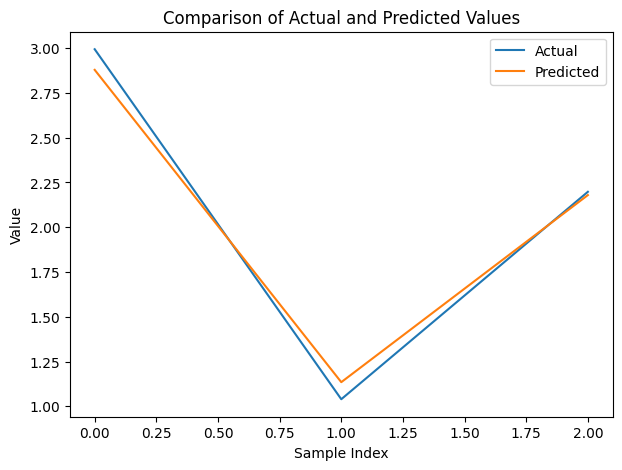

In [46]:

Y_pred = rnd_search_cv.best_estimator_.predict(X_new)

plt.figure(figsize=(7, 5))
plt.plot(y_test[:len(Y_pred)], label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()